<h1 style="text-align:center;"><font color=blue><u> Instructions to Load All Functions</u>: </font> </h1> 
<h3 style="text-align:center;">
1. Click [go to ASSUMPTIONS AND INITIAL SETTINGS](#section_0) section <br><br>
2. Ensure that all variables defined there are consistent and within expected parameters.<br><br>
3. Make any necessary changes, and then [go to TESTS section](#tests_0) <br><br>
4. Click on the code section right below [TESTS](#tests_0) <br><br>
5. Click on the ``Cell`` tab in the menu bar <br><br>
6. Click on ``Run All Above`` 
</h3>

<h1 style="text-align:center;"><font color=teal><u> To run an individual section</u>:</font></h1>
<h3 style="text-align:center;">
If the above doesn't work for you, you can always execute the individual sections<br><br>
- Select section -> then press ``Shift + Enter``
</h3>


<font color=red>-----------------------------------------------------------
</font>


<a id="contents_section"></a>

<h1 style="text-align:left;"><font color=tomato><u> TABLE OF CONTENTS</u></font></h1>
<h3 style="text-align:left;">

<font color=tomato>0. ----- [Module 00](#section_0): </font> Assumptions and hard code
<br><br>
<font color=tomato>1. ----- [Module 1](#section_1): </font> Load Files interactively 
<br><br>
<font color=tomato>2. ----- [Module 2](#section_2): </font> Image Processing Techniques
<br><br>
<font color=tomato>3. ----- [Module 3](#section_3): </font> Combine Individual Images 
<br><br>
<font color=tomato>X. ----- [EXTRA](#section_extra): </font> Dynamic Image Slice Viewer 
<br><br>
<font color=tomato> T. ----- [TESTS](#tests_0): </font> Import all files from folder and QC individual images  </h3>

><font color=tomato> T_1. ----- [TEST MODULE 1](#tests_1): </font> Import all files from folder
>><font color=tomato> T_1.A ----- [TEST - VIEW ALL IMPORTED IMAGES](#tests_1A): </font> Interactive viewer to inspect all imported image files and select a file number to QC
<font color=tomato> T_1.B ----- [TEST - QC INDIVIDUAL IMAGE](#tests_1B): </font> Select image to QC from files imported

><font color=tomato> T_2. ----- [TEST MODULE 2 - QC RANDOM IMAGES](#tests_2): </font> Apply processing techniques to random individual images

>><font color=tomato> T_2.A ----- [TEST MODULE 2A](#tests_2A): </font> PreProcessing
<font color=tomato> T_2.B ----- [TEST MODULE 2B](#tests_2B): </font> Filters
<font color=tomato> T_2.C ----- [TEST MODULE 2C](#tests_2C): </font> Thresholding
<font color=tomato> T_2.D ----- [TEST MODULE 2D](#tests_2D): </font> Sand-Shale Analysis
<font color=tomato> T_2.E ----- [TEST MODULE 2E](#tests_2E): </font> Visualization Examples

><font color=tomato> T_3. ----- [TEST MODULE 3 - QC ALL IMAGES AND EXPORT](#tests_3): </font>  Apply processing techniques to all imported images, combine them and save to file

>><font color=tomato> T_3.0 ----- [TEST 3.0](#tests_3_0): </font> Calculate Equivalent Depth for all images as flat array
<font color=tomato> T_3.1 ----- [TEST 3.1](#tests_3_1): </font> Check how to prepare all Raw Images to combine and export them
>>><font color=tomato> T_3.2A ----- [TEST 3.2A](#tests_3_2A): </font> Check how to trim edges on all Raw Images to combine and export them
<font color=tomato> T_3.2B ----- [TEST 3.2B](#tests_3_2B): </font> Check how to extract non-rock components from all Trimmed Images at once
<font color=tomato> T_3.2C ----- [TEST 3.2C](#tests_3_2B): </font> Another Check Trimmed Images and Masks from all images at once

>><font color=tomato> T_3.3 ----- [TEST 3.3](#tests_3_3): </font> **FULL WORKFLOW TO APPLY ALL TECHNIQUES TO ALL IMAGES AT ONCE**
<font color=tomato> T_3.4 ----- [TEST 3.4](#tests_3_4): </font> **USE VIEWER TO INSPECT RESULTS FROM PREVIOUS STEP **
<font color=tomato> T_3.5 ----- [TEST 3.5](#tests_3_5): </font> **SELECT IMAGES TO EXPORT AS PNG IMAGE FILES**
<font color=tomato> T_3.6 ----- [TEST 3.6](#tests_3_6): </font> **SELECT DATA TO EXPORT AS CSV FILES**

<h4 style="text-align:center;">[GO TO THE END OF THE PROGRAM](#end_of_program)</h4>

<a id="section_0"></a>

<h2> ASSUMPTIONS AND HARD CODE BITS TO CHECK</h2>

In [74]:
%matplotlib notebook
## =======================================
##               ASSUMPTIONS   
##               ***********
## ************** HARD CODE **************
## =======================================

## ------------------------------------
## ----- MODULE 2A: PREPROCESSING -----

core_width = 200   # int - in pixel units --> modify this value if type of image changes (e.g. 150, 200, 350, ...)
                            # >>> NOTE-1: Remember to check that core_width <= image.shape[0] (image full width in pixels)
                            # >>> NOTE-2: You could create a function to estimate this from -for example- image dimensions

        # YOU DON'T NEED TO SPECIFY THIS, IT WILL BE CALCULATED AS         
        # liner_thickness = (image_raw.shape[1]-core_width)/2
        
#liner_thickness = 10   # int - in pixel units --> buffer value, can leave this one unchanged
                            # >>> NOTE-1: You could create a function to estimate this from -for example- image dimensions

upper_threshold_limit = 200   # int - arbitrary value for grayscale images --> modify as necessary (e.g. 140, 165, ... )
                            # intensity limit considered as a reasonable threshold value to exclude bright spots/cement/mud
                            # >>> NOTE-1: This value should be checked with petrophysicist/image processing specialist
                            # >>> NOTE-2: upper threshold will be calculated, but if the calculated value is lower than 
                            #           upper_threshold_limit then the value specified here will be used
                            # >>> NOTE-3: Remember to check that upper_threshold_limit is within image limits 
                            #          (upper_threshold_limit<255 for uint8)
        
liner_in_images = True   # bool - liner_in_images : {'True', 'False'} --> select one option
                            # Set as True if liner edges have not been trimmed from images to analyze
                            # >>> NOTE-1: this is used as guide to extract the rock components from images

## ------------------------------------
## ----- MODULE 2B: FILTERS -----
## >>> NOTE ON SECTION 2B: Default recommended is median filter due to its simplicity, but the program also includes two
##                         other suitable filters: smooth_image_tv_filter(...) & smooth_image_bilateral_filter(...)
##                         (more details in section 2B of the code below)

element_median = 'disk'   # str - element_median = {'disk', 'square'} --> select one option 
                          # (default recommended : 'disk')
                            # structuring element (type of window) for median filter  
                            # >>> NOTE-1: You can modify the function to use other types of elements (e.g. 'star', ...)

d_median = 1 # int - window size for median filter --> modify this as necessary (e.g. 1, 2, 3, ...)
                            # >>> NOTE-1: minimum possible value is 1 (connectivity = 1 --> neighbouring pixels)
                            # >>> NOTE-2: higher d_median values result in images with less definition
            
## ------------------------------------
## ----- MODULE 2C: THRESHOLDING -----

method_local_thresholding = 'gauss'   # method_local_thresholding : {'gauss', generic'} --> Select one 
                                      # (default recommended : 'gauss')
                            # >>> NOTE-1: In-built method is 'gauss'
                            # >>> NOTE-2: 'generic' can be used to specify personalized thresholding functions to apply
                            #           in each neighbourhood (more details in section 2C of the code below)

neighbourhood_size = 255   # int, odd number - arbitrary value --> modify this as necessary (e.g. 21, 85, 149, ...)
                            # size of neighbouhood to calculate local threshold values
                            # >>> NOTE-1: You could create a function to estimate this from -for example- image dimensions

## ------------------------------------
## ----- MODULE 2D: SAND/SHALE CALCULATIONS -----

interval_cm_NET_calculation = 2   # int - arbitrary value --> modify this as necessary (e.g. 2, 5, 10, 20, ...)
                            # vertical thickness in cm to calculate sand/shale composition

sand_cutoff = 0.5   # cut-off sand % value to generate a sand flag



## ----------------------------------
## DON'T CHANGE THIS ONE BELOW, IT'S JUST USED TO CALCULATE THE EQUIVALENT INTERVAL SPECIFIED ABOVE
interval_pixels_NET_calculation = 1 # will be calculated later


## =======================================================
## ============== OTHER PROGRAM ASSUMPTIONS ==============
## =======================================================

# Files: 2D grayscale DECT images (dtype = uint8)

# File formats accepted: .jpg / .png / .tif

# Filenames Convention: Well-1_Circumferentials_Core1_2500.00-2501.00

# Actual core is 200 pixels wide in every image for Well

# Dark colour represents sand / light colour represents shale

# The high threshold value separates mud/filled fracs/cement from shale

# The Otsu threshold value separates sand from shale

# The thresholding technique used in current is most useful for binary systems (sand/shale)

# Only components considered: borders effects at the top or bottom; sand; shale;mud or cement

# Borders shade effects and very bright components should be separated via thresholding and masked out
# before commencing the analysis on shale and sand phases

# Code must be modified if other mineralogical components or fluids (e.g oil) are present

## =============================================================================================
## =============================================================================================

<h1 style="text-align:center;">---------------------------------------------------------------
---------------------------------------------------------------
<a id="section_1"></a>

<h1 style="text-align:center;"><font color=red> || 1 || -- <u>Module 1</u>: LoadFiles -- in Section Below</font></h1> 

<h2 style="text-align:center;"> <font color=#0000CD>Folders are loaded interactively with TKinter package</font></h2>


<font color=	#008B8B>
<h2 style="text-align:center;"> 
*!!! ATENTION !!!*
    </h2></font>
   
<h3 style="text-align:left;"><font color=#9370DB> <u>NOTE:</u>
    
-- MODULE WILL NOT READ FROM A FOLDER LOCATION EXPLICITELY SPECIFIED, SO SELECT WITH TKINTER

-- ALSO: I THINK FUNCTION 5 HAS A BUG THAT IS NOT FIXED YET WHEN YOU WANT TO READ INDIVIDUAL IMAGES 
 </h3></font>
 
 <h4 style="text-align:right;">[Next Section](#section_2)</h4>
 
 ---------------
> <font color=#708090>QUICK LINKS: [CONTENTS](#contents_section)    
  <font color=tomato>0. [Module 00](#section_0): </font> Assumptions and hard code    
  <font color=tomato>1. [Module 1](#section_1): </font> Load Files interactively    
  <font color=tomato>2. [Module 2](#section_2): </font> Image Processing     
  <font color=tomato>3. [Module 3](#section_3): </font> Combine Individual Images     
  <font color=tomato>X. [EXTRA](#section_extra): </font> Dynamic Image Slice Viewer <br>
   
    
><font color=tomato> T. ---------- [TESTS](#tests_0): </font> Import all files from folder and QC individual images
>>><font color=tomato> T_1. ---------- [TEST MODULE 1](#tests_1): </font> Import all files from folder
<font color=tomato> T_1.A ---------- [TEST - VIEW ALL IMPORTED IMAGES](#tests_1A): </font> Interactive viewer to inspect all imported image files and select a file number to QC
<font color=tomato> T_1.B ---------- [TEST - QC INDIVIDUAL IMAGE](#tests_1B): </font> Select image to QC from files imported

>> <font color=tomato> T_2. ---------- [TEST MODULE 2 - QC RANDOM IMAGES](#tests_2): </font> Apply processing techniques to random individual images
>>> <font color=tomato> T_2.A ---------- [TEST MODULE 2A](#tests_2A): </font> PreProcessing
<font color=tomato> T_2.B ---------- [TEST MODULE 2B](#tests_2B): </font> Filters
<font color=tomato> T_2.C ---------- [TEST MODULE 2C](#tests_2C): </font> Thresholding
<font color=tomato> T_2.D ---------- [TEST MODULE 2D](#tests_2D): </font> Sand-Shale Analysis
<font color=tomato> T_2.E ---------- [TEST MODULE 2E](#tests_2E): </font> Visualization Examples

>> <font color=tomato> T_3. ---------- [TEST MODULE 3 - QC ALL IMAGES AND EXPORT](#tests_3): </font>  Apply processing techniques to all imported images, combine them and save to file
>>><font color=tomato> T_3.0 ---------- [TEST MODULE 3.0](#tests_3_0): </font> Depths
<font color=tomato> T_3.1 ---------- [TEST MODULE 3.1](#tests_3_1): </font> Raw Images
>>>><font color=tomato> T_3.2A ---------- [TEST MODULE 3.2A](#tests_3_2A): </font> Trim Edges
<font color=tomato> T_3.2B ---------- [TEST MODULE 3.2B](#tests_3_2B): </font> Mask Analysis
<font color=tomato> T_3.2C ---------- [TEST MODULE 3.2C](#tests_3_2C): </font> Mask Analysis

>>><font color=tomato> T_3.3 ---------- [TEST MODULE 3.3](#tests_3_3): </font> FULL WORKFLOW
<font color=tomato> T_3.4 ---------- [TEST MODULE 3.4](#tests_3_4): </font> INSPECT FULL WORKFLOW RESULTS ON VIEWER
<font color=tomato> T_3.5 ---------- [TEST MODULE 3.5](#tests_3_5): </font> SELECT IMAGES TO EXPORT AS PNG
<font color=tomato> T_3.6 ---------- [TEST MODULE 3.6](#tests_3_6): </font> SELECT DATA TO EXPORT AS CSV

In [2]:

# #                  -------------------------------------------------------
# #                  --------------------   MODULE  1   --------------------
# #                  ------------------      LOADFILES    ------------------
# #                  ------------------         #         ------------------
# #                  ------------------      SUMMARY      ------------------

#                   -- Function 1 --> f_list, f_count = imgfileslist(f_dir)
#                   -- Function 2 --> f_path, all_paths, allfn_list,
#                                       f_list, path_subdir, f_subdir_list,
#                                       dirnames = getfileslist(*f_path,path_subdir=None,f_list=None)
#                   -- Function 3 --> dir_n = selectfolder(*dir_n) ### ONLY USED WHEN RUNNING FROM CLI ###
#                   -- Function 4 --> fn_df = imgfilesdata(dir_n=0,all_paths=None,allfn_list=None,*f_path)
#                   -- Function 5 --> im_all_dict = imread_fromfolder(fn_df=None,*f_path)

#                   where ``f_path`` : directory that contains the raw CT image files
# #                  -------------------------------------------------------



## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## ========== !!!!! FUNCTION 5 HAS A BUG THAT IS NOT FIXED YET WHEN YOU WANT TO READ INDIVIDUAL IMAGES 
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#########################
### Packages Imported ###
#########################
# Function 1:
import os,os.path
# Function 2:
# from os import listdir, getcwd, walk
# Function 3:
# Function 4:
import pandas as pd
# Funtion 5:
from skimage import io
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Update for interactive directory selection:
import tkinter.filedialog
import tkinter.messagebox
from tkinter import *

## =================== <<< AUX >>> =======================
## ==================  TKINTER LISTBOX  ==================
## =======================================================

from tkinter import *

class ListBoxChoice(object):
    '''
    This is an aux class that will generate a GUI to select an option from a list 
    ListBoxChoice is used when folders/files are selected interactively
    '''
    def __init__(self, master=None, title=None, message=None, list=[]):
        '''
        GUI 
        '''
        self.master = master
        self.value = None
        self.list = list[:]
        
        self.modalPane = Toplevel(self.master)

        self.modalPane.transient(self.master)
        self.modalPane.grab_set()

        self.modalPane.bind("<Return>", self._choose)
        self.modalPane.bind("<Escape>", self._cancel)

        if title:
            self.modalPane.title(title)

        if message:
            Label(self.modalPane, text=message).pack(padx=10, pady=10)
            
        # Create list frame
        listFrame = Frame(self.modalPane)
        listFrame.pack(side=TOP, padx=10, pady=10)
        
        # Create vertical scrollbar
        scrollBar = Scrollbar(listFrame)
        scrollBar.pack(side=RIGHT, fill=Y)
        self.listBox = Listbox(listFrame, selectmode=SINGLE)
        self.listBox.pack(side=LEFT, fill=Y)
        scrollBar.config(command=self.listBox.yview)
        self.listBox.config(yscrollcommand=scrollBar.set)
        self.list.sort()
        for item in self.list:
            self.listBox.insert(END, item)
            
        # Generate button frame
        buttonFrame = Frame(self.modalPane)
        buttonFrame.pack(side=BOTTOM)
        
        # Create Choose button from button frame
        chooseButton = Button(buttonFrame, text="Choose", command=self._choose)
        chooseButton.pack()
        
        # Create Cancel button from button frame
        cancelButton = Button(buttonFrame, text="Cancel", command=self._cancel)
        cancelButton.pack(side=RIGHT)

    def _choose(self, event=None):
        '''
        Catch the value from the selected option
        '''
        try:
            firstIndex = self.listBox.curselection()[0]
            self.value = self.list[int(firstIndex)]
        except IndexError:
            self.value = None
        self.modalPane.destroy()

    def _cancel(self, event=None):
        '''
        Destroy window when cancel button is pressed
        '''
        self.modalPane.destroy()
        
    def returnValue(self):
        '''
        Return the value assigned to the selected option
        '''
        self.master.wait_window(self.modalPane)
        return self.value        
## =======================================================



## =================== <<< MODULE 1 >>> ===================
## ================  FUNCTIONS BEGIN HERE  ================



##    ------------ FUNCTION 1 ------------  
##  CREATE A LIST WITH IMAGE FILES FROM A SPECIFIED FOLDER
def imgfileslist(f_dir):
    """
    returns number and names of JPG/TIF/PNG files in dir and subdirs
    
    Use:    
        f_list, f_count = imgfileslist(f_dir)
        
        INPUT:
            - f_dir is the path for the folder that contains the image files  
            
        OUTPUT:
            - f_list is a list of all the files in the folder
            - filecounter returns all the image files in the folder        
        
    >>> Aux function: lists all the image files in a specified folder (doesn't enter subfolders)
    >>> Counts files in the specified folder path and retrieves filenames          
    
    Example:
        f_subdir = '\\CT_imgs\\Well-1\\RAW ARRAY IMAGE DATA\\Well-1_Combined\\Tubes XZ'
            >>> filelist, filecount = imgfileslist(f_subdir)
    """  
    # create empty file list
    f_list = [] 
    # start counter
    f_count = 0
    # walk the directory and check each (dirpath, dirname, filename)
    for pack in os.walk(f_dir): 
        # for each file found in the path walked
        for f in pack[2]:
            # if the file analyzed is a JPEG/PNG/TIF image file
            if (f.endswith(".jpg") or f.endswith(".tif") or f.endswith(".png")):
                # increase counter by 1
                f_count += 1
                # add filename to the file list
                f_list.extend([f])
        break        
    # print to screen the total number of files found
    if len(f_list)>0:
        print(">>> Total number of files found:",str(f_count), "  in Dir path:",str(f_dir)) 
    else:
        print("==> No files found in this folder")     
    # uncomment below to print to screen the list of files found
    #print(">>> Files in Folder:\n    "+"\n    ".join([i for i in f_list]))
    
    return f_list, f_count
# ***** END Function 1 ****



##    ------------ FUNCTION 2------------  
##  CREATE A LIST WITH IMAGE FILES FROM A SPECIFIED LOCATION
def getfileslist(*f_path,path_subdir=None,f_list=None):
    """ 
    Creates a list with all the image files in the path specified and subfolders
    
    Use:
        f_path, all_paths, allfn_list, f_list, path_subdir, f_subdir_list, dirnames = getfileslist(*f_path)
    
        INPUT:  
            - f_path is the search path for the main folder that contains the raw images
              (or the subdirectories with the raw images).
              If f_path is not specified, a prompt will ask the user to define a search path
              
        OUTPUT: 
            - f_path is the search path used
            - all_paths is the consolidated list with all the paths to the directories
              found in the main search path
            - allfn_list is the consolidated list with all the files in the folder/subfolders
              found in the main search path
              
            - f_list is the list with all the files found in the main search path
            - path_subdir is the list with any subdirectories found in the main search path
            - f_subdir_list is the consolidated list with all the sudirectories found in the 
              main search path
              
            - f_dir is the path for the folder that contains the image files                            
            - img_files is the list with all the files found in subdirectories           
    
    Example:
        mypath = '\\CT_imgs\\Well-1\\RAW ARRAY IMAGE DATA\\Well-1_Combined'
            >>> mypath, allpaths, allfiles_list, 
                mypath_fileslist, 
                mypath_subdirs, mypath_subdirs_fileslist, dirnames = getfileslist(mypath)
                
    """         
    # print to scree current work directory
    print('>>> Current Work Directory:', os.getcwd())
    
    # check path is there
    try:
        f_path
        f_path = f_path[0]
    except Exception as e:        
        print(e, type(e))
        print(">>> Path not Found!")
        f_path = input(">>> Path for DECT files (.jpg/.tif/.png)?: ")
        # f_path = tkinter.filedialog.askdirectory(title = 'Select the folder with the DECT files to analyze (.jpg/.tif/.png)?:')
    else:
        # if path is not specified, request from user
        if not f_path:
                f_path = input(">>> Path for DECT files (.jpg/.tif/.png)?: ")   
                # f_path = tkinter.filedialog.askdirectory(title = 'Select the folder with the DECT files to analyze (.jpg/.tif/.png)?:')
        f_path = (f_path)
        # print to screen the search path that will be used
        print(">>> Search path: "+str(f_path))
    # normalize name to comply with python requirements
    f_path = os.path.normpath(f_path)        
    
    # create empty lists to add the data found in main directory and folders
    f_count,f_list = [],[]
    path_subdir,f_subdir_list = [],[]
    fn_sub_list,fn_sub_count = [],[]
    dirnames = []
    
    # walk the path specified
    for (dirpath, subdirnames, fn) in os.walk(f_path):
        # return the number of image files in directory and a list with the names
        f_list,f_count = imgfileslist(dirpath)
        # add the subdirectories found to the dirnames list
        dirnames+=(subdirnames)
        break         
        
    if len(dirnames)==0:
        print(">>> No subdirectories found in search path")            
    else:
        # if there are folders in the specified directory add them to the list
        for i,f_dir in enumerate(dirnames):
            path_subdir.append((f_path) + '\\' + f_dir) 
            # main directory is defined as dir number 0
            dir_n = [0]
            #print("==> %s folders found in %s"% (i+1, f_path))   
            
        # enter each folder inside the main dir and check if there's image files
        for j,subdir in enumerate(path_subdir):                
            print(">>> Subdir #%s  --> in Path: %s " % ((j+1),str(subdir)))
            # for each subfolder increase directory number
            dir_n.append((j+1))
            # return the number of image files in folder and list of file names 
            fn_sub_list,fn_sub_count=imgfileslist(subdir)
            # add them to main list
            f_subdir_list.append(fn_sub_list)
            # increase total file count
            f_count+=fn_sub_count
    
    # print to screen the number of image files found in main dir and all the folders found in it              
    print(">>> Total number of files found: "+str(f_count)) 
    
     # create empty lists to compile all the data found           
    allfn_list,all_paths = [],[]
        
    # list with all files found
    allfn_list.append(f_list)
    allfn_list += f_subdir_list
    
    # list with all paths found
    all_paths.append((f_path))
    all_paths += (path_subdir)        
    print(">>> Folders searched:\n"+"\n".join([i for i in all_paths]))
    
    return f_path, all_paths, allfn_list, f_list, path_subdir, f_subdir_list, dirnames
# ***** END Function 2 ****



##    ------------ FUNCTION 3 ------------  
##  RETURN THE SUBDIRECTORY NUMBER ---NOTE: THIS FUNCTION IS ONLY USEFUL WHEN PROGRAM IS RUN FROM CLI
def selectfolder(*dir_n):
    """
    Returns the folder number with the images that will be used for the analysis
    
    Use: 
        dir_n = selectfolder(*dir_n)        
        
        INPUT:  
            - dir_n is the directory that contains the raw images to analyze.              
              If dir_n is not specified, a prompt will ask the user to enter a folder number
              (relative to output of getfileslist).
                  > 0 for main folder in the search path
                  > 1, 2, ... for the corresponding subdirectory
                  
        OUTPUT:
            - dir_n integer representing the directory index with the raw images 
              that will be used for the analysis            
    
    Example: 
        dirnumber = selectfolder()
        
            >>> Choose Subdir Number:
                INPUT: "2"
                    User selected: 2
                    ==> Subdir #2 will be used           
    
    >>> Select the specific folder you want to use
    >>> 0: for Main Path or specify Subdirectory Number
    
    """
    # Ask user to select a dir number 
    dir_n = input(">>> Choose Subdir Number (0 for main directory): ")      
    print('    User selected: %s' % dir_n)
    
    try:
        dir_n = int(dir_n)
    except Exception as e:        
        print("Error!: ",e, type(e), "\n==> Input must be integer!")
        dir_n = 0
        print('==> Input that will be used instead: %s' % (dir_n))
    # indicate to user which dir number will be used
    if dir_n == 0:    
        print('==> Main path will be used')
    else:
        print('==> Subdir #%s will be used' % (dir_n))
    
    return dir_n
# ***** END Function 3 ****



##    ------------ FUNCTION 4------------  
## BUILD DATAFRAME WITH IMAGE FILES FROM SPECIFIED FOLDER
def imgfilesdata(dir_n=0,all_paths=None,allfn_list=None,*f_path):
    """    
    Build a dataframe with details from all the img files in the specified folder
    
    -------
    Use:
        fn_df = imgfilesdata(dir_n,all_paths,allfn_list,f_path)
        -------
        INPUT:
            - all_paths is the consolidated list with all the paths to the directories
              found in the main search path
              If all_paths is not specified, the function getfileslist() will be called
            - allfn_list is the consolidated list with all the files in the folder/subfolders
              found in the main search path
              If all_paths is not specified, the function getfileslist() will be called
            - dir_n integer representing the directory with the raw images
              If dir_n is not specified, the function selectfolder() will be called
        -------       
        OUTPUT:
            - fn_df dataframe (dictionary) with information from the files that will be used
              >>> Files data: 
                  'Path', 'Img_Type', 'Filename',
                  'WellName', 'TopDepth', 'BottomDepth',
                  #'Depth_from', 'Depth_to',
                  'Thickness'
    -------
    
    Example: 
        files = imgfilesdata(dirnumber,allpaths, allfiles_list)        
        
    """    
    # run a quick check if path has been specified
    try:
        all_paths
        all_paths = all_paths
    except Exception as e:        
        print(e, type(e), "\n>>> Path not specified!")        
    else:
        # if path is not specified, ask user to select it
        if not all_paths:
            ### FOR TKINTER ###
            # open file dialog and ask user to select a directory/folder
            f_path = tkinter.filedialog.askdirectory(
                            title = 'Select directory with the DECT files to analyze (.jpg/.tif/.png):') 
            # scan the location specified by user for image files in it and in all subfolders  
            _,all_paths,allfn_list,_,_,_,dirnames = getfileslist(f_path)
            
        # open meassage box to ask the user if they actually wants to use the location specified 
        # or one of the subfolders found instead
        folder_question = tkinter.messagebox.askyesnocancel(
                        message='Do you want to use the selected folder as main Search Path for the DECT image files?',
                        detail=("\n       SELECTED FOLDER:  " + str(f_path) + 
                                "\n \n \n YES: If the raw DECT images are in the selected folder"+
                                "\n \n NO: If the raw DECT images are in another folder"),
                        icon='question', 
                        title='Folder with raw DECT images',
                        default='yes')
        
        # if they select 'yes', then use main dir
        if folder_question is True:
            dir_n = 0
        else:
            # ask the user to select one of the folders found in main dir from a listboxchoice
            root = Tk()
            subfolder_option = ListBoxChoice(root, 
                                        list=dirnames,#[1:-1], 
                                        title="Directory",
                                        message="Select the folder that contains the raw DECT images").returnValue()
                
            for j,subdir_name in enumerate(dirnames):      
                if subfolder_option == subdir_name:
                    # assign dir number depending on the option they selected
                    dir_n = (j+1)          
                    
            # THE FOLLOWING LINES ARE ONLY RELEVANT IF RUNNING FROM CLI:
            #try:
            #    dir_n = int(dir_n[0])
            #except Exception as e:        
            #    print(e, type(e),"\n>>> Directory not specified!")
            #    dir_n = int(selectfolder()[0])
            #else:
            #    if not dir_n:
            #       dir_n = int(selectfolder()[0])         
            
        # Create empty dictionary to compile all info
        fn_data = {}
        fn_data = {
                    'Path' : [(str(all_paths[dir_n])).replace("/","\\")]*len(allfn_list[dir_n]),
                    'Img_Type' : [(all_paths[dir_n][(all_paths[dir_n]).rfind("\\")+1:])]*len(allfn_list[dir_n]),
                        # you may need to use this below instead for Img_Type
                        #'Img_Type' : [(all_paths[dir_n][(all_paths[dir_n]).rfind("/")+1:])]*len(allfn_list[dir_n]),                                              
                    'Filename' : allfn_list[dir_n][:],
                    'WellName' : [y[:y.find("_")] for y in allfn_list[dir_n]],
                    'ImageDescript' : [y[y.find("_")+1:y.rfind("_")] for y in allfn_list[dir_n]],
                    #'Depth_from' : [float(y[y.rfind("_")+1:y.rfind("-")]) for y in allfn_list[dir_n]],
                    #'Depth_to' : [float(y[y.rfind("-")+1:y.rfind(".")]) for y in allfn_list[dir_n]],
                    'TopDepth' : [float(y[y.rfind("_")+1:y.rfind("-")]) for y in allfn_list[dir_n]],
                    'BottomDepth' : [float(y[y.rfind("-")+1:y.rfind(".")]) for y in allfn_list[dir_n]],
                    'Thickness' : [
                        abs(float(y[y.rfind("-")+1:y.rfind(".")]) - float(y[y.rfind("_")+1:y.rfind("-")]))
                                                                                                for y in allfn_list[dir_n]
                                  ]
                  }
        
        # assign to a df to return results
        fn_df = pd.DataFrame(data=fn_data,
                             columns=['Path',
                                      'Img_Type',
                                      'Filename',
                                      'WellName',
                                      'ImageDescript',
                                      'TopDepth',
                                      'BottomDepth',
                                      #'Depth_from',
                                      #'Depth_to', 
                                      'Thickness']
                            )
    return fn_df
# ***** END Function 4****



## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## !!!!! FUNCTION 5 HAS A BUG THAT IS NOT FIXED YET WHEN YOU WANT TO READ INDIVIDUAL IMAGES 
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

##    ------------ FUNCTION 5------------  
## READ IMAGE FILES FROM SPECIFIED LOCATION 
def imread_fromfolder(fn_df=None,print_output=True,*f_path):
    """
    Read images from specified folder, using the dataframe built by imgfilesdata(f_path)
    
    -------    
    Use:
        im_all_dict = imread_fromfolder(fn_df)
        -------
        INPUT:
            - fn_df : is a dataframe with the headers: 'Path', 'Img_Type', 'Filename',
                                                       'Depth_from', 'Depth_to', 'Thickness'
                      If fn_df is not specified, the function imgfilesdata() will be called
                      Filename is the full name of a grayscale DECT image
                      filepath: str(fn_df.Path[3]+'\\'+fn_df.Filename[3])
                      img_all = io.imread(filepath)
        -------
        OUTPUT:
            - im_all_dict : is a dataframe (dictionary) with information from the image files
                      >>> Files data: 
                                      'f_path_name', 'Filename',    
                                      'data_min', 'data_max',
                                      'npix_vert', 'npix_hor',
                                      'WellName', 'TopDepth', 'BottomDepth',
                                      ##'Depth_from', 'Depth_to', 
                                      'Thickness'
   -------
    
    Example:
        allimages_dict = imread_fromfolder(files)
    
    """
    # run a quick check if df has already been build
    try:
        fn_df
        fn_df = fn_df
    except Exception as e:        
        print(e, type(e),"\n>>> Dataframe not built!")        
    else:
        # if there's no df, create it
        if fn_df is None:
            fn_df = imgfilesdata(f_path)
    
    # create empty lists to compile results
    copy_im_all, im_count, im_data = [],[],[]    
              
    f_path_name = [str((os.path.normpath(fn_df.Path[i]+'/'+(fn_df.Filename[i])))).replace("/","\\") 
                                           for i,_ in enumerate(fn_df.index)] ## IF USING TKINTER!!
                # NOTE: you may need to use this one below instead to build f_path_name list
            #f_path_name = [(os.path.normpath(fn_df.Path[i]+'\\'+(fn_df.Filename[i]))) for i,_ in enumerate(fn_df.index)] 
    
    # go throught the list of files built
    for i,y in enumerate(f_path_name):        
        im_all = plt.imread(y)
        copy_im_all.append(im_all)
        if print_output is True:
            print('>>> Filename #%s: %s  ---> 2D image' % (i,y[y.rfind("\\")+1:]))          
            # NOTE: You may need to use this instead for TKINTER # print('>>> Filename #%s: %s' % (i,y[y.rfind("/")+1:]))
            print('---   Class of 2D image:',type(im_all),'\n---   Dtype:',im_all.dtype,'\n---   Shape:',im_all.shape,
              '\n---   Range of 2D image:',im_all.min(), im_all.max(),'n---------------------------------')
        # count images loaded
        im_count = i        
        # compile all data obtained from each image imported in im_data list
        im_data.append([
                        y, 
                        y[y.rfind("\\")+1:], #NOTE: you may need to write it as #[y,y[y.rfind("/")+1:] #for tkinter
                        im_all,
                        im_all.dtype,
                        im_all.min(), im_all.max(),
                        im_all.shape[0], im_all.shape[1],
                        #fn_df.iloc[i].Depth_from, fn_df.iloc[i].Depth_to,
                        fn_df.iloc[i].WellName, fn_df.iloc[i].ImageDescript,
                        fn_df.iloc[i].TopDepth, fn_df.iloc[i].BottomDepth,
                        fn_df.iloc[i].Thickness
                       ]
                      )
    
    # if image files have been imported, print to screen the total number of files loaded into the program
        if len(copy_im_all)>1 and print_output is True:     
            print('>> Total number of images loaded: %s' % (im_count+1))
      
    # consolidate all info collected into a df
    im_all_dict = pd.DataFrame(im_data, 
                               columns=['f_path_name',
                                        'Filename',
                                        'image_mat', 
                                        'data_type',
                                        'data_min', 'data_max',
                                        'npix_vert', 'npix_hor', # <-- shape of image
                                        #'Depth_from', 'Depth_to',
                                        'WellName', 'ImageDescript',
                                        'TopDepth', 'BottomDepth',
                                        'Thickness' # <-- in meters
                                       ]
                              )
    
    
    return im_all_dict
# ***** END Function 5*****

##                  -----------------  END OF MODULE 1  -----------------



## =======================================================================================================================
## =======================================================================================================================




<h1 style="text-align:center;">---------------------------------------------------------------
---------------------------------------------------------------
<a id="section_2"></a>
<h1 style="text-align:center;"><font color=red> || 2 || -- <u>Module 2</u>: ImageProcessing -- in Section Below</font></h1> 

<h2 style="text-align:center;"> <font color=#0000CD>Processing techniques for each individual image</font></h2>

<h4 style="text-align:right;">[Next Section](#section_3)</h4>

-----------------------
<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2A ||    -- <u>MODULE 2A</u>: PreProcessing -- </font> in Code Below (L1-L493) </h3>


-----------------------
<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2B ||    -- <u>MODULE 2B</u>: Filters --</font> in Code Below (L494-L697) </h3>

-----------------------
<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2C ||    -- <u>MODULE 2C</u>: Thresholding --</font> in Code Below (L698-L890) </h3>

-----------------------
<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2D ||    -- <u>MODULE 2D</u>: Sand-Shale Analysis --</font> in Code Below (L891-L1316) </h3>

-----------------------
<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2E ||    -- <u>MODULE 2C</u>: Visualization -- </font>in Code Below (L1317+) </h3>


---------------

> <font color=#708090>QUICK LINKS: [CONTENTS](#contents_section)
<font color=tomato>0. [Module 00](#section_0): </font> Assumptions and hard code
<font color=tomato>1. [Module 1](#section_1): </font> Load Files interactively 
<font color=tomato>2. [Module 2](#section_2): </font> Image Processing 
<font color=tomato>3. [Module 3](#section_3): </font> Combine Individual Images
<font color=tomato>X. [EXTRA](#section_extra): </font> Dynamic Image Slice Viewer
>> <font color=tomato> T. ---------- [TESTS](#tests_0): </font> Import all files from folder and QC individual images 
<font color=tomato> T_1. ---------- [TEST MODULE 1](#tests_1): </font> Import all files from folder
>>> <font color=tomato> T_1.A ---------- [TEST - VIEW ALL IMPORTED IMAGES](#tests_1A): </font> Interactive viewer to inspect all imported image files and select a file number to QC
<font color=tomato> T_1.B ---------- [TEST - QC INDIVIDUAL IMAGE](#tests_1B): </font> Select image to QC from files imported
    
>><font color=tomato> T_2. ---------- [TEST MODULE 2 - QC RANDOM IMAGES](#tests_2): </font> Apply processing techniques to random individual images
>>><font color=tomato> T_2.A ---------- [TEST MODULE 2A](#tests_2A): </font> PreProcessing
<font color=tomato> T_2.B ---------- [TEST MODULE 2B](#tests_2B): </font> Filters
<font color=tomato> T_2.C ---------- [TEST MODULE 2C](#tests_2C): </font> Thresholding
<font color=tomato> T_2.D ---------- [TEST MODULE 2D](#tests_2D): </font> Sand-Shale Analysis
<font color=tomato> T_2.E ---------- [TEST MODULE 2E](#tests_2E): </font> Visualization Examples

>><font color=tomato> T_3. ---------- [TEST MODULE 3 - QC ALL IMAGES AND EXPORT](#tests_3): </font>  Apply processing techniques to all imported images, combine them and save to file    
>>><font color=tomato> T_3.0 ---------- [TEST MODULE 3.0](#tests_3_0): </font> Depths
<font color=tomato> T_3.1 ---------- [TEST MODULE 3.1](#tests_3_1): </font> Raw Images
<font color=tomato> T_3.2A ---------- [TEST MODULE 3.2A](#tests_3_2A): </font> Trim Edges
<font color=tomato> T_3.2B ---------- [TEST MODULE 3.2B](#tests_3_2B): </font> Mask Analysis
<font color=tomato> T_3.2C ---------- [TEST MODULE 3.2C](#tests_3_2C): </font> Mask Analysis
<font color=tomato> T_3.3 ---------- [TEST MODULE 3.3](#tests_3_3): </font> FULL WORKFLOW
<font color=tomato> T_3.4 ---------- [TEST MODULE 3.4](#tests_3_4): </font> INSPECT FULL WORKFLOW RESULTS ON VIEWER
<font color=tomato> T_3.5 ---------- [TEST MODULE 3.5](#tests_3_5): </font> SELECT IMAGES TO EXPORT AS PNG
<font color=tomato> T_3.6 ---------- [TEST MODULE 3.6](#tests_3_6): </font> SELECT DATA TO EXPORT AS CSV

In [72]:
## =======================================================================================================================
## =======================================================================================================================

##                  -------------------------------------------------------
##                  --------------------   MODULE 2A   --------------------
##                  ------------------   PREPROCESSING   ------------------
##                  ------------------         #         ------------------
##                  ------------------      SUMMARY      ------------------
#
#                   -- Fun 1 --> im_trimmed = trim_liner_edges(im, left=None, right=None, width=core_width, liner=liner_thickness)
#                      >> Aux Fun 1A --> new_left, new_right = guess_core_edges(im, width=core_width, liner=liner_thickness)
#                      >> Aux Fun 1B --> im_trimmed = trim_core_edges(im, left=0, right=-1)
#                   -- Fun 2 --> new_borders = extract_borders(im, t=1, trim_barrel=True, width=core_width, liner=liner_thickness) 
#                   -- Fun 3 --> bright_components = extract_bright_components(im, mask=None, high_threshold=None)
#                      >> Aux Fun 3A --> high = def get_high_threshold(im, mask=None, high_limit=upper_threshold_limit)

#                   where ``im`` : 2D array uint8 (Raw grayscale DECT image)
##                  -------------------------------------------------------

#########################
### Packages Imported ###
#########################

import numpy as np
import scipy as sp
import matplotlib 
from matplotlib import pyplot as plt
from skimage import io
# Function 1:
from skimage import exposure
import scipy.ndimage as ndi
# Funtion 2:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
import skimage.morphology
# Function 3 & 4:
from skimage import filters



##    ------------ FUNCTION 1 ------------  
##   EXTRACT AND TRIM STRAIGHT EDGES (LINER)
       
#   ***** Aux fun 1A:  GUESS CORE EDGES 
def guess_core_edges(im, width):
    """
    Returns a guess of the left and right borders (core barrel limits) in an individual CT image
    
    -------
    Use:    
        new_left, new_right = guess_core_edges(im,core_width,liner_thickness)
        
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image 
            - width : int (MUST BE SPECIFIED BY USER!)
                    The expected width of the core inside the barrel in pixel units 
                    For Well --> core_width = 200   
            - liner : int (MUST BE SPECIFIED BY USER!)
                    The expected thickness of the core liner in pixel units                    
                    For Well --> liner_thickness = 10 is a reasonable assumption
        -------    
        OUTPUT:
            - new_left, new_right: int, int
                   A guess of the left & right limit to crop the image (number) based on 
                   sobel vertical filter (uses 2nd derivative) and expected core width (must be specified)
                   and liner thickness (must be specified)
    -------        
    
    Example:
        left_border, right_border = guess_core_edges(image_to_analyze)        
            
    """     
    im = im.copy()
    # define liner as half the width of non-core components on each side (it's really non-core edge) 
    liner = round((im.shape[1]-width)/2)
    
    # we'll only use the middle section of the core to find edges (to exclude possible top and bottom artifacts)
    ind_v1 = int(np.floor(im.shape[0]*1.5/4))
    ind_v2 = int(np.ceil(im.shape[0]*2.5/4))
    im = im[ind_v1:ind_v2,:]
    
    # ensure width and liner are int
    liner = int(round(liner,0))
    width = int(round(width,0))
    
    # binarize the image performing a morphological binary erosion (connectivity = 1) to identify the edges
    edges = ndi.binary_erosion(im) 
    
    # find the locations where a (3X3) square pattern is found inside the binarized image 
    # (because edges -liner walls- are continuous). I'll use them as labels (markers)
    labels_edges = ndi.binary_hit_or_miss(edges, structure1=np.ones((3,3)))
    
    # find the location of edges as the mean value of the input image for the labels previously found
    # get the location of left edge 
    left = np.argwhere(im>edges).min(axis=0)[1] + liner
    
    right = np.argwhere(im>labels_edges).min(axis=0)[1] - liner
    
    # check that the difference between right and left corresponds to the expected core width
    if (right - left) == width:
        new_right = right
        new_left = left
    else:
        # make sure the left edge max value is not too high for what would be expected for this size of core/core barrel 
        if left > int(np.ceil((im.shape[1] - width + liner)/2)):
            # if it is, adjust the value
            new_left = int(np.ceil((im.shape[1] - width + liner)/2))
        else:
            new_left = left
        # make sure the right edge max value is not too low for what would be expected for this size of core/core barrel     
        if (right - liner) < (left + width):
            # if it is, adjust the value
            new_right = (left + width)
        else:
            new_right = right
            
    # check that the difference between new_right and new_left values corresponds to the expected core width        
    if (new_right - new_left) < width:
        # if it is < core width, increase the left margin a bit to the left and adjust the right edge value
        new_left =  new_left - int(np.floor(liner/3))
        new_right = new_left + width
        
    if (new_right - new_left) > width:
        # if it is < core width, increase the left margin a bit to the right and adjust the right edge value
        new_left = new_left - int(np.ceil(liner/3)) 
        new_right = new_left + width                 
     
    
    return new_left, new_right
#   ***** END Aux fun 1A *****   


#   ***** Aux fun 1B:  TRIM CORE EDGES 
def trim_core_edges(im, left=0, right=-1):
    """
    Trims the left and/or right border (core barrel limits) from an individual CT image
    
    -------
    Use:    
        im_trimmed = trim_core_edges(im, left, right)
        
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image  
            - left : int (def = 0)
                   A guess of the left limit to crop the image (number)
                   Function guess_core_edges(im)[0] can be used to get the values
                   If left is not specified, a value of 0 will be used (no left side trimming)
            - right : int (def = -1)
                   A guess of the right limit to crop the image (number)
                   Function guess_core_edges(im)[1] can be used to get the values
                   If right is not specified, a value of -1 will be used (no right side trimming)
        -------    
        OUTPUT:
            - im_trimmed : 2D array uint8
                   A copy of the input image with the left and/or right edges removed
                   Note: Top/bottom edges remain untouched. Only The image between left and right
                   values is extracted.            
    -------        
    
    Example:
        image_trimmed_leftright = trim_core_edges(image_to_analyze,left_border, right_border)        
            
    """
    # extract part of the original image, using the specified left and right threshold values
    im_trimmed = im
    # check that left > right, otherwise swap them (unless right is the last element)
    if left > right:
        if (right<0):
            new_right = right
            new_left = left
        else:    
            new_left = right
            new_right = left
    else:
            new_left = left
            new_right = right
    
    # ensure you get integers to use as indices
    new_left = int(new_left)
    new_right = int(new_right)
    
    im_trimmed = im_trimmed[:,new_left:new_right]
        
    return im_trimmed
#   ***** END Aux fun 1B ***** 


#   ***** Function 1:  TRIM LINER EDGES 
def trim_liner_edges(im, width, left=None, right=None):
    """
    Crops the 2D image using the left and right borders (core barrel limits) initially guessed
        
    -------
    Use:    
        im_trimmed_noliner = trim_liner_edges(im, left, right, width, liner)
        
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image                     
            - left : int (def None)
                   A guess of the left limit to crop the image (number)
                   If not left, left will be calculated from guess_core_edges(im, core_width, liner_thickness)[0]
            - right : int (def None)
                   A guess of the right limit to crop the image (number)
                   If not right, right will be calculated from guess_core_edges(im, core_width, liner_thickness)[1]           
            - width : int (MUST BE SPECIFIED BY USER!)
                    The expected width of the core inside the barrel in pixel units 
                    For Well --> core_width = 200   
            - liner : int (MUST BE SPECIFIED BY USER!)
                    The expected thickness of the core liner in pixel units 
                    For Well --> liner_thickness = 10 is a reasonable assumption
        -------    
        OUTPUT:
            - im_trimmed : 2D array uint8
                   A copy of the input image with the left and/or right edges removed
                   Note: Top/bottom edges remain untouched. 
                         Only The image between left and right values is extracted.            
    -------        
    
    Example:
        image_trimmed_withoutliner = trim_liner_edges(image_to_analyze,
                                                                 left_border, right_border)        
            
    """
    im = im.copy()
    # define liner as half the width of non-core components on each side (it's really non-core edge) 
    liner = round((im.shape[1]-width)/2)
    
    # if left is not specified, get it with guess_core_edges function
    if not left:
        left = guess_core_edges(im, width=width)[0]
    else:
        left = left

    # if right is not specified, get it with guess_core_edges function
    if right is None:
        right = guess_core_edges(im, width=width)[1]
    else:
        right = right
    
    # assign values to new variables     
    new_left = left
    new_right = right
    
     # check that left > right, otherwise swap them (unless right is the last element)
    if left > right:
        if (right<0):
            new_right = right
            new_left = left
        else:    
            new_left = right
            new_right = left
    
    # check that the difference between right correspond to the expected core width
    if (right - left) == width:
            new_right = right
            new_left = left
    # if it is not, adjust the edges location to ensure a constant core width
    else:        
        if (new_right-new_left) > (width+ liner):
            new_left = new_left  + np.round(liner*2/4)
            new_right = new_left + width
        elif (new_right-new_left) < width:
            new_left = new_left + np.round(liner/4)
            new_right = new_left + width
        else:
            new_left = new_left + np.round(liner/2)
            new_right = new_left + width
        
    # get the image without left and right edges
    im_trimmed = trim_core_edges(im, new_left, new_right)
       
    return im_trimmed
#   ***** END Function 1 ***** 



##    ------------ FUNCTION 2 ------------  
## EXTRACT IRREGULAR BORDERS AND BORDER EFFECTS
def extract_borders(im, width, trim_edges=True, t=1):
    """
    Extracts all the irregular borders and border effects from the 2D image 
    previously trimmed using the left and right borders (core barrel limits) initially guessed
    
    >>> NOTE: this combination works much better than my initial function!
    -------
    Use:    
        new_borders = extract_borders(im, trim_barrel=True)
        
        -------
        INPUT:
            - im : 2D array uint8 
                   Grayscale CT scan image 
            - trim_edges : bool (def = True)
                   Indicate if you want to trim core liner edges
                   If True, Function trim_liner_edges(im) will be called
                   Set to False if trim_liner_edges(im) has already been applied 
            - t : int (def = 1 -> cross-shaped structuring element)
                   thickness (The number of pixels to use as footprint along perimeter 
                   when finding find peak_local_max that generates the markers for the
                   watershed algorithm)
            - width : int (MUST BE SPECIFIED BY USER!)
                    The expected width of the core inside the barrel in pixel units 
                    For Well --> core_width = 200   
            - liner : int (MUST BE SPECIFIED BY USER!)
                    The expected thickness of the core liner in pixel units 
                    For Well --> liner_thickness = 10 is a reasonable assumption
        -------    
        OUTPUT:
            - new_borders : bool mask array
                   An array of the same shape as input image where all the pixels/voxels
                   identified as irregular borders and border effects appear as False values
                   So all borders/border effects will show as black in the plot. 
                   >>> Mask must be set as ~borders when using masked_array!
                   >>> masked_im = np.ma.masked_array(im,~np.ma.make_mask(borders))           
    -------        
    
    Example:
        borders_mask = extract_borders(image_to_analyze, trim_barrel = True)  
        
        plt.subplot2grid((1, 2), (0, 0))
        plt.imshow(new,'gray')
        
        plt.subplot2grid((1, 2), (0, 1))
        plt.imshow(np.ma.masked_array(image_to_analyze,~np.ma.make_mask(borders_mask)),'gray')
        
    >>> Note: This function implements a watershed algorithm that apportions pixels into demarcated basins, followed by 
              a fast morphological binary erosion of the image to improve the edges definition.              
              
              - Watershed algorithm:
              The  distance of each pixel to the background (assumed as equal to zero) is initially calculated from
              the Eucliden Distance Transform. Then, markers are determined automatically based on the local maxima 
              of the distance function to the background (this works well for separating overlapping objects). Alternatively, 
              markers may also be determined manually, or using -for example- the local minima of the gradient of the image. 
              Finally, the image is flooded from the given markers to find the watershed basins (the irregular borders/edges).
              For more information on the Watershed algorithm: http://cmm.ensmp.fr/~beucher/wtshed.html
                            
              *** Another option: random walker segmentation. This segmentation algorithm is based on anisotropic diffusion, 
                  usually slower than the watershed algorithm but gives good results on noisy data and boundaries with holes.
             
              - Cleaning up edges/borders:
                  The morphological erosion of an image involves setting the value of a given pixel to the minimum over all
                  pixels in its surrounding neighborhood. This helps to shrink bright regions and enlarge dark regions.
                  Another option that produces good results is applying a morphological binary opening to the image. This
                  process involes an erosion followed by a dilation, which can remove small bright spots (i.e. “salt” in
                  salt & pepper noise) and connect small dark cracks. It tends to “open” up dark gaps between bright features.
                        
    """
    im = im.copy()
    # define liner as half the width of non-core components on each side (it's really non-core edge) 
    liner = round((im.shape[1]-width)/2)
    
    # does the user require to have to have the edges of barrel removed from input image?
    if trim_edges is True:
        # remove edges with trim_liner_edges function
        im_trimmed = trim_liner_edges(im, left=None, right=None, width=width)
    else:
        # considered input image as already trimmed
        im_trimmed = im.copy()
    im_trimmed = im_trimmed.copy()
    
    # generate euclidean distance map for image as distance between each pixel/voxel and the nearest 
    # background point (as b_{i}=0). EDT calculates: euclidean distance transform (lattice units)
    distance_lb = ndi.distance_transform_edt(im_trimmed)
                
    # find the local maxima of the distance to the background:
    local_maxi = peak_local_max(distance_lb, labels=im_trimmed,
                                footprint=np.ones((t, t)),
                                indices=False)
    # generate markers for the maxima found above (add labels to those points)
    watershed_markers = ndi.label(local_maxi)[0]
    
    from skimage.morphology import disk, square
    
    # Find borders as watershed basins in image flooded from given markers
    labels_borders = watershed(-distance_lb, watershed_markers, mask=im_trimmed, connectivity=1)
    
    # find borders locations in the image
    borders = (im_trimmed!=labels_borders)
    
    # remove speckles
    borders = ndi.binary_closing(input=borders, structure=disk(1))
    borders = ndi.binary_opening(input=borders, structure=disk(1))
    # soften edges
    borders = ndi.binary_closing(input=borders, structure=square(3))
    borders = ndi.binary_opening(input=borders, structure=square(3))
    
    # refine borders to make sure we include any thin line (1 pixel) on the edges
    new_borders = skimage.segmentation.clear_border(borders, buffer_size=1)
    
    # complete any line that's missing pixels and remove any small holes 
        # new_borders = skimage.morphology.remove_small_holes(ndi.binary_closing(input=new_borders,structure=square(3)))
        # new_borders = skimage.morphology.binary_erosion(im_trimmed>ndi.binary_closing(new_borders))        
    new_borders = ndi.binary_fill_holes(im_trimmed>new_borders) # <- this works better 
    new_borders = ndi.binary_erosion(new_borders, np.ones((3,3)))
    new_borders = ndi.binary_erosion(new_borders, np.ones((3,3)))
    
    return new_borders
# ***** END Function 2 *****



##    ------------ FUNCTION 3 ------------  
##   FIND UPPER THRESHOLD VALUE AND EXTRACT BRIGHT NON-ROCK COMPONENTS MASK
       
#   ***** Aux fun 3A:  FIND UPPER THRESHOLD VALUE TO EXCLUDE PIXELS TOO BRIGHT (NON-ROCK) 
def get_high_threshold(im, high_limit, mask=None):
    """    
        cutoff : Upper threshold obtained with Yen's method
    -------
    Use: 
        high = get_high_threshold(im)
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image
                   Raw grayscale image without borders/edges BEFORE APPLYING ANY FILTER
            - mask : borders/edges to exclude from analysis   
            - high_limit : int (MUST BE SPECIFIED BY USER!)
                   Intensity limit considered as a reasonable threshold value to exclude bright spots/cement/mud  
                -------
        OUTPUT:
            - high : int
                     threshold value for bright spots (mud/cement/etc) based on Yen's method 
                     skimage.filters.threshold_yen implements Yen's thresholding method from:
                     Yen JC, Chang FJ, Chang S (1995), "A New Criterion for Automatic Multilevel Thresholding",
                     IEEE Trans. on Image Processing 4 (3): 370-378, ISSN 1057-7149, doi:10.1109/83.366472
    -------
    
    Example:
        high_threshold = get_high_threshold(image_trimmed, mask = borders_mask) 
        bright_nonrock = (image_trimmed > high_threshold)
                                                           
        -------
        
    """
    # Uncomment line below if you want to calculate histogram: 
    # hist, bins_center = exposure.histogram(im[im!=mask])
    
    # Use threshold_yen to calculate upper threshold value
    if mask is None:
        high = skimage.filters.threshold_yen(im)
    else:
        # if a mask was specified, use it
        high = skimage.filters.threshold_yen(im[im>mask])
    
    # Check that the value automatically calculated is not too low for what would be reasonable to expect
    if high < high_limit:
        high = high_limit
        
    # Uncomment line below to print value to console    
    # print('High threshold:', high)
    
    return high
#   ***** END Aux Fun 3A ***** 



##    ------------ FUNCTION 3 ------------  
##  EXTRACT BRIGHT NON-ROCK COMPONENTS MASK USING UPPER THRESHOLD VALUE
def extract_bright_components(im, mask=None, high_threshold=None, high_limit=None):
    """
        cutoff : Upper threshold obtained with Yen's method
    -------
    Use: 
        bright_components = get_high_threshold(im)
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image
                   Raw grayscale image without borders/edges BEFORE APPLYING ANY FILTER
            - mask : borders/edges to exclude from analysis   
            - high_threshold : int 
                   Threshold value to separate bright spots/cement/mud from the rock
                   If high_threshold is not specified, it will be calulated with get_high_threshold(im)
                -------
        OUTPUT:
            - bright_components : mask array

    -------
    
    Example:
        bright_nonrock = extract_bright_components(image_trimmed, mask=borders_mask) 

    """
    # if an upper threshold was not specified, then calculate it
    if high_threshold is None:
        high_threshold = get_high_threshold(im, mask=mask, high_limit=high_limit)
        
    # Binarize image to separate bright components above the threshold only
    bright_components = ~(im > high_threshold)
    
    # Now fill incomplete lines, remove speckles and soften edges    
    from skimage.morphology import disk, square 
    bright_components = ndi.binary_opening(input=bright_components, structure=disk(1))
    bright_components = ndi.binary_erosion(input=bright_components, structure=square(3))
    
    return (bright_components)
#   ***** END Function 3 ***** 





## =======================================================================================================================
## =======================================================================================================================

##                  -------------------------------------------------------
##                  --------------------   MODULE 2B   --------------------
##                  ------------------      FILTERS      ------------------
##                  ------------------         #         ------------------
##                  ------------------      SUMMARY      ------------------
#
#                   -- Function 1 --> im_smooth = smooth_image_median_filter(im,mode=element_median,d=d_median) #DEFAULT
#                   -- Function 2 --> im_smooth = smooth_image_tv_filter(im,w=0.01, variation=None)
#                   -- Function 3 --> im_smooth = smooth_image_bilateral_filter(im,window_size=3,stdev_color=5,stdev_distance=3,mode='constant',cval=0.0)
# 
#                   where ``im`` : 2D array uint8 (Raw grayscale DECT image)
##                  -------------------------------------------------------

#########################
### Packages Imported ###
#########################

import numpy as np
import scipy as sp
import matplotlib 
from matplotlib import pyplot as plt
# from skimage import io

# Function 1:
# from skimage.morphology import disk, square
from skimage import filters, morphology

# Function 2 & 3:
from skimage import restoration



##    ------------ FUNCTION 1 ------------  
##   APPLY MEDIAN FILTER TO DENOISE IMAGE 
def smooth_image_median_filter(im,mode='disk',d=1):
    """
    Applies a median filter to the image to remove artifacts 
    
    -------
    Use: 
        im_smooth = smooth_image_median_filter(im)
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image                  
            - mode : {'disk','square'} (def = 'disk')
            - d : int (def = 1)
                  Size of the disk/square that will be used to smooth the image. 
                  Larger d -> smoother image
                  E.g. 1) a disk of size 1 returns an array:  [[0, 1, 0],
                                                               [1, 1, 1],
                                                               [0, 1, 0]]
                                                               
                       2) a square of size 3 returns an array: [[1, 1, 1],
                                                                [1, 1, 1],
                                                                [1, 1, 1]]                                    
                                                           
        -------
        OUTPUT:
            - im_smooth : 2D array 
                    An array of the same shape as input image
                    Returns a smoother image with less artifacts
    -------
    
    Example:
        image_filtered = smooth_image_median_filter(image_to_analyze, d=2)  
        

    """
    # If disk size is not specified, just use 1
    if d is None:
        d = 1
    
    # check that mode is correctly specified
    if mode not in ['disk','square']:
        # if first letter of mode is 'd', use disk
        if str(mode)[0] == 'd':
            mode = 'disk'
        # if first letter of mode is 's', use square
        elif str(mode)[0] == 's':
            mode = 'square'
        else:
            # use default value 'disk'
            mode = 'disk'
            
    # apply median filter to image using the corresponding structuring element
    if mode == 'disk':
        from skimage.morphology import disk
        # apply median filter to image using a disk shaped structuring element
        im_smooth = skimage.filters.rank.median(im, disk(int(np.ceil(d))))
    elif mode == 'square':
        from skimage.morphology import square
        # apply median filter to image using a square shaped structuring element
        im_smooth = skimage.filters.rank.median(im, square(int(np.ceil(d))))
    
    return im_smooth
# ***** END Function 1 *****



##    ------------ FUNCTION 2 ------------  
##     APPLY TV DENOISING FILTER TO IMAGE 
def smooth_image_tv_filter(im,w=0.01, variation=None):
    """

    Applies a total variation denoising filter (denoise_tv_chambolle) to the image to remove artifacts 
    
    -------
    Use: 
        im_smooth = smooth_image_tv_filter(im)
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image
            - w : float (default = 0.01)
                  Denoising weight. Larger w -> smoother image
            - eps : float (optional)
                    Relative difference of the value of the cost function that determines the stop criterion. 
                    The algorithm stops when: (E_(n-1) - E_n) < variation * E_0
                    *Note: If variation is not specified, variation is estimated as
                            variation = 1-restoration.estimate_sigma(im, multichannel=False)
                                                           
        -------
        OUTPUT:
            - im_smooth : 2D array 
                    An array of the same shape as input image
                    Returns a smoother image with less artifacts
    -------
    
    Example:
        image_filtered = smooth_image_tv_filter(image_to_analyze, w=0.01, eps=0.025)        
        
    """
    # if variation % is not specified, calculate it as a function of sigma      
    if variation is None:
        variation = (1-skimage.restoration.estimate_sigma(im, multichannel=False))
    
    # calculate smooth image
    im_smooth = skimage.restoration.denoise_tv_chambolle(im, weight=w,eps=variation)
    
    return im_smooth
# ***** END Function 2 *****
    
    
    
##    ------------ FUNCTION 3 ------------  
##  APPLY DENOISING BILATERAL FILTER TO IMAGE 
def smooth_image_bilateral_filter(im,window_size=3,stdev_color=5,stdev_distance=3,mode='constant',cval=0.0):
    """

    Applies a bilateral filter to denoise the image to remove artifacts 
    
    -------
    Use: 
        im_smooth = smooth_image_tv_filter(im)
        -------
        INPUT:
            - im : 2D array uint8. 
                   Grayscale CT scan image
            - w : float (default = 0.01)
                  Denoising weight. Larger w -> smoother image
            - eps : float (optional)
                    Relative difference of the value of the cost function that determines the stop criterion. 
                    The algorithm stops when: (E_(n-1) - E_n) < variation * E_0
                    *Note: If variation is not specified, variation is estimated as
                            variation = 1-restoration.estimate_sigma(im, multichannel=False)
                                                           
        -------
        OUTPUT:
            - im_smooth : 2D array 
                    An array of the same shape as input image
                    Returns a smoother image with less artifacts
    -------
    
    Example:
        image_filtered = smooth_image_bilateral_filter(image_to_analyze, 3, 5, 3, 
                                                       mode='constant', cval=0.0)     
        
        
    >>> This is an edge-preserving, denoising filter. It averages pixels based on their spatial closeness
        and radiometric similarity.
        Radiometric similarity is measured by the Gaussian function of the Euclidean distance between two
        color values and a certain standard deviation specified by ``stdev_color`` (sigma_color).
        Spatial closeness is measured by the Gaussian function of the Euclidean distance between two pixels
        and a certain standard deviation specified by ``stdev_distance`` (sigma_spatial).
        For more information see: http://scikit-image.org/docs/dev/api/skimage.restoration.html 
        
    """
    # calculate smooth image
    im_smooth = skimage.restoration.denoise_bilateral(im, win_size=window_size, sigma_color=stdev_color,
                                              sigma_spatial=stdev_distance,mode=mode,cval=cval,
                                              multichannel=False)
    
    return im_smooth
# ***** END Function 3 *****






## =======================================================================================================================
## =======================================================================================================================

##                  -------------------------------------------------------
##                  --------------------   MODULE 2C   --------------------
##                  ----------------     THRESHOLDING      ----------------
##                  ------------------         #         ------------------
##                  ------------------      SUMMARY      ------------------
#
#                   -- Function 1 --> val = get_global_otsu_threshold(im) 
#                   -- Function 2 --> (dynamic_thr - offset) = get_local_adaptive_threshold(im,
#                                             block_size=neighbourhood_size, offset=0, method='gauss', sig=None, fun=None)
# 
#                   where ``im`` : 2D array uint8 (Raw grayscale DECT image)
##                  -------------------------------------------------------

#########################
### Packages Imported ###
#########################

import numpy as np
import scipy as sp
from skimage import exposure
import skimage
from skimage import filters



##    ------------ FUNCTION 1 ------------  
##   GET GLOBAL THRESHOLD WITH OTSU METHOD
def get_global_otsu_threshold(im):
    """    
    Uses Otsu's method to determine the threshold value in images with a bimodal histogram       
    -------
    
    Use: 
    ---
        threshold = get_global_otsu_threshold(im)
         
        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER               
                                                           
        -------
        OUTPUT:
            - val : int 
                    threshold value assuming binary composition in the image. All pixels in the input 
                    image higher than the threshold value are considered foreground.
      
    Example:
    -------
        ### FIND SAND/SHALE CUTOFF VALUE ###
        threshold = get_global_otsu_threshold(image_trimmed) 
        sand = (image_trimmed < threshold)
        shale = (image_trimmed >= threshold)
    
    References:
    -----------
    >>> Otsu's metod: automatic clustering-based image thresholding. The threshold is found such that the intra-class
        variance is minimized while the inter-class variance is maximized
        
        * Note: Otsu's method works well with images that have a bimodal histogram. 
                Other methods should be explored if the image has a multimodal histogram(local Otsu may still 
                work if the phases are easily differentiable)
                
                For more info on Otsu thresholding technique: 
                https://en.wikipedia.org/wiki/Otsu%27s_method
        
    """
    # Calculate threshold value with Otsu thresholding method
    val = skimage.filters.threshold_otsu(im)
    
    # Round threshold value if it's greater than 1 (we don't want to round if we are using [0 1] intensity scale!)
    if val>1:
        val = round(val,0)
        
    # uncomment line below if you want to print threshold value to console
    # print('Otsu Global theshold:',val)

    return val
# ***** END Function 1 *****



##    ------------ FUNCTION 2 ------------  
##   GET LOCAL THRESHOLD VALUES FOR A DEFINED NEIGHBOURHOOD REGION
def get_local_adaptive_threshold(im, block_size=125, offset=0, method='gauss', sig=None, fun=None):
    """    
    Adaptive or dynamic thresholding. The threshold value is the weighted mean for the local 
    neighborhood of a pixel subtracted by a constant (offset, if defined). Alternatively the 
    threshold can be determined dynamically by a given function, using the 'generic' method.
    
    Binarizes the image using a dynamic thresholding technique in local neighbourhoods
    defined by block_size. 
    
    GIVES BETTER RESULTS THAN GLOBAL OTSU WHEN BACKGROUND INTENSITY IS NOT VERY UNIFORM
    -------
    
    Use: 
    ---
        dynamic_thr = get_local_adaptive_threshold(im)

        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER  
            - block_size : int (def = 85)
                   Size of pixel neighbourhood to calculate the local threshold value
                   MUST BE ODD NUMBER!! (e.g. 3, 5, 7, ..., 21, ...)
            - offset : int (def = 0), optional
                    Value that offsets each weighted mean threshold value found in a neighbourhood
                    to calculate the local threshold (constant subtracted from result)
            - method : {'generic', 'gauss}, optional (def = 'gauss')
                    Method used to calculate local adaptive threshold in the neighbourhood                    
                    * 'gauss' : apply gaussian filter (sigma value can be specified as sig or automatically calculated)
                    * 'generic' : apply custom function defined by ``fun`` (see ``fun`` below)
            - sig : int (def = None), optional
                    Sigma value to use with 'gaussian' method. If not specified, a sigma value will be calculated                    
            - fun : function (def = None), optional 
                    Function object for 'generic' method, which take the flat array of local neighbourhood as a 
                    single argument and returns the calculated threshold for the centre pixel.
                    (e.g. we could use it to specify Otsu thresholding method as function and then apply it locally)
        
        OUTPUT:
        ------
            - dynamic_thr : (N, M) ndarray 
                    threshold values calculated in each local region. All pixels in the input image higher than the
                    corresponding pixel in the dynamic threshold are considered foreground.                   
        
    Example:
    -------
        ### FIND SAND/SHALE CUTOFF VALUE ###
        threshold = get_local_adaptive_threshold(image_smooth,block_size=125) 
        sand = (image_trimmed < threshold)
        shale = (image_trimmed >= threshold)
    
    References:
    -----------
    >>> This function calculates thresholds in regions with a characteristic size block_size 
        surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted 
        mean of the local neighborhood minus an offset value.
        
        For more info on this dynamic thresholding technique: 
https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#adaptivethreshold

        
    """
    # check that block_size is an odd number (required for local adaptive thresholding method)    
    if (block_size % 2) == 0:
        block_size += 1
    else:
        block_size = block_size
    
    # copy the input image array to avoid errors
    im = im.copy()
    
    # create an array full of zeros with the shape of input image
    dynamic_thr = np.zeros(im.shape)
    
    # if method is not specified, or it's specified as 'gauss'
    if method == 'gauss':
        if sig is None:
            # if sigma is not specified, calculate a sigma that covers > 99% of distribution
            sigma = (block_size - 1) / 6
        else:
            # use the sigma specified by user
            sigma = sig
        # apply gaussian filter to threshold image
        ndi.gaussian_filter(
                            im, 
                            sigma, 
                            output=dynamic_thr
                            )
    # if method is specified as 'generic'
    elif method == 'generic':
        ndi.generic_filter(
                            im,
                            fun,
                            block_size,
                            output=dynamic_thr
                            )

    return (dynamic_thr - offset) # return value with offset constant subtracted

# ***** END Function 2 *****





## =======================================================================================================================
## =======================================================================================================================

##                  -------------------------------------------------------
##                  --------------------   MODULE 2D   --------------------
##                  ----------     SAND / SHALE CALCULATIONS     ----------
##                  ------------------         #         ------------------
##                  ------------------      SUMMARY      ------------------
#
#                   -- Function 1 --> separate_sand_shale(im, threshold=None, mask=None)
#                   -- Function 2 --> label_sand_shale_regions(im, threshold=None, mask=None) 
#                   -- Function 3 --> sand_shale_NETcount(im, interval=interval_pixels_NET_calculation, threshold=None, mask=None, return_downsampled=False)
#                   -- Function  -->  
# 
#                   where ``im`` : 2D array uint8 (Raw grayscale DECT image)
##                  -------------------------------------------------------

#########################
### Packages Imported ###
#########################

import numpy as np
import scipy as sp
from skimage import exposure
import skimage
from skimage import filters



##    ------------ FUNCTION 1 ------------  
## BINARIZE INTO SAND AND SHALE LAYERS
def separate_sand_shale(im, threshold=None, mask=None):
    '''
    Classify pixels as foreground or background for a specified threshold value       
    -------
    
    Use: 
    ---
        sst, sh = separate_sand_shale(im)
         
        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER   
            - threshold : {int, (N,M) array}, optional
                   threshold value or threshold mask to binarize the image. All pixels in the input 
                   image higher than the threshold value are considered foreground.
                   If threshold is not specified, it will be calculated using get_global_otsu_threshold(im)
            - mask : (N, M) bool array, optional
                   Bool mask to separate all irregular borders or non-rock components and paint them a 
                   different colour                    
                                                           
        -------
        OUTPUT:
            - sst, sh = (N,M) ndarray
                    Sand and shale masks

      
    Example:
    -------
        sand, shale = separate_sand_shale(image_trimmed, mask=mask_non_reservoir)
    
    References:
    -----------

    '''    
    # copy the input image array to avoid errors
    im = im.copy()
    
    # if there's a mask, consider true values only as rock 
    if mask is not None:
        # first check than mask is boolean
        assert(mask.dtype == np.bool)
        # consider true values only as rock 
        im = im*mask        
    
    # if threshold is not specified, calculate it using global Otsu's method
    if threshold is None:
            val = get_global_otsu_threshold(im)
    else:
        val = threshold
    
    # pixels lower than threshold value are considered as sand
    sst = im < val
        
    # pixels lower than threshold value are considered as shale
    sh = im >= val
    
    # force copy to prevent errors
    sst = sst.copy()
    sh = sh.copy()
    
    if mask is not None:        
        #assert(mask.dtype == np.bool)
        # correct sand and shale values 
        sst = sst*mask
        sh = sh*mask            
        
    # clean up binary images
    from skimage.morphology import disk, square
    for layer in (sst, sh):  
        # Remove speckles
        layer = ndi.binary_closing(input=layer, structure=disk(1))
        layer = ndi.binary_opening(input=layer, structure=disk(1))
        # Soften edges
        layer = ndi.binary_closing(input=layer, structure=square(3))
        layer = ndi.binary_opening(input=layer, structure=square(3))
        
    return sst, sh
# ***** END Function 1 *****



##    ------------ FUNCTION 2 ------------  
##       LABEL SAND AND SHALE REGIONS
def label_sand_shale_regions(im, threshold=None, mask=None,label_all=False):   
    '''
    Classify pixels into foreground or background regions for a specified threshold value assigning labels  
    -------
    
    Use: 
    ---
        sst, sh = label_sand_shale_regions(im)
         
        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER   
            - threshold : {int, (N,M) array}, optional
                   threshold value or threshold mask to binarize the image. All pixels in the input 
                   image higher than the threshold value are considered foreground.
                   If threshold is not specified, it will be calculated using get_global_otsu_threshold(im)
            - mask : (N, M) bool array, optional
                   Bool mask to separate all non-rock components and paint them a different colour     
            - label_all : bool, optional (def = False)
                   return all labels, not just sand and shale
                   
                                                              
        -------
        OUTPUT:
            - sst, sh = (N,M) ndarray
                    Sand and shale labels
                    
            - if label_all == True then all a (N,M) labeled array will be returned

      
    Example:
    -------
        sand, shale = label_sand_shale_regions(image_to_use)
    
    References:
    -----------

    '''    
    # force copy of input image array to avoid errors
    im = im.copy()
      
    # determine sand and shale components with separate_sand_shale
    sst, sh = separate_sand_shale(im, threshold=threshold, mask=mask)
    
    # force copy to prevent errors
    sst = sst.copy()
    sh = sh.copy()
    
    # Convert to int so we can store the shale and sand labels
    sst_int = sst.astype(int)
    sh_int = sh.astype(int)
    
    # if a mask has been specified   
    if mask is not None:
        assert(mask.dtype == np.bool)
        mask_all = mask.copy()
        border_effects = ~mask_all*~extract_borders(~mask_all,trim_edges=False)
        bright_components = ~mask_all*~border_effects
        
        if label_all is True:
            # assign a label to each layer
            for layer in [sst,sh,border_effects,bright_components]:
                lbls,_, = ndi.label(layer)
                
            lbls=lbsl.astype(bool)
            sst,sh,other_border,other_bright=lbls[0],lbls[1],lbls[2],lbls[3]
            
            return sst,sh,other_border,other_bright
        
    
    # Assign different labels to different layers
    for name, layer in [('Sand', sst_int), ('Shale', sh_int)]:
        # Label image pixels as either Sand or Shale
        labels, count = ndi.label(layer)
        print('%s regions found in %s' % (count, name))
        #layer[:] = labels
        # Count how many Sand and Shale regions there are in the image
        obj_areas = [np.sum(labels == i) for i in range(1, labels.max())]
        print("Mean area in %s layer: %d" % (name,np.mean(obj_areas)))
        
    return sst_int, sh_int
# ***** END Function 2 *****



##    ------------ FUNCTION 3 ------------  
##       EXTRACT SAND AND SHALE REGIONS PER PIXEL ROW
## NOTE: This function does the same as sand_shale_NETcount_interval(im,interval=1)
def sand_shale_NETcount_pixels(im, threshold=None, mask=None):   
    '''
    Classify pixels into foreground or background regions for a specified threshold value assigning labels  
    -------
    
    Use: 
    ---
        sst_count, sh_count = sand_shale_NETcount_pixels(im)
         
        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER  
            - threshold : {int, (N,M) array}, optional (def = None -> will be calculated with global Otsu method)
                   threshold value or threshold mask to binarize the image. All pixels in the input 
                   image higher than the threshold value are considered foreground.
                   If threshold is not specified, it will be calculated using get_global_otsu_threshold(im)
            - mask : (N, M) bool array, optional (def = None)
                   Bool mask to separate all irregular borders or non-rock components and paint them a 
                   different colour 
                                                           
        -------
        OUTPUT:
            - sst, sh = (N,1) ndarray
                    Sand and shale mean values for each pixel row
    Example:
    -------
        sand, shale = sand_shale_NETcount_pixels(image_smooth) 
         
    
    References:
    -----------

    '''        
    # force copy of input image array to avoid errors
    im = im.copy()
    mask_to_use = mask
    threshold_to_use = threshold
    
    # get the shape of input image
    num_rows, num_cols = np.shape(im)
    
    # determine sand and shale components with separate_sand_shale
    sst, sh = separate_sand_shale(im, threshold=threshold_to_use, mask=mask_to_use)
    
    # force copy to prevent errors
    sst = sst.copy()
    sh = sh.copy()
    
    # obtain mean sand and shale values per row pixel
    sst_count = sst.mean(axis=1)
    sh_count = sh.mean(axis=1)    
       
    # if a mask is specified, correct values for it
    if mask_to_use is not None:
        # obtain mean values per row pixel
        mask_count = 1-mask_to_use.mean(axis=1)        
        # correct sand and shale values for mask, by assigning a 0 in any place where mask_count>0.5
        sst_count[mask_count>=0.5] = 0
        sh_count[mask_count>=0.5] = 0
        
        # Normalize
        for i,both in enumerate(list(zip(sst_count,sh_count))):
            if sum(both)!=0:
                sst_count[i]/=sum(both)
                sh_count[i]/=sum(both)
                
#     # if we want to generate flags for a given cutoff
#     if cutoff is not None:
#         sst_count = sst_count>cutoff
#         sh_count = sh_count>=cutoff      
      
    # return mean values per individual pixel row
    return sst_count, sh_count
# ***** END Function 3 ***** 



##    ------------ FUNCTION 4 ------------  
##       EXTRACT SAND AND SHALE REGIONS FOR A DEFINED VERTICAL INTERVAL IN CM

def sand_shale_NETcount_interval(im, interval=1, threshold=None, mask=None, return_downsampled=False):   
    '''
    Classify pixels into foreground or background regions for a specified threshold value assigning labels  
    -------
    
    Use: 
    ---
        sst, sh = sand_shale_NETcount_interval(im,interval)
         
        INPUT:
        -----
            - im : (N, M) ndarray
                   2D array uint8. Grayscale CT scan image       
                   Image cropped AFTER APPLYING A SMOOTHING FILTER  
            - interval : int (def = interval_pixels_NET_calculation -> must be specified or calculated)
                    number of pixels within the vertical interval where mean values want to be calculated
            - threshold : {int, (N,M) array}, optional (def = None -> Obtains it with global Otsu method)
                   threshold value or threshold mask to binarize the image. All pixels in the input 
                   image higher than the threshold value are considered foreground.
                   If threshold is not specified, it will be calculated using get_global_otsu_threshold(im)
            - mask : (N, M) bool array, optional (def = None)
                   Bool mask to separate all irregular borders or non-rock components and paint them a 
                   different colour 
            - return_downsampled : bool, optional (def = False)
                   Method by which results are returned. 
                   -> If return_downsampled is False: len(results_array) == len(image_array)
                   -> If return_downsampled is True: len(results_array) == int(len(image_array)/sample_size)
                                                           
        -------
        OUTPUT:
            - sst, sh = (N,1) ndarray
                    Sand and shale mean values for the specified interval
    Example:
    -------
        sand, shale = sand_shale_NETcount(image_to_use, interval=interval_pixels, mask=mask_non_reservoir) 
         
    
    References:
    -----------

    '''    
    # if interval is None:
    #     interval = 1        
    
    # force copy of input image array to avoid errors
    im = im.copy()
    mask_to_use = mask
    threshold_to_use = threshold
    
    # get the shape of input image
    num_rows, num_cols = np.shape(im)
    
    # determine sand and shale components with separate_sand_shale
    sst, sh = separate_sand_shale(im, threshold=threshold_to_use, mask=mask_to_use)
    
    # force copy to prevent errors
    sst = sst.copy()
    sh = sh.copy()
    
    # obtain mean sand and shale values per row pixel
    sst_count = sst.mean(axis=1)
    sh_count = sh.mean(axis=1)
       
    # if a mask is specified, correct values for it
    if mask_to_use is not None:
        # obtain mean values per row pixel
        mask_count = 1-mask_to_use.mean(axis=1)        
        # correct sand and shale values for mask, by assigning a 0 in any place where mask_count>0.5
        sst_count[mask_count>=0.5] = 0
        sh_count[mask_count>=0.5] = 0
        mask_data = mask_count.copy()
        # Now normalize
        for i,both in enumerate(list(zip(sst_count,sh_count))):
            if sum(both)!=0:
                sst_count[i]/=sum(both)
                sh_count[i]/=sum(both)
                
#     # if we want to generate flags for a given cutoff
#     if cutoff is not None:
#         # anything above the sand_cutoff is considered as sand
#         sst_count = (sst_count>cutoff)
#         # anything below the sand_cutoff is considered as shale
#         sh_count = (sh_count>=cutoff)
    
    # if interval specified is greater than individual rows
    if interval>1:
        # define sample size as interval specified as input
        sample_size = interval
        
        # force copy of mean values to prevent errors
        ss_data = sst_count.copy()
        sh_data = sh_count.copy()        
            
        # reshape mean data vectors to obtain downsampled values
        end =  sample_size * int(len(ss_data)/sample_size)
        
        sst_downsampled = np.array(np.mean(ss_data[:end].reshape(-1, sample_size), 1))
        # reshape mean sh data vector to obtain downsampled values
        sh_downsampled = np.array(np.mean(sh_data[:end].reshape(-1, sample_size), 1))   
        
                        # another option to downsample mean vector:
                                # samples = list(zip(*[iter(data)]*sample_size))
                                # sst_downsampled = map(lambda x:int(sum(x)/float(len(x))), samples)                   
       
        if return_downsampled is False:        
            # obtain mean values for the original number of pixel rows in input image
            
            # force copy of mean values per pixel row to initialize output results array      
            sst_interval_count = sst_count.copy()
            sh_interval_count = sh_count.copy()            
             
            # recalculate the results array
            for r,value in enumerate(sst_downsampled): # taking sand array as reference
                # value that will be repeated across the interval of pixel rows
                new_sand = value    
                new_shale = sh_downsampled[r]
                # assign the interval mean value to each pixel-sized row across such interval
                sst_interval_count[(sample_size*r):(sample_size*(1+r))] = new_sand
                # do the same for shale
                sh_interval_count[(sample_size*r):(sample_size*(1+r))] = new_shale
        
            return sst_interval_count, sh_interval_count
        
        else:
            # return downsampled vectors instead of mean values per row:                
            return sst_downsampled, sh_downsampled
        
    # if interval specified is 1 pixel (case of previous function)
    else:
        # return mean values per individual pixel row
        return sst_count, sh_count
    
    





## =======================================================================================================================
## =======================================================================================================================

##                  --------------------------------------------------------
##                  ---------------------   MODULE 2E   --------------------
##                  ---------------   VISUALIZATION OPTIONS   --------------
##                  -------------------         #         ------------------
##                  -----------      SEE BELOW FOR EXAMPLES      -----------
##                  --------------------------------------------------------


## ---------------------------------------   
##    ------------ FUNCTION 1 ------------
def plot_color_overlay(im, sst, sh, other=None, ax=None, plot_title="Sand (yellow)\nShale (blue)"):
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # create a zeros array with 3 channels (we need that for color images)
    all_layers = np.zeros((im.shape[0],im.shape[-1], 3)) # Color image
    all_layers[other] = (1, 0, 0) # leave masked values in red
    all_layers[sh] = (0, 0, 1) # paint shale in blue
    all_layers[sst] = (1, 1, 0) # paint sand in yellow
    
    # create figure
    ax.set_title(plot_title, fontsize='large')
    ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    ax.set_xticks(np.arange(np.round(im.shape[-1]/100))*100)
    ax.imshow(all_layers)
    
    return ax


## ---------------------------------------       
##    ------------ FUNCTION 2 ------------ 
# Function to plot the filled sand-to-shale count
def plot_sand_shale_count(sst_count, sh_count, y=None, ax=None, plot_title="Sand-Shale Analysis",y_label='Pixels'):
    
     # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # generate vertical axis from total rows, unlessotherwise specified
    num_rows = (sst_count.size)
    if y is None:        
        y = np.arange(0, num_rows)
    else:
        y = y
    
    # plot sand and shale lines
    ax.plot(sst_count, y, (sst_count+sh_count), y, color='goldenrod', linewidth=0.5)

    ax.set_facecolor('crimson')  
    
    # fill sand area in yellow (between x=0 and sand line)
    ax.fill_betweenx(y, sst_count, 
                      label='Sand',
                      facecolor='gold', 
#                       alpha=0.8,
                      interpolate=True) 
    
    # fill remaining area in blue (between sand line and x=(sand line+shale line))
    ax.fill_betweenx(y, sst_count+sh_count, sst_count, 
                      label='shale',
                      facecolor='royalblue', 
#                       alpha=0.6,
                      interpolate=True)
    
    # set title
    ax.set_title(plot_title, fontsize='large')
    
    # set vertical axis properties 
    ax.set_ylim(num_rows,0)
    ax.set_yticks(np.arange(np.round(num_rows/100))*100)
    ax.set_ylabel(str(y_label))

    # set horizontal axis properties 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(6)*.2)
    ax.set_xlabel('Percentage')    
    
    #plt.show()    
    return ax
    
    
    
## ---------------------------------------       
##    ------------ FUNCTION 3 ------------
# Plot original + sand + shale layers
def plot_3images(im,threshold=None,mask=None,cmap=plt.cm.Spectral):

    sst, sh = label_sand_shale_regions(im,threshold=threshold, mask=mask)
    
    for n, (name, imag, cmap) in \
            enumerate([('Original', im, plt.cm.YlGnBu),
                       ('Sand', sst, plt.cm.tab20_r),
                       ('Shale', sh, plt.cm.Accent_r)]):
        plt.subplot(1, 3, n + 1)
        plt.imshow(imag, cmap=cmap)
        plt.title(name)
        plt.axis('on')
        plt.colorbar()
        
    plt.tight_layout
    plt.show()
    
 
   
##    ------------ FUNCTION 4 ------------
# visualize connected components - V1
def plot_sand_shale_v1(im,sst,sh,mask=None,N_cmap=255,N_gamma=1):
    
    # create colormap
    from matplotlib.colors import LinearSegmentedColormap,to_rgba,to_rgba_array
    my_cm_full = LinearSegmentedColormap.from_list('my_cmap',[
                                                              to_rgba('gold'),
                                                              
                                                              to_rgba('royalblue'),
                                                              to_rgba('teal'),
                                                              
                                                             ],N=N_cmap, gamma=N_gamma)

    for n, (name, imag, cmap) in \
            enumerate([('Original', np.ma.masked_array(im,~mask), my_cm_full),
                       ('Sand', np.ma.masked_array(ndi.label(sst)[0],(~mask | sh)), plt.cm.Dark2),
                       ('Shale', np.ma.masked_array(ndi.label(sh)[0],(~mask | sst)), plt.cm.Accent_r)]):
        plt.subplot(1, 3, n + 1)
        plt.imshow(imag, cmap=cmap)
        plt.title(name)
        plt.axis('on')
        plt.colorbar()
    plt.tight_layout
    plt.show();
    
    
    
    ##    ------------ FUNCTION 4 - 1st PLOT ------------
def plot_connected_sand(im, sst, sh, mask=None, ax=None, c_map=plt.cm.Dark2, plot_title="Sand"):
    '''
    - c_map : colourmap to use
    '''
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca() 
    
    # create figure
    ax.imshow(np.ma.masked_array(
                                 ndi.label(sst)[0],
                                 (~mask | sh)                                           
                                 ), 
                                   cmap=c_map) 
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    #plt.colorbar(ax=ax)  
    ax.set_facecolor('crimson')  
    ax.set_title(plot_title, fontsize='large')
    #plt.show()
    return ax
    
    
    ##    ------------ FUNCTION 4 - 2nd PLOT ------------
def plot_connected_shale(im, sst, sh, mask=None, ax=None, c_map=plt.cm.Accent_r, plot_title="Shale"):
    '''
    - c_map : colourmap to use
    '''
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca() 
    
    # create figure
    ax.imshow(np.ma.masked_array(
                                 ndi.label(sh)[0],
                                (~mask | sst)                                           
                                 ), 
                                   cmap=c_map) 
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    #plt.colorbar(ax=ax)  
    ax.set_facecolor('crimson')  
    ax.set_title(plot_title, fontsize='large')
    #plt.show()
    return ax
        
    
    
## ---------------------------------------    
##    ------------ FUNCTION 5 ------------
# visualize layers - V2
def plot_sand_shale_v2(im,sst,sh,mask=None):
    '''    
    '''
    
    if mask is not None:
        assert(mask.dtype == np.bool)
        
#     matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    # create figure
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)

    
    # Original (no filter grayscale)
    orig_gray = ax1.imshow(
                np.ma.masked_where(
                                    ~mask,
                                     im,
                                   ),
                                   cmap='gray', 
                                   alpha=1)    
    back = ax1.patch
    back.set_facecolor('crimson')    
    ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)    
    plt.colorbar(orig_gray, ax=ax1, orientation='vertical')  
    ax1.set_title('Smooth Grayscale',fontsize='large')
    
    
    # Original (median filter IN COLORS)
    # create colormap
    from matplotlib.colors import LinearSegmentedColormap,to_rgba,to_rgba_array
    my_cm_full = LinearSegmentedColormap.from_list('my_cmap',[to_rgba('goldenrod'),
                                                     to_rgba('gold'),
                                                     to_rgba('dodgerblue'),
                                                     #to_rgba('royalblue',alpha=0.8),
                                                     to_rgba('royalblue')],N=256,gamma=0.6)
    # plot
    orig_col = ax2.imshow(np.ma.masked_where(
                                              ~mask,
                                               im                                               
                                             ), 
                                              cmap=my_cm_full)
    ax2.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)
    ax2.set_title('Smooth Colored', fontsize='large')
    plt.colorbar(orig_col, ax=ax2, orientation='vertical')
    

    # Layer 1 (Sand)
    my_cm_sand = LinearSegmentedColormap.from_list('my_cmap',
                                                   [to_rgba('sienna'),
                                                    to_rgba('goldenrod'),
                                                    to_rgba('gold'),
                                                    to_rgba('lightyellow')
                                                   ],
                                                   N=100,
                                                   gamma=0.8)                                                                                     
    sst_plt = ax3.imshow(np.ma.masked_array(
                                                im*sst,
                                                (~mask|sh)
                                          ), 
                                             cmap=my_cm_sand)    


    ax3.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)
#     back = ax3.patch
#     back.set_facecolor('red')
    ax3.set_title('Sand', fontsize='large')
    plt.colorbar(sst_plt, ax=ax3, orientation='vertical')


    # Layer 2 (Shale)
    my_cm_shale = LinearSegmentedColormap.from_list('my_cmap',
                                                   [to_rgba('azure'),
                                                    to_rgba('skyblue'),
                                                    to_rgba('dodgerblue'),
                                                    to_rgba('steelblue')
                                                   ],
                                                   N=100,
                                                   gamma=0.8)    
    
    sh_plt = ax4.imshow(np.ma.masked_array(
                                                im*sh,
                                                (~mask|sst)
                                          ), 
                                            cmap=my_cm_shale)
    ax4.set_title('Shale', fontsize='large')
    ax4.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)
    plt.colorbar(sh_plt, ax=ax4, orientation='vertical')
#     back = ax4.patch
#     back.set_facecolor('red')

    
    plt.show();
#     return fig, (ax1, ax2, ax3, ax4)
 
    
    
    ##    ------------ FUNCTION 5 - 1st PLOT ------------
def plot_masked_smooth_grayscale_with_red_background(im, mask=None, ax=None, plot_title="Clean Smooth\n Image"):
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # create figure
    ax.imshow(np.ma.masked_where(~mask,
                                 im,
                                 ),
                                    cmap='gray')    
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    ax.set_facecolor('crimson')  
    ax.set_title(plot_title, fontsize='large')
    
#     plt.axis('on')
#     plt.colorbar(img, ax=ax,orientation='vertical')  

    #plt.show();
    return ax

    ##    ------------ FUNCTION 5 - 2nd PLOT ------------
def plot_masked_smooth_colorscale(im, mask=None, ax=None, plot_title="Clean Smooth\n Image"):
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # create custom colour map
    from matplotlib.colors import LinearSegmentedColormap,to_rgba,to_rgba_array
    my_cm_full = LinearSegmentedColormap.from_list('my_cmap',[to_rgba('goldenrod'),
                                                     to_rgba('gold'),
                                                     to_rgba('dodgerblue'),                                                     
                                                     to_rgba('royalblue')],N=256,gamma=0.6)
    
    # create figure
    ax.imshow(np.ma.masked_where(
                                 ~mask,
                                 im                                               
                                 ), 
                                   cmap=my_cm_full) 
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    
    ax.set_title(plot_title, fontsize='large')
#     plt.axis('on')
#     plt.colorbar(img, ax=ax,orientation='vertical')    
    #plt.show();
    return ax


    ##    ------------ FUNCTION 5 - 3rd PLOT ------------
def plot_masked_sand_colorscale(im, sst, sh, mask=None, ax=None, plot_title="Sand"):
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # create custom colour map
    from matplotlib.colors import LinearSegmentedColormap,to_rgba,to_rgba_array
    my_cm_sand = LinearSegmentedColormap.from_list('my_cmap',
                                                   [to_rgba('sienna'),
                                                    to_rgba('goldenrod'),
                                                    to_rgba('gold'),
                                                    to_rgba('lightyellow')
                                                   ],
                                                   N=100,
                                                   gamma=0.8)
    
    # create figure
    ax.imshow(np.ma.masked_array(
                                 im*sst,
                                 (~mask|sh)                                           
                                 ), 
                                   cmap=my_cm_sand) 
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    #ax.set_facecolor('crimson')  
    ax.set_title(plot_title, fontsize='large')
#     plt.axis('on')
#     plt.colorbar(img, ax=ax,orientation='vertical')    
    #plt.show();
    return ax


    ##    ------------ FUNCTION 5 - 4th PLOT ------------
def plot_masked_shale_colorscale(im, sst, sh, mask=None, ax=None, plot_title="Shale"):
    
    # if an axis is specified, use it. otherwise use gca
    ax = ax if ax is not None else plt.gca()
    
    # create custom colour map
    from matplotlib.colors import LinearSegmentedColormap,to_rgba,to_rgba_array
    my_cm_shale = LinearSegmentedColormap.from_list('my_cmap',
                                                   [to_rgba('azure'),
                                                    to_rgba('skyblue'),
                                                    to_rgba('dodgerblue'),
                                                    to_rgba('steelblue')
                                                   ],
                                                   N=100,
                                                   gamma=0.8)
    
    # create figure
    ax.imshow(np.ma.masked_array(
                                 im*sh,
                                 (~mask|sst)                                           
                                 ), 
                                   cmap=my_cm_shale) 
  
    #ax1.set_xticks(np.arange(np.ceil(im.shape[-1]/100))*100)  
    #ax.set_yticks(np.arange(np.round(im.shape[0]/100))*100)
    #ax.set_facecolor('crimson')  
    ax.set_title(plot_title, fontsize='large')
#     plt.axis('on')
#     plt.colorbar(img, ax=ax,orientation='vertical')  
    #plt.show();
    return ax


    
    
#-------------------------        
# def plot_color_all_layers(im,ax,threshold=None,mask=None,label_bright=False,plot_title="Sand (yellow) \nShale (blue)"):    
#     # get the layers
#     sst,sh,other_border,other_bright = label_sand_shale_regions(im, 
#                                                                 threshold=threshold, 
#                                                                 mask=mask,
#                                                                 label_all=True) 
#     # create an zeros array with 3 channels (we need that for color images)
#     all_layers = np.zeros((im.shape[0],im.shape[-1], 3)) # Color image
#     # assign a color to each layer    
#     all_layers[sh] = (0, 0, 1) # paint shale in blue
#     all_layers[sst] = (1, 1, 0) # paint sand in yellow  
#     if label_bright is False:
#         all_layers[other_bright] = (0, 0.9, 0) # paint bright values in green
#         all_layers[other_border] = (1, 0, 0) # paint border values in red
#     else:
#         all_layers[other] = (1, 0, 0) # paint masked values in red   
#     # title and other properties
#     ax.set_title(plot_title, fontsize='x-large')
#     ax.imshow(all_layers)
#    
#     return ax


<h1 style="text-align:center;">---------------------------------------------------------------
---------------------------------------------------------------
<a id="section_3"></a>

<h1 style="text-align:center;"><font color=red> || 3 || -- <u>Module 3</u>: CombineImages -- in Section Below</font></h1> 

<h2 style="text-align:center;"> <font color=#0000CD>Stack all individual images to output a .PNG file</font></h2>

<h4 style="text-align:center;">[Module 3 TESTS](#tests_3)</h4>
<h4 style="text-align:left;">[Previous Section](#section_2)</h4>
<h4 style="text-align:right;">[Next Section](#section_extra)</h4>

---------------
> <font color=#708090>QUICK LINKS: [CONTENTS](#contents_section)
<font color=tomato>0. [Module 00](#section_0): </font> Assumptions and hard code
<font color=tomato>1. [Module 1](#section_1): </font> Load Files interactively 
<font color=tomato>2. [Module 2](#section_2): </font> Image Processing 
<font color=tomato>3. [Module 3](#section_3): </font> Combine Individual Images 
<font color=tomato>X. [EXTRA](#section_extra): </font> Dynamic Image Slice Viewer 

>> <font color=tomato> T. ---------- [TESTS](#tests_0): </font> Import all files from folder and QC individual images 
<font color=tomato> T_1. ---------- [TEST MODULE 1](#tests_1): </font> Import all files from folder
>>> <font color=tomato> T_1.A ---------- [TEST - VIEW ALL IMPORTED IMAGES](#tests_1A): </font> Interactive viewer to inspect all imported image files and select a file number to QC
<font color=tomato> T_1.B ---------- [TEST - QC INDIVIDUAL IMAGE](#tests_1B): </font> Select image to QC from files imported

>><font color=tomato> T_2. ---------- [TEST MODULE 2 - QC RANDOM IMAGES](#tests_2): </font> Apply processing techniques to random individual images
>>><font color=tomato> T_2.A ---------- [TEST MODULE 2A](#tests_2A): </font> PreProcessing
<font color=tomato> T_2.B ---------- [TEST MODULE 2B](#tests_2B): </font> Filters
<font color=tomato> T_2.C ---------- [TEST MODULE 2C](#tests_2C): </font> Thresholding
<font color=tomato> T_2.D ---------- [TEST MODULE 2D](#tests_2D): </font> Sand-Shale Analysis
<font color=tomato> T_2.E ---------- [TEST MODULE 2E](#tests_2E): </font> Visualization Examples

>><font color=tomato> T_3. ---------- [TEST MODULE 3 - QC ALL IMAGES AND EXPORT](#tests_3): </font>  Apply processing techniques to all imported images, combine them and save to file
>>><font color=tomato> T_3.0 ---------- [TEST MODULE 3.0](#tests_3_0): </font> Depths
<font color=tomato> T_3.1 ---------- [TEST MODULE 3.1](#tests_3_1): </font> Raw Images
>>>><font color=tomato> T_3.2A ---------- [TEST MODULE 3.2A](#tests_3_2A): </font> Trim Edges
<font color=tomato> T_3.2B ---------- [TEST MODULE 3.2B](#tests_3_2B): </font> Mask Analysis
<font color=tomato> T_3.2C ---------- [TEST MODULE 3.2C](#tests_3_2C): </font> Mask Analysis

>>><font color=tomato> T_3.3 ---------- [TEST MODULE 3.3](#tests_3_3): </font> FULL WORKFLOW
<font color=tomato> T_3.4 ---------- [TEST MODULE 3.4](#tests_3_4): </font> INSPECT FULL WORKFLOW RESULTS ON VIEWER
<font color=tomato> T_3.5 ---------- [TEST MODULE 3.5](#tests_3_5): </font> SELECT IMAGES TO EXPORT AS PNG
<font color=tomato> T_3.6 ---------- [TEST MODULE 3.6](#tests_3_6): </font> SELECT DATA TO EXPORT AS CSV

In [4]:
import numpy as np
import skimage.io

#### 1 ####
def combine_images_dict(img_dict,column='image_mat'):
    """
    allimages_comb = combine_images_dict(allimages_dict)
    """
    #imgs = [img_dict['image_mat'][i] for i in img_dict.index]
    imgs = [img_dict[str(column)][i] for i in img_dict.index]
    imgs_comb = np.vstack(imgs)
    #print(imgs_comb.shape)
    
    return imgs_comb

#### 2 ####
def combine_images_list(img_list):
    """
    allimages_comb = combine_images_list(allimages_list)
    """
    imgs = [im for i in img_list]
    imgs_comb = np.vstack(imgs)
    print(imgs_comb.shape)
    
    return imgs_comb
    
# allimages_comb = combine_images_dict(allimages_dict)
# file_new = ('allimages_comb'+'.png')
# print(file_new)
# skimage.io.imsave(file_new,allimages_comb)#,quality=50)


#### 3 ####
def save_images_inblocks(imgs_comb):
    max_height = 99999
    intervals = int(np.ceil(imgs_comb.shape[0]/max_height))
    outfile = []
    for i in range(intervals):
        outfile.append(('allimages_comb-'+str(i+1)+'.png'))
        start = i*max_height
        end = (1+i)*max_height
        if end>allimages_comb.shape[0]:
            end = allimages_comb.shape[0]
        skimage.io.imsave(outfile[i],allimages_comb[start:end])
        
    return outfile,print("Files saved: "+str(outfile))

# files_comb = save_images_inblocks(allimages_comb)

<h1 style="text-align:center;">---------------------------------------------------------------
---------------------------------------------------------------
<a id="section_extra"></a>

<h1 style="text-align:center;"><font color=red>-- <u>DYNAMIC IMAGE VIEWER</u> --<br><br><br> Navigate all images using scrolling wheel</font></h1> 

<h2 style="text-align:center;"> <font color=#0000CD>Useful to check results applied to batch of images</font></h2>

<h4 style="text-align:right;">[Next Section](#tests_0)</h4>

In [10]:
######################### CODE FOR VIEWER #########################

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


class IndexTracker(object):
    def __init__(self, ax, X, column, c_map='gray'):
        # Starting variables
        self.ax = ax  
        self.X = X 
        # check that column name was specified, otherwise use 'image_mat'
        if column is None:
            column = 'image_mat'
        self.tag = str(column)
        if c_map is None:
            c_map = 'gray'
        self.c_map = c_map
        # get total number of image slices
        self.slices = len(X)
        # start by displaying first image
        self.ind = 0
        ax.set_title('USE SCROLL WHEEL TO NAVIGATE RAW IMAGES',fontsize=14)
        # get data from the images being displayed
        rows, cols = (self.X[self.ind][str(self.tag)]).shape
        # show image
        self.im = ax.imshow(self.X[self.ind][str(self.tag)],self.c_map)
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            # add one to ind to move to next slice
            self.ind = (self.ind + 1) % self.slices
        else:
            # subtract one to ind to move to previous slice
            self.ind = (self.ind - 1) % self.slices
        # update procedure
        self.update()

    def update(self):
        # update image selected
        self.im.set_data(self.X[self.ind][str(self.tag)])
        # Update image / slice number
        ax.set_ylabel('SLICE %s' % self.ind)
        # Update image Filename
        ax.set_xlabel('Filename: %s' % self.X[self.ind].Filename)
        # show updated image
        self.im.axes.figure.canvas.draw()

###################################################################



<h1 style="text-align:center;">---------------------------------------------------------------
---------------------------------------------------------------
<a id="tests_0"></a>
<h1 style="text-align:center;"><font color=red> <u>TESTS</u>: in Section Below</font></h1> 

<h2 style="text-align:center;"> <font color=#0000CD>Import all images from folder and QC individual images</font></h2>

---------------
> <font color=#708090>QUICK LINKS: [CONTENTS](#contents_section)
<font color=tomato>0. [Module 00](#section_0): </font> Assumptions and hard code
<font color=tomato>1. [Module 1](#section_1): </font> Load Files interactively 
<font color=tomato>2. [Module 2](#section_2): </font> Image Processing 
<font color=tomato>3. [Module 3](#section_3): </font> Combine Individual Images 
<font color=tomato>X. [EXTRA](#section_extra): </font> Dynamic Image Slice Viewer
    
>> <font color=tomato> T. ---------- [TESTS](#tests_0): </font> Import all files from folder and QC individual images 
<font color=tomato> T_1. ---------- [TEST MODULE 1](#tests_1): </font> Import all files from folder
>>> <font color=tomato> T_1.A ---------- [TEST - VIEW ALL IMPORTED IMAGES](#tests_1A): </font> Interactive viewer to inspect all imported image files and select a file number to QC
<font color=tomato> T_1.B ---------- [TEST - QC INDIVIDUAL IMAGE](#tests_1B): </font> Select image to QC from files imported

>><font color=tomato> T_2. ---------- [TEST MODULE 2 - QC RANDOM IMAGES](#tests_2): </font> Apply processing techniques to random individual images
>>><font color=tomato> T_2.A ---------- [TEST MODULE 2A](#tests_2A): </font> PreProcessing
<font color=tomato> T_2.B ---------- [TEST MODULE 2B](#tests_2B): </font> Filters
<font color=tomato> T_2.C ---------- [TEST MODULE 2C](#tests_2C): </font> Thresholding
<font color=tomato> T_2.D ---------- [TEST MODULE 2D](#tests_2D): </font> Sand-Shale Analysis
<font color=tomato> T_2.E ---------- [TEST MODULE 2E](#tests_2E): </font> Visualization Examples

>><font color=tomato> T_3. ---------- [TEST MODULE 3 - QC ALL IMAGES AND EXPORT](#tests_3): </font>  Apply processing techniques to all imported images, combine them and save to file
>>><font color=tomato> T_3.0 ---------- [TEST MODULE 3.0](#tests_3_0): </font> Depths
<font color=tomato> T_3.1 ---------- [TEST MODULE 3.1](#tests_3_1): </font> Raw Images
>>>><font color=tomato> T_3.2A ---------- [TEST MODULE 3.2A](#tests_3_2A): </font> Trim Edges
<font color=tomato> T_3.2B ---------- [TEST MODULE 3.2B](#tests_3_2B): </font> Mask Analysis
<font color=tomato> T_3.2C ---------- [TEST MODULE 3.2C](#tests_3_2C): </font> Mask Analysis

>>><font color=tomato> T_3.3 ---------- [TEST MODULE 3.3](#tests_3_3): </font> FULL WORKFLOW
<font color=tomato> T_3.4 ---------- [TEST MODULE 3.4](#tests_3_4): </font> INSPECT FULL WORKFLOW RESULTS ON VIEWER
<font color=tomato> T_3.5 ---------- [TEST MODULE 3.5](#tests_3_5): </font> SELECT IMAGES TO EXPORT AS PNG
<font color=tomato> T_3.6 ---------- [TEST MODULE 3.6](#tests_3_6): </font> SELECT DATA TO EXPORT AS CSV

<a id="tests_1"></a>
<h3 style="text-align:center;"> <font color=#FF4500> || 1 || ==== MODULE 1 ====</font></h3>
 
 
<h3> <font color=tomato>CODE: [Module 1](#section_1) </font> - Load Files interactively </h3>

**Go back to [Tests Section](#tests_0)**
<h4 style="text-align:right;">[Next Section](#tests_2)</h4>

In [9]:
## =======================================================
## =====================   MODULE 1  =====================
## =======================================================
# START TIMER
import time
start = time.time()

# IMPORT RAW IMAGES FROM A SPECIFIC FOLDER

# full_image_df = imgfilesdata() # If you don't want to import all images just yet
allimages_dict = imread_fromfolder(print_output=False);

# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("Time elapsed: %s seconds" % round((end - start),2))
print(allimages_dict.head())

>>> Current Work Directory: O:\Nadia\nb\VF
>>> Search path: O:/Nadia/nb/images
>>> Total number of files found: 5   in Dir path: O:\Nadia\nb\images
>>> Subdir #1  --> in Path: O:\Nadia\nb\images\Circumferentials 
>>> Total number of files found: 111   in Dir path: O:\Nadia\nb\images\Circumferentials
>>> Subdir #2  --> in Path: O:\Nadia\nb\images\Tubes XZ 
>>> Total number of files found: 111   in Dir path: O:\Nadia\nb\images\Tubes XZ
>>> Total number of files found: 227
>>> Folders searched:
O:\Nadia\nb\images
O:\Nadia\nb\images\Circumferentials
O:\Nadia\nb\images\Tubes XZ
Time elapsed: 11.26 seconds
                                         f_path_name  \
0  O:\Nadia\nb\images\Tubes XZ\Well-1_TubesXZ_...   
1  O:\Nadia\nb\images\Tubes XZ\Well-1_TubesXZ_...   
2  O:\Nadia\nb\images\Tubes XZ\Well-1_TubesXZ_...   
3  O:\Nadia\nb\images\Tubes XZ\Well-1_TubesXZ_...   
4  O:\Nadia\nb\images\Tubes XZ\Well-1_TubesXZ_...   

                                      Filename  \
0  Well-1_TubesXZ_Co

<a id="tests_1A"></a>
<h2 style="text-align:center;"> <font color=#FF4500> --- INSPECT ALL THE UPLOADED RAW IMAGES ---</font></h2>


<h3 style="text-align:center;">
Use this viewer to select an image file that you want to QC 
<br><br>

 &ensp; (e.g. index 0,5,10,50,90, ....) </h3>
 
 **Go back to [Tests Section](#tests_0)**
 <h4 style="text-align:right;">[Next SubSection](#tests_1B)</h4>

<IPython.core.display.Javascript object>


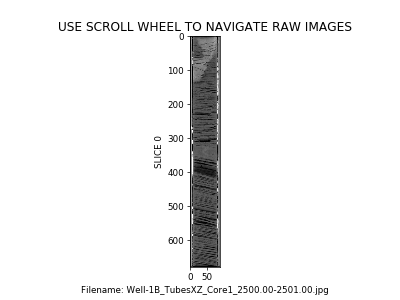

In [61]:
# Create plot for raw image files imported

fig, ax = plt.subplots(1, 1)

X_img = [allimages_dict.iloc[i] for i in allimages_dict.index]

tracker = IndexTracker(ax, (X_img), column='image_mat')

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()


<a id="tests_1B"></a>
<h2 style="text-align:center;"> <font color=#FF4500> --- SELECT AN IMAGE TO QC ---</font></h2>


<h3 style="text-align:center;">
Enter number of image file that you want to QC 
<br><br>
``n = file_number``
 &ensp; (e.g. 1,5,10,50,90, ....) </h3>
 
 **Go back to [Tests Section](#tests_0)**
<h4 style="text-align:right;">[Next Section](#tests_2)</h4>

<IPython.core.display.Javascript object>


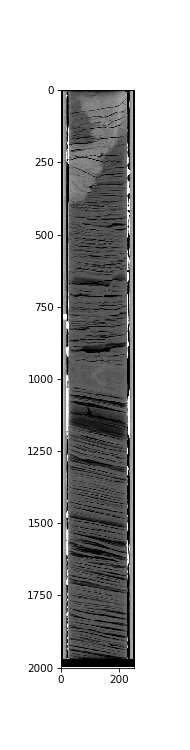

In [11]:
# --- Select image number in dictionary that you want to QC
n = 40

# define raw image to analyze
image_raw = allimages_dict.image_mat[n]

# --- show raw image that will be QC'd
plt.figure(figsize=(0.01*image_raw.shape[1], 0.005*image_raw.shape[0])) # if you want to define a figure size
plt.imshow(image_raw,'gray',interpolation=None)
plt.show()


  # if you only want to test without importing ALL images
# image_df = full_image_df.loc[n]
# print(image_df.Depth_from, image_df.Depth_to)
# image_raw = plt.imread(os.path.normpath(image_df.Path+'/'+image_df.Filename))
# print("path:",os.path.normpath(image_df.Path+'/'+image_df.Filename))

<br><br><br>
  <h3 style="text-align:center;">[Go to the Top](#contents_section)</h3>
  
  -------------------------------

<a id="tests_2"></a>

<h3 style="text-align:center;"> <font color=#FF4500>
 || 2 || === MODULE 2 ===</font>
 
<br><br><br>
 
 <font color=tomato>CODE: [Module 2](#section_2) </font> - Image Processing</h3>
 
 **Go back to [Tests Section](#tests_0)**
 <h4 style="text-align:right;">[Next Section](#tests_3)</h4>

<a id="tests_2A"></a>

<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2A ||    -- <u>MODULE 2A</u>: PreProcessing -- </font> </h3>

**Go back to [Tests - Module 2](#tests_2)**
<h4 style="text-align:right;">[Next SubSection](#tests_2B)</h4>

[Go to Tests Module 3 - All Images at once](#tests_3)

bright threshold: 200
TOTAL TIME: 2.3 seconds


<IPython.core.display.Javascript object>


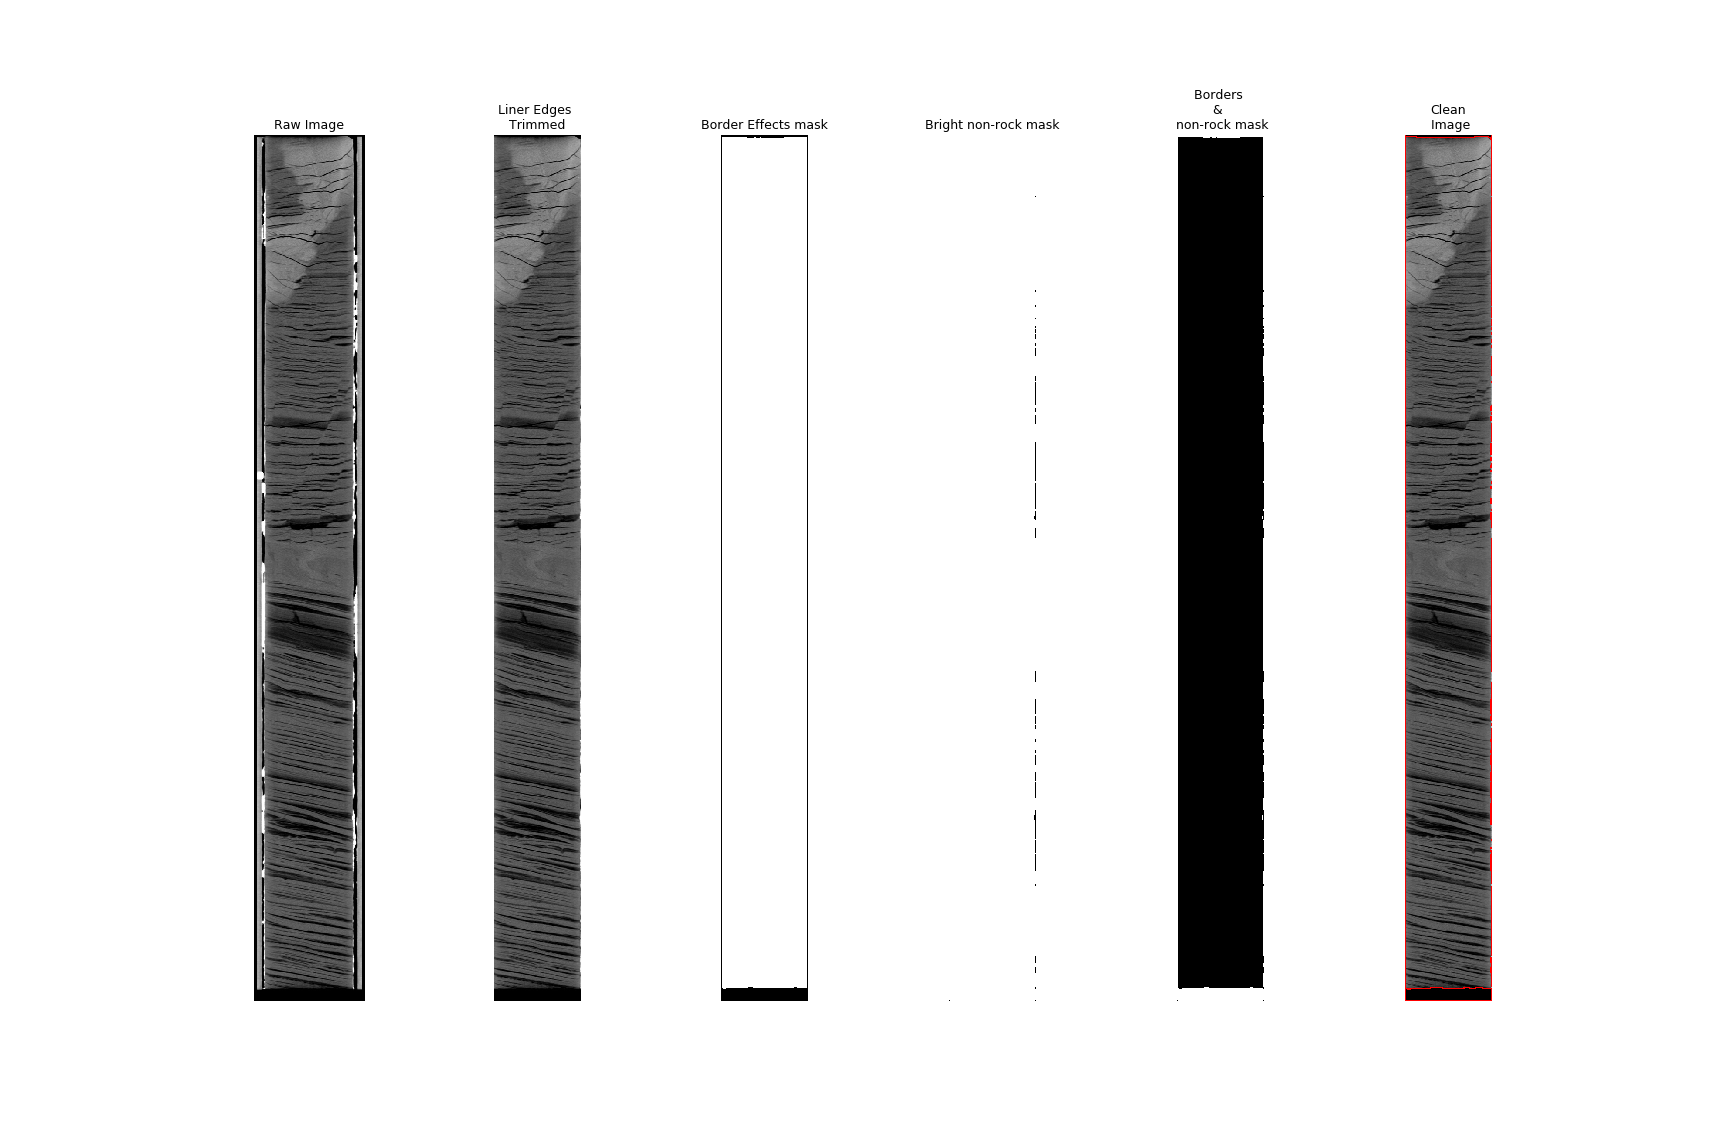

In [200]:
## ~~~~~~~~ ---------------------------------- ~~~~~~~~
## ~~~~~~~~ -------- FULL MODULE TEST -------- ~~~~~~~~
## ~~~~~~~~ ---------------------------------- ~~~~~~~~

# START TIMER
import time
start = time.time()

### ---------- CALCULATED VALUES ----------

# -- Image clean-up --

    # original image
image_to_analyze = image_raw

    # image without core barrel edges
image_trimmed = trim_liner_edges(image_raw, width=core_width)

    # irregular borders and border effects mask
borders_mask = extract_borders(image_raw, width=core_width)

    # upper threshold value to separate bright non-rock components
upper_threshold = get_high_threshold(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)
print("bright threshold:", upper_threshold)

    # bright non-rock components mask
bright_nonrock = extract_bright_components(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)

    # All non-rock components and effects mask
mask_non_reservoir = (borders_mask^bright_nonrock) # ``^`` is bitwise xor operator

    # image with non-rock components mask applied
image_clean = image_trimmed*~mask_non_reservoir


# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),2))



### ---------------------------
### ---------- PLOTS ----------
### FULL RESULTS COMPARISON ###

image_to_use = image_raw
mask_to_use = mask_non_reservoir

# --- Create figure
plt.figure(figsize=(0.015*6*image_to_use.shape[1], 0.0075*image_to_use.shape[0]))

# --- Original Raw image 
plt.subplot2grid((1, 6), (0, 0))
plt.imshow(
            image_to_use,
            'gray')
plt.title('Raw Image')
plt.axis('off')

# --- Original image (liner edges trimmed)
plt.subplot2grid((1, 6), (0, 1))
plt.imshow(
            image_trimmed,
            'gray')
plt.title('Liner Edges \nTrimmed')
plt.axis('off')

# --- Border effects mask 
plt.subplot2grid((1, 6), (0, 2))
plt.imshow(
            borders_mask,
            'gray')
plt.title('Border Effects mask')
plt.axis('off')

# --- Bright non-rock components mask
plt.subplot2grid((1, 6), (0, 3))
plt.imshow(
            bright_nonrock,
            'gray')
plt.title('Bright non-rock mask')
plt.axis('off')

# --- Non-rock components in trimmed image
plt.subplot2grid((1, 6), (0, 4))
plt.imshow(
            mask_non_reservoir,
            'gray')
plt.title('Borders \n& \n non-rock mask')
plt.axis('off')
                 
# --- Clean image (liner edges trimmed & non-rock components identified)
plt.subplot2grid((1, 6), (0, 5))
plt.imshow(
            skimage.segmentation.mark_boundaries(
                    image_trimmed,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title('Clean\n Image')
plt.axis('off')

plt.show()

<a id="tests_2B"></a>

<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2B ||    -- <u>MODULE 2B</u>: Filters -- </font> </h3>

**Go back to [Tests - Module 2](#tests_2)**
<h4 style="text-align:right;">[Next SubSection](#tests_2C)</h4>

bright threshold: 200
TOTAL TIME: 8.05 seconds


<IPython.core.display.Javascript object>


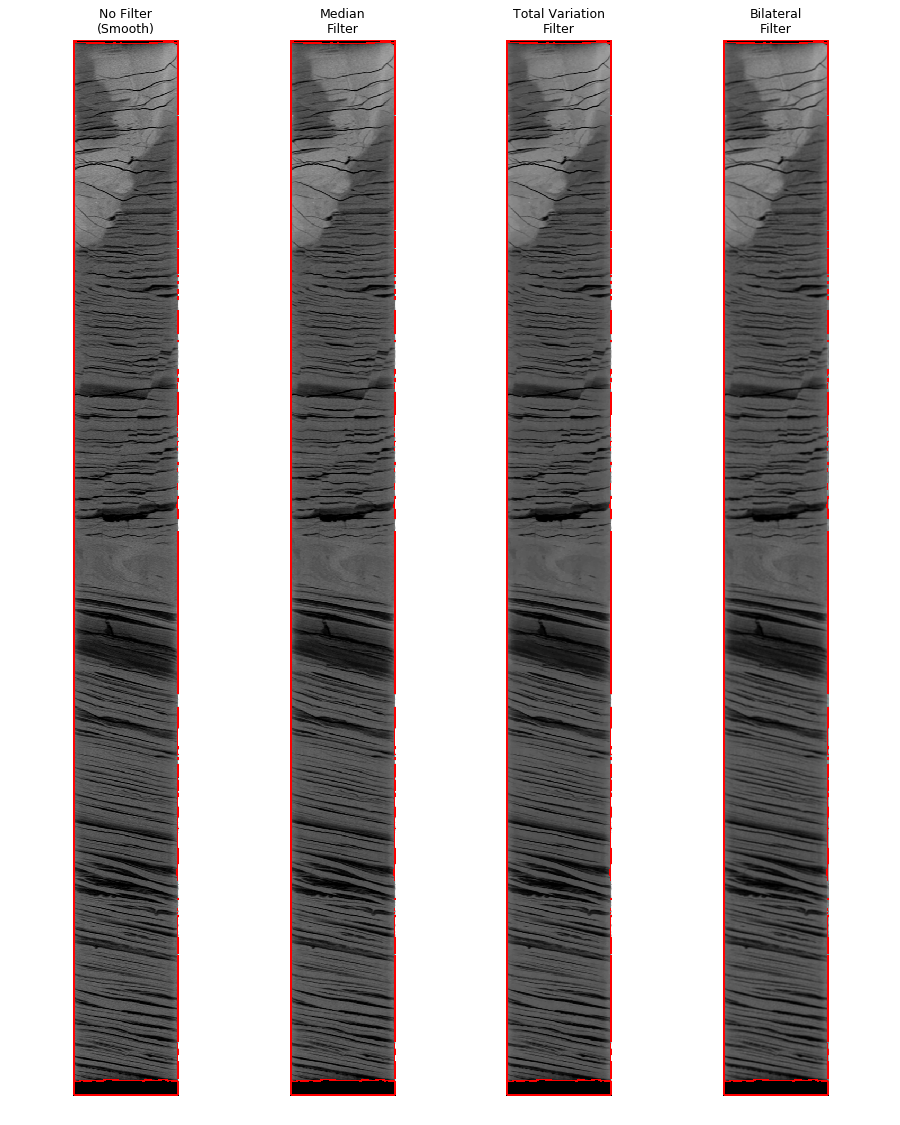

In [199]:
## ~~~~~~~~ ---------------------------------- ~~~~~~~~
## ~~~~~~~~ -------- FULL MODULE TEST -------- ~~~~~~~~
## ~~~~~~~~ ---------------------------------- ~~~~~~~~

# START TIMER
import time
start = time.time()

### ---------- CALCULATED VALUES ----------

# -- Image clean-up --

    # original image
image_to_analyze = image_raw

    # image without core barrel edges
image_trimmed = trim_liner_edges(image_raw, width=core_width)

    # irregular borders and border effects mask
borders_mask = extract_borders(image_raw, width=core_width)

    # upper threshold value to separate bright non-rock components
upper_threshold = get_high_threshold(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)
print("bright threshold:", upper_threshold)

    # bright non-rock components mask
bright_nonrock = extract_bright_components(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)

    # All non-rock components and effects mask
mask_non_reservoir = (borders_mask^bright_nonrock) # ``^`` is bitwise xor operator

    # image with non-rock components mask applied
image_clean = image_trimmed*~mask_non_reservoir

# -- Filters --

    # image with median smoothing filter applied
image_smooth_median = smooth_image_median_filter(image_clean)

    # image with total variation filter applied
image_smooth_tv = smooth_image_tv_filter(image_clean)

    # image with bilateral filter applied
image_smooth_bilateral = smooth_image_bilateral_filter(image_clean, 3, 5, 3)

    # image with DEFAULT smoothing filter applied
image_smooth = image_smooth_median # median filter is recommended as default!!
image_smooth_no_borders = image_smooth*~mask_non_reservoir # borders are shown as black


# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),2))

### ---------------------------
### ---------- PLOTS ----------
### FULL RESULTS COMPARISON ###

image_to_use = image_clean
mask_to_use = mask_non_reservoir

# --- Create figure
plt.figure(figsize=(0.015*4*image_to_use.shape[1], 0.0075*image_to_use.shape[0]))

# --- Original image (clean)
plt.subplot2grid((1, 4), (0, 0))
plt.imshow(
            skimage.segmentation.mark_boundaries(
                    image_to_use,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("No Filter\n(Smooth)")
plt.axis('off')

# --- Smooth image (clean with median filter)
plt.subplot2grid((1, 4), (0, 1))
plt.imshow(
            skimage.segmentation.mark_boundaries(
                    image_smooth_median,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Median\nFilter")
plt.axis('off')

# --- Smooth image (clean with total variation filter)
plt.subplot2grid((1, 4), (0, 2))
plt.imshow(
            skimage.segmentation.mark_boundaries(
                    image_smooth_tv,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Total Variation\nFilter")
plt.axis('off')

# --- Smooth image (clean with bilateral filter)
plt.subplot2grid((1, 4), (0, 3))
plt.imshow(
            skimage.segmentation.mark_boundaries(
                    image_smooth_bilateral,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Bilateral\nFilter")
plt.axis('off')

plt.tight_layout()
plt.show()

<a id="tests_2C"></a>

<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2C ||    -- <u>MODULE 2C</u>: Thresholding -- </font> </h3>

**Go back to [Tests - Module 2](#tests_2)**
<h4 style="text-align:right;">[Next SubSection](#tests_2D)</h4>

bright threshold: 200
Global Otsu threshold value: 59
block size for local thresholding: 255
TOTAL TIME: 8.46 seconds


<IPython.core.display.Javascript object>


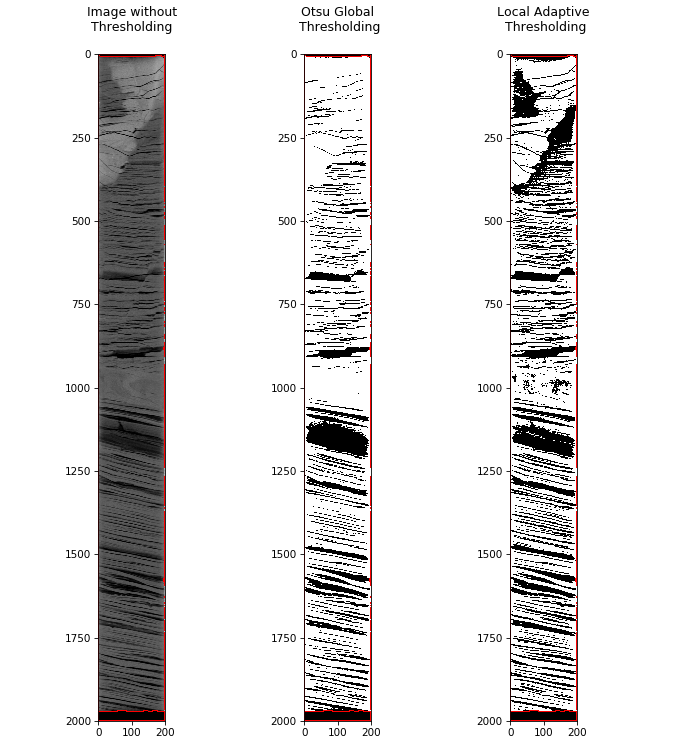

In [135]:
## ~~~~~~~~ ---------------------------------- ~~~~~~~~
## ~~~~~~~~ -------- FULL MODULE TEST -------- ~~~~~~~~
## ~~~~~~~~ ---------------------------------- ~~~~~~~~

# START TIMER
import time
start = time.time()

### ---------- CALCULATED VALUES ----------

# -- Image clean-up --

    # original image
image_to_analyze = image_raw

    # image without core barrel edges
image_trimmed = trim_liner_edges(image_raw, width=core_width)

    # irregular borders and border effects mask
borders_mask = extract_borders(image_raw, width=core_width)

    # upper threshold value to separate bright non-rock components
upper_threshold = get_high_threshold(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)
print("bright threshold:", upper_threshold)

    # bright non-rock components mask
bright_nonrock = extract_bright_components(image_trimmed, mask=borders_mask, high_limit=upper_threshold_limit)

    # All non-rock components and effects mask
mask_non_reservoir = (borders_mask^bright_nonrock) # ``^`` is bitwise xor operator

    # image with non-rock components mask applied
image_clean = image_trimmed*~mask_non_reservoir

# -- Filters --

    # image with median smoothing filter applied
image_smooth_median = smooth_image_median_filter(image_clean)

    # image with total variation filter applied
image_smooth_tv = smooth_image_tv_filter(image_clean)

    # image with bilateral filter applied
image_smooth_bilateral = smooth_image_bilateral_filter(image_clean, 3, 5, 3)

    # image with DEFAULT smoothing filter applied
image_smooth = image_smooth_median # median filter is recommended as default!!
image_smooth_no_borders = image_smooth*~mask_non_reservoir # borders are shown as black

# -- Thresholding --

    # threshold values with Global Otsu Method
threshold_global_value = get_global_otsu_threshold(image_smooth)
print('Global Otsu threshold value:',threshold_global_value)

    # threshold values with Local Adaptive Method
threshold_local_value = get_local_adaptive_threshold(image_smooth,
                                                     block_size=neighbourhood_size,
                                                     method=method_local_thresholding)
print('block size for local thresholding:',neighbourhood_size)

    # sand and shale values with Global Otsu thresholding method
sand_global,shale_global = separate_sand_shale(image_smooth,
                                               threshold=threshold_global_value,
                                               mask=~mask_non_reservoir)

    # sand and shale values with local adaptive thresholding method
sand_local,shale_local = separate_sand_shale(image_smooth, 
                                             threshold=threshold_local_value, 
                                             mask=~mask_non_reservoir)


# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),2))

### ---------------------------
### ---------- PLOTS ----------
### FULL RESULTS COMPARISON ###

image_to_use = image_smooth
mask_to_use = mask_non_reservoir

# --- Create figure
plt.figure(figsize=(0.015*3*image_to_use.shape[1], 0.005*image_to_use.shape[0]))

# --- Smooth image (clean)
plt.subplot2grid((1, 3), (0, 0))
plt.imshow(            
            skimage.segmentation.mark_boundaries(
                    image_to_use,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Image without\nThresholding", y=1.025)

# --- Thesholded Global Otsu method
plt.subplot2grid((1, 3), (0, 1))
plt.imshow(            
            skimage.segmentation.mark_boundaries(
                    shale_global,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Otsu Global\n Thresholding", y=1.025)

# --- Thesholded Local Adaptive method
plt.subplot2grid((1, 3), (0, 2))
plt.imshow(            
            skimage.segmentation.mark_boundaries(
                    shale_local,
                    ~mask_to_use,
                    color=(1,0,0),
                    outline_color=(1,0,0)
                    ),
            'gray')
plt.title("Local Adaptive\n Thresholding", y=1.025)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


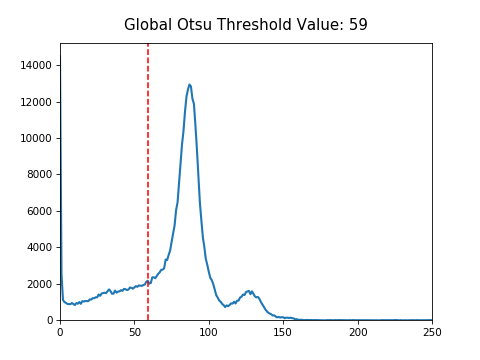

In [157]:
# hist, bins_center = exposure.histogram(image_smooth)

plt.figure()

plt.plot(skimage.exposure.histogram(image_smooth*~mask_non_reservoir)[1], skimage.exposure.histogram(image_smooth*~mask_non_reservoir)[0], lw=2)

plt.title(('Global Otsu Threshold Value: ' + str(threshold_global_value)), fontsize='x-large', y=1.025)

plt.axvline(threshold_global_value, color='r', ls='--')
plt.ylim(0,)
plt.xlim(0,250)
plt.show()

<a id="tests_2D"></a>

<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2D ||    -- <u>MODULE 2D</u>: Sand-Shale Analysis -- </font> </h3>

**Go back to [Tests - Module 2](#tests_2)**
<h4 style="text-align:right;">[Next SubSection](#tests_2E)</h4>

* Code to calculate equivalent interval in pixels :

``# mean sand and shale values for a specified interval``

``# real interval in meters``

>`` thick = allimages_dict.Thickness[n]``

> ``print("Thickness:", thick)``

 ``# convert interval in cm to interval in pixels``

>``interval_pixels_NET_calculation = int(round(interval_cm_NET_calculation*image_smooth.shape[0]/(thick*100)))``

>``print("Interval in cm:", interval_cm_NET_calculation, "- Interval in pixels:", interval_pixels_NET_calculation)
``

<h3 style="text-align:center;"><font color=#FF1493>1) WITH GLOBAL THRESHOLDING</font></h3>

Thickness: 1.0
Interval in cm: 2 - Interval in pixels: 40
bright threshold: 200
Global Otsu threshold value: 59
block size for local thresholding: 255
TOTAL TIME: 8.98 seconds


<IPython.core.display.Javascript object>


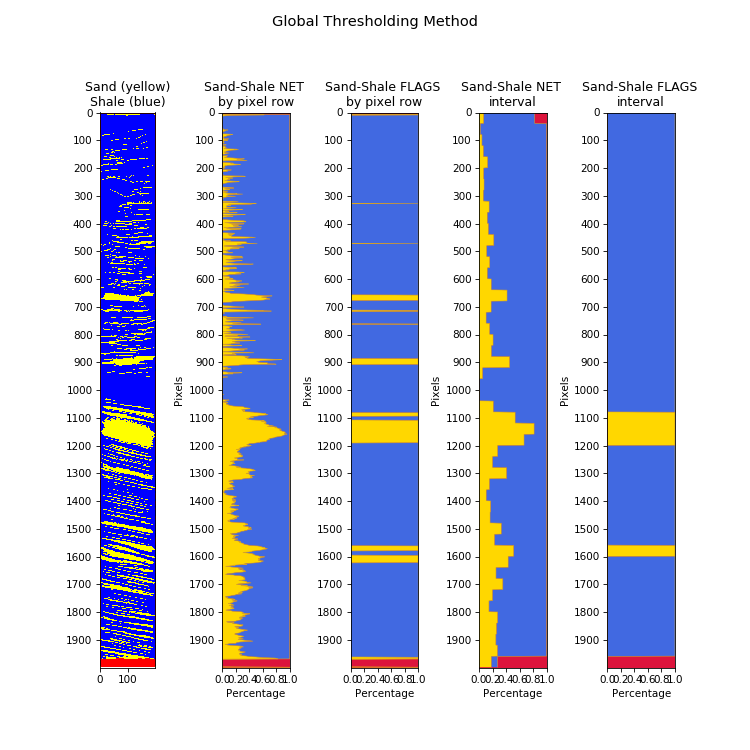

In [205]:
###############
    # mean sand and shale values for a specified interval
        # real interval in meters
thick = allimages_dict.Thickness[n]
print("Thickness:", thick)
        # convert interval in cm to interval in pixels
interval_pixels_NET_calculation = int(round(interval_cm_NET_calculation*image_raw.shape[0]/(thick*100)))
print("Interval in cm:", interval_cm_NET_calculation, "- Interval in pixels:", interval_pixels_NET_calculation)
###############


## ~~~~~~~~ ---------------------------------- ~~~~~~~~
## ~~~~~~~~ -------- FULL MODULE TEST -------- ~~~~~~~~
## ~~~~~~~~ ---------------------------------- ~~~~~~~~

# START TIMER
import time
start = time.time()

### ---------- CALCULATED VALUES ----------

    # original image
image_to_analyze = image_raw

    # image without core barrel edges
image_trimmed = trim_liner_edges(image_raw, 
                                 width=core_width)

    # irregular borders and border effects mask
borders_mask = extract_borders(image_raw, 
                               width=core_width)

    # upper threshold value to separate bright non-rock components
upper_threshold = get_high_threshold(image_trimmed, 
                                     mask=borders_mask, 
                                     high_limit=upper_threshold_limit)
print("bright threshold:", upper_threshold)

    # bright non-rock components mask
bright_nonrock = extract_bright_components(image_trimmed, 
                                           mask=borders_mask, 
                                           high_limit=upper_threshold_limit)

    # All non-rock components and effects mask
mask_non_reservoir = (borders_mask^bright_nonrock) # ``^`` is bitwise xor operator

    # image with non-rock components mask applied
image_clean = image_trimmed*~mask_non_reservoir

# -- Filters --

    # image with median smoothing filter applied
image_smooth_median = smooth_image_median_filter(image_clean)

    # image with total variation filter applied
image_smooth_tv = smooth_image_tv_filter(image_clean)

    # image with bilateral filter applied
image_smooth_bilateral = smooth_image_bilateral_filter(image_clean, 3, 5, 3)

    # image with DEFAULT smoothing filter applied
image_smooth = image_smooth_median # median filter is recommended as default!!
image_smooth_no_borders = image_smooth*~mask_non_reservoir # borders are shown as black

# -- Thresholding --

    # threshold values with Global Otsu Method
threshold_global_value = get_global_otsu_threshold(image_smooth)
print('Global Otsu threshold value:',threshold_global_value)

    # threshold values with Local Adaptive Method
threshold_local_value = get_local_adaptive_threshold(image_smooth,
                                                     block_size=neighbourhood_size,
                                                     method=method_local_thresholding)
print('block size for local thresholding:',neighbourhood_size)

    # sand and shale values with Global Otsu thresholding method
sand_global,shale_global = separate_sand_shale(image_smooth,
                                               threshold=threshold_global_value,
                                               mask=~mask_non_reservoir)

    # sand and shale values with local adaptive thresholding method
sand_local,shale_local = separate_sand_shale(image_smooth,
                                             threshold=threshold_local_value,
                                             mask=~mask_non_reservoir)

# -- Sand NET Calculations --
    
sand_mean_pixels_global,shale_mean_pixels_global = sand_shale_NETcount_pixels(image_smooth,
                                                                threshold=threshold_global_value,
                                                                mask=~mask_non_reservoir)

    # mean sand and shale FLAGS per pixel row
sand_flag_pixels_global, shale_flag_pixels_global = ((sand_mean_pixels_global >= sand_cutoff),
                                                    (shale_mean_pixels_global > (1-sand_cutoff)))


    # calculate mean sand and shale values for a specified interval GLOBAL THRESHOLDING METHOD
sand_mean_interval_global,shale_mean_interval_global = sand_shale_NETcount_interval(image_smooth,
                                                                      interval=interval_pixels_NET_calculation,
                                                                      threshold=threshold_global_value,
                                                                      mask=~mask_non_reservoir)
                                       
    # mean sand and shale FLAGS per pixel row for a specified interval 
sand_flag_interval_global, shale_flag_interval_global = (sand_mean_interval_global >= sand_cutoff,
                                                        shale_mean_interval_global > (1-sand_cutoff))
    

# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),2))



### ---------------------------
### ---------- PLOTS ----------
### FULL RESULTS COMPARISON ###


image_to_use = image_smooth
mask_to_use = mask_non_reservoir


# --- Create figure
fig_size = [0.01*5*image_to_use.shape[1], 0.005*image_to_use.shape[0]]
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=fig_size, squeeze=True)
plt.suptitle('Global Thresholding Method',fontsize=14)


# --- THRESHOLDED GLOBAL Smooth image (clean)
plot_color_overlay(image_to_use, sand_global, shale_global, other=mask_to_use,ax=axes[0])


# --- Sand-Shale NET by PIXEL
plot_sand_shale_count(sand_mean_pixels_global,shale_mean_pixels_global,
                      plot_title='Sand-Shale NET \nby pixel row',
                      ax=axes[1])


# --- Sand-Shale FLAGS by PIXEL
plot_sand_shale_count(sand_flag_pixels_global, shale_flag_pixels_global,
                      plot_title='Sand-Shale FLAGS \nby pixel row',
                      ax=axes[2])


# --- Sand-Shale NET by INTERVAL
plot_sand_shale_count(sand_mean_interval_global,shale_mean_interval_global,
                      plot_title='Sand-Shale NET \ninterval', 
                      ax=axes[3])
   
    
# --- Sand-Shale FLAGS by PIXEL
plot_sand_shale_count(sand_flag_interval_global, shale_flag_interval_global,
                      plot_title='Sand-Shale FLAGS \ninterval',
                      ax=axes[4])

# --- Show figure
plt.subplots_adjust(wspace=0.9, top=0.85)

plt.show()

<h3 style="text-align:center;"><font color=#FF1493>2) WITH LOCAL THRESHOLDING</font></h3>

Thickness: 1.0
Interval in cm: 2 - Interval in pixels: 40
bright threshold: 200
Global Otsu threshold value: 59
block size for local thresholding: 255
TOTAL TIME: 9.12 seconds


<IPython.core.display.Javascript object>


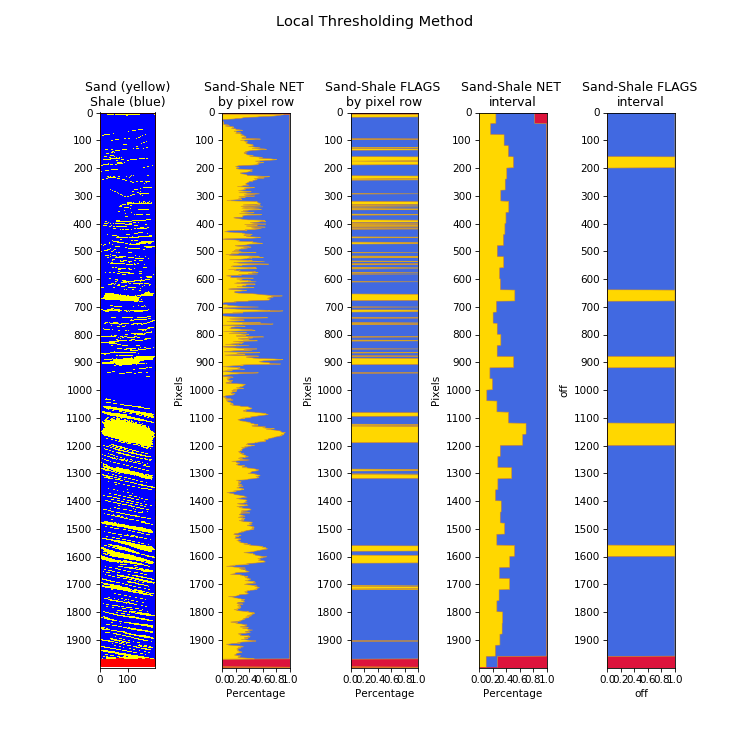

In [206]:
###############
    # mean sand and shale values for a specified interval
        # real interval in meters
thick = allimages_dict.Thickness[n]
print("Thickness:", thick)
        # convert interval in cm to interval in pixels
interval_pixels_NET_calculation = int(round(interval_cm_NET_calculation*image_raw.shape[0]/(thick*100)))
print("Interval in cm:", interval_cm_NET_calculation, "- Interval in pixels:", interval_pixels_NET_calculation)
###############


## ~~~~~~~~ ---------------------------------- ~~~~~~~~
## ~~~~~~~~ -------- FULL MODULE TEST -------- ~~~~~~~~
## ~~~~~~~~ ---------------------------------- ~~~~~~~~

# START TIMER
import time
start = time.time()

### ---------- CALCULATED VALUES ----------

    # original image
image_to_analyze = image_raw

    # image without core barrel edges
image_trimmed = trim_liner_edges(image_raw, 
                                 width=core_width)

    # irregular borders and border effects mask
borders_mask = extract_borders(image_raw, 
                               width=core_width)

    # upper threshold value to separate bright non-rock components
upper_threshold = get_high_threshold(image_trimmed, 
                                     mask=borders_mask, 
                                     high_limit=upper_threshold_limit)
print("bright threshold:", upper_threshold)

    # bright non-rock components mask
bright_nonrock = extract_bright_components(image_trimmed, 
                                           mask=borders_mask, 
                                           high_limit=upper_threshold_limit)

    # All non-rock components and effects mask
mask_non_reservoir = (borders_mask^bright_nonrock) # ``^`` is bitwise xor operator

    # image with non-rock components mask applied
image_clean = image_trimmed*~mask_non_reservoir

# -- Filters --

    # image with median smoothing filter applied
image_smooth_median = smooth_image_median_filter(image_clean)

    # image with total variation filter applied
image_smooth_tv = smooth_image_tv_filter(image_clean)

    # image with bilateral filter applied
image_smooth_bilateral = smooth_image_bilateral_filter(image_clean, 3, 5, 3)

    # image with DEFAULT smoothing filter applied
image_smooth = image_smooth_median # median filter is recommended as default!!
image_smooth_no_borders = image_smooth*~mask_non_reservoir # borders are shown as black

# -- Thresholding --

    # threshold values with Global Otsu Method
threshold_global_value = get_global_otsu_threshold(image_smooth)
print('Global Otsu threshold value:',threshold_global_value)

    # threshold values with Local Adaptive Method
threshold_local_value = get_local_adaptive_threshold(image_smooth,
                                                     block_size=neighbourhood_size,
                                                     method=method_local_thresholding)
print('block size for local thresholding:',neighbourhood_size)

    # sand and shale values with Global Otsu thresholding method
sand_global,shale_global = separate_sand_shale(image_smooth,
                                               threshold=threshold_global_value,
                                               mask=~mask_non_reservoir)

    # sand and shale values with local adaptive thresholding method
sand_local,shale_local = separate_sand_shale(image_smooth,
                                             threshold=threshold_local_value,
                                             mask=~mask_non_reservoir)


# -- Sand NET Calculations --
    
sand_mean_pixels_local,shale_mean_pixels_local = sand_shale_NETcount_pixels(image_smooth,
                                                                threshold=threshold_local_value,
                                                                mask=~mask_non_reservoir)

    # mean sand and shale FLAGS per pixel row
sand_flag_pixels_local, shale_flag_pixels_local = ((sand_mean_pixels_local >= sand_cutoff),
                                                   (shale_mean_pixels_local > (1-sand_cutoff)))


    # calculate mean sand and shale values for a specified interval GLOBAL THRESHOLDING METHOD
sand_mean_interval_local,shale_mean_interval_local = sand_shale_NETcount_interval(image_smooth,
                                                                      interval=interval_pixels_NET_calculation,
                                                                      threshold=threshold_local_value,
                                                                      mask=~mask_non_reservoir)
                                       
    # mean sand and shale FLAGS per pixel row for a specified interval 
sand_flag_interval_local, shale_flag_interval_local = ((sand_mean_interval_local >= sand_cutoff),
                                                      (shale_mean_interval_local > (1-sand_cutoff)))
    

# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),2))


### ---------------------------
### ---------- PLOTS ----------
### FULL RESULTS COMPARISON ###


image_to_use = image_smooth
mask_to_use = mask_non_reservoir


# --- Create figure
fig_size = [0.01*5*image_to_use.shape[1], 0.005*image_to_use.shape[0]]
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=fig_size, squeeze=True)
plt.suptitle('Local Thresholding Method',fontsize=14)


# --- THRESHOLDED GLOBAL Smooth image (clean)
plot_color_overlay(image_to_use, sand_global, shale_global, other=mask_to_use,ax=axes[0])
plt.xlabel('off')
plt.ylabel('off')

# --- Sand-Shale NET by PIXEL
plot_sand_shale_count(sand_mean_pixels_local,shale_mean_pixels_local,
                      plot_title='Sand-Shale NET \nby pixel row',
                      ax=axes[1])
plt.xlabel('off')
plt.ylabel('off')

# --- Sand-Shale FLAGS by PIXEL
plot_sand_shale_count(sand_flag_pixels_local, shale_flag_pixels_local,
                      plot_title='Sand-Shale FLAGS \nby pixel row',
                      ax=axes[2])
plt.xlabel('off')
plt.ylabel('off')

# --- Sand-Shale NET by INTERVAL
plot_sand_shale_count(sand_mean_interval_local,shale_mean_interval_local,
                      plot_title='Sand-Shale NET \ninterval', 
                      ax=axes[3])
plt.xlabel('off') 
plt.ylabel('off')
    
# --- Sand-Shale FLAGS by PIXEL
plot_sand_shale_count(sand_flag_interval_local, shale_flag_interval_local,
                      plot_title='Sand-Shale FLAGS \ninterval',
                      ax=axes[4])
plt.xlabel('off')
plt.ylabel('off')

# --- Show figure
plt.subplots_adjust(wspace=0.9, top=0.85)

plt.show()

<a id="tests_2E"></a>

<h3 style="text-align:left;"><font color=#CD5C5C> &#9632; &ensp; || 2E ||    -- <u>MODULE 2E</u>: Visualizations -- </font> </h3>

**Go back to [Tests - Module 2](#tests_2)**
<h4 style="text-align:right;">[Next Section](#tests_3)</h4>

<h3 style="text-align:center;"><font color=#FF1493>1) WITH GLOBAL THRESHOLDING</font></h3>


<IPython.core.display.Javascript object>


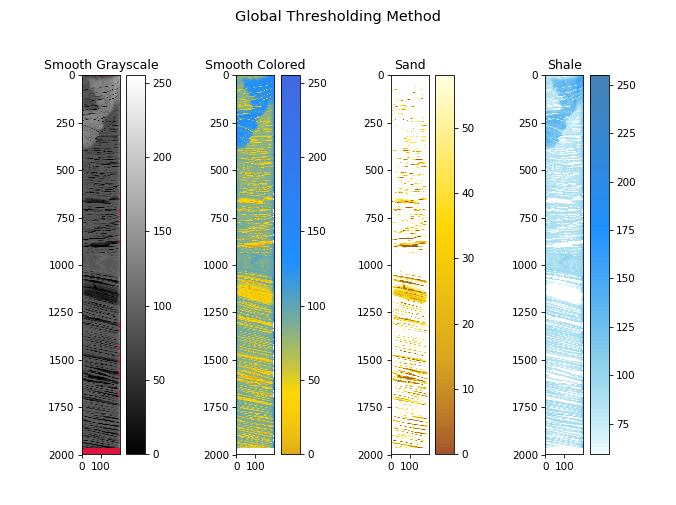

In [195]:
### ----------------------------
### ------ DATA FOR PLOTS ------

image_to_use = image_smooth
mask_to_use = ~mask_non_reservoir
sand_to_use = sand_global
shale_to_use = shale_global


### ----------------------------
### ----------- PLOTS ----------
    
# --- Create figure
fig_size = [30,30]

# Call function to get all plots
plot_sand_shale_v2(image_to_use, sand_to_use, shale_to_use, mask=mask_to_use)

plt.suptitle('Global Thresholding Method',fontsize=14)
plt.subplots_adjust(top=0.85, bottom=0.1, left=0.025)
# plt.tight_layout()

plt.show()



# ---------------------
# # To plot as SUBPLOTS
# fig, axes = plt.subplots(ncols=4, nrows=1, figsize=fig_size, squeeze=True)

# # --- Clean Smooth image (grayscale)
# axes[0] = (plot_masked_smooth_grayscale_with_red_background(image_to_use,
#                                                             mask=mask_to_use,
#                                                             ax=axes[0]))
# # --- Clean Smooth image (colour)
# axes[1] = (plot_masked_smooth_colorscale(image_to_use, 
#                                          mask=mask_to_use,
#                                          ax=axes[1]))

# # --- Sand Layer
# axes[2] = plot_masked_sand_colorscale(image_to_use, 
#                                       sand_to_use, 
#                                       shale_to_use, 
#                                       mask=mask_to_use,
#                                       ax=axes[2]);

# # --- Shale Layer Global
# # plt.subplots(4)
# axes[3] = plot_masked_shale_colorscale(image_to_use, 
#                                        sand_to_use, 
#                                        shale_to_use, 
#                                        mask=mask_to_use,
#                                        ax=axes[3]);
# # --- Show figure
# fig.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>


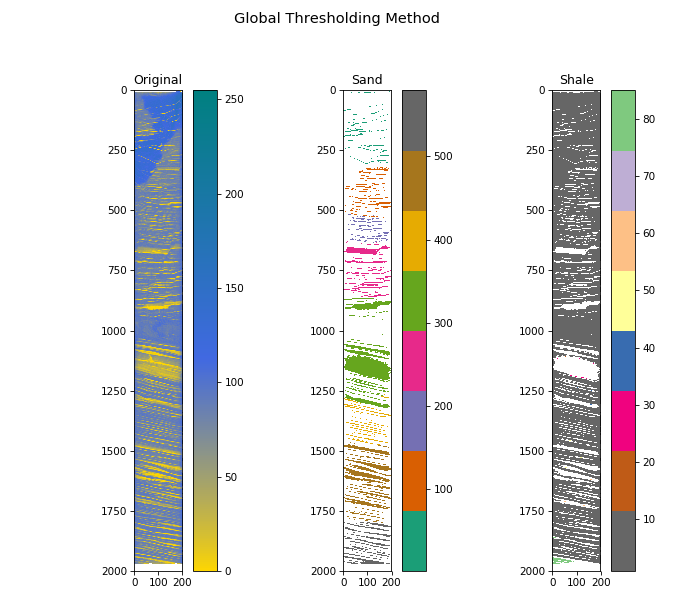

In [165]:
### ----------------------------
### ------ DATA FOR PLOTS ------

image_to_use = image_smooth
mask_to_use = ~mask_non_reservoir
sand_to_use = sand_global
shale_to_use = shale_global

### ----------------------------
### ----------- PLOTS ----------
    
# --- Create figure
plt.figure(figsize=(0.015*3*image_trimmed.shape[1], 0.004*image_trimmed.shape[0]))

# plot a different visualization layout  
plot_sand_shale_v1(image_to_use,sand_to_use,shale_to_use,mask=mask_to_use,N_gamma=0.85)

plt.suptitle('Global Thresholding Method',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<h3 style="text-align:center;"><font color=#FF1493>2) WITH LOCAL THRESHOLDING</font></h3>

<IPython.core.display.Javascript object>


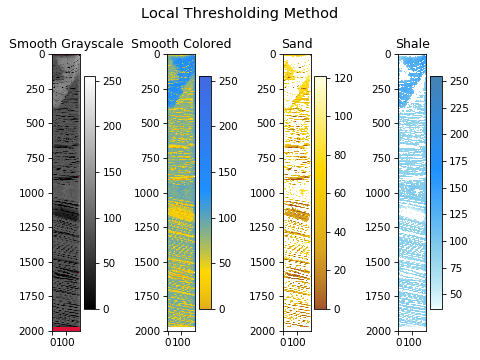

In [23]:
### ----------------------------
### ------ DATA FOR PLOTS ------

image_to_use = image_smooth
mask_to_use = ~mask_non_reservoir
sand_to_use = sand_local
shale_to_use = shale_local


### ----------------------------
### ----------- PLOTS ----------
    
# --- Create figure
fig_size = [0.015*4*image_trimmed.shape[1], 0.005*image_trimmed.shape[0]]

# Call function to get all plots
plot_sand_shale_v2(image_to_use, sand_to_use, shale_to_use, mask=mask_to_use)

plt.suptitle('Local Thresholding Method',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<IPython.core.display.Javascript object>


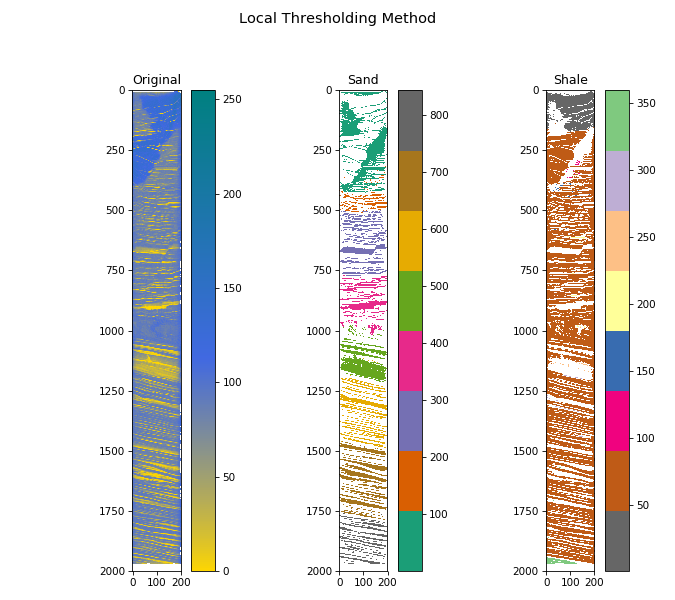

In [207]:
### ----------------------------
### ------ DATA FOR PLOTS ------

image_to_use = image_smooth
mask_to_use = ~mask_non_reservoir
sand_to_use = sand_local
shale_to_use = shale_local

### ----------------------------
### ----------- PLOTS ----------

# --- Create figure
plt.figure(figsize=(0.015*3*image_trimmed.shape[1], 0.004*image_trimmed.shape[0]))

# Call function to get all plots
plot_sand_shale_v1(image_to_use, sand_to_use, shale_to_use, mask=mask_to_use, N_gamma=0.85)

plt.suptitle('Local Thresholding Method',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<br><br><br>
  <h3 style="text-align:center;">[Go to the Top](#contents_section)</h3>
<h3 style="text-align:center;">-----------------------------------------
-----------------------------------------

<a id="tests_3"></a>
<h3 style="text-align:center;"> <font color=#FF4500> || 3 || ==== MODULE 3 ====</font></h3>
 
 
<h3> <font color=tomato>CODE: [Module 3](#section_3) </font> - QC ALL IMAGES and Combine individually processed images </h3>

**Go back to [Tests Section](#tests_0)**

  
  <h4 style="text-align:left;">[Previous SubSection](#tests_2E)</h4>  
  <h3 style="text-align:center;">[Go to FULL WORKFLOW EXECUTION](#tests_3_3)</h3>

<a id="tests_3_0"></a>

<h3 style="text-align:left;"><font color=red> 0. FIRST, LET'S GET EQUIVALENT DEPTH IN M FOR EACH PIXEL!
</font></h3>
<h3><u>We'll export the stacked depths in meters to a CSV file to use as reference for the stacked/combined images
  </u></h3>
  
  **Go back to [Tests Section 3](#tests_3)**
  
  <h4 style="text-align:right;">[Next SubSection](#tests_3_1)</h4>

In [62]:
# calculate equivalent depths for each pixel and add to dictionary
allimages_dict['DepthEquivMetersCombinedImage'] = [
                                   allimages_dict.iloc[i].BottomDepth + 
                                       (allimages_dict.iloc[i].Thickness/allimages_dict.iloc[i].image_mat.shape[0])*
                                            np.arange(0,allimages_dict.iloc[i].image_mat.shape[0]) 
                                                for i in allimages_dict.index]



<h3 style="text-align:left;">>  NOW LET'S EXPORT STACKED DEPTHS IN METERS TO CSV!
</font></h3>

In [57]:
# CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# Compose FileName first
idx = 0
export_file_description = 'DepthEquivMetersCombinedImage'
export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
                       '_' + 
                        str(export_file_description) + 
                            '_' +
                            str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
                                '-' +
                                str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])) 
                                    )
# Check that it follows the convention
print('output\\'+str(export_file_name))

# Concatenate all data into an array of ndims == 1
output_data = pd.Series(np.concatenate([allimages_dict.iloc[i].DepthEquivMetersCombinedImage 
                                                             for i in allimages_dict.index]))

output_DataFrame = pd.DataFrame({'DepthEquivMetersCombinedImage' : output_data})
#print(output_DataFrame)

## Now Export file
import pandas as pd

## === EXPORT DEPTHS TO CSV ===
export_file_format_data = '.csv'
output_data.to_csv(str(export_file_name)+str(export_file_format_data),
                                       sep=',',
                                       index = False)

output\Well-1B_DepthEquivMetersCombinedImage_2500.00-2600.00



<a id="tests_3_1"></a>

       
<h2 style="text-align:left;"><font color=red> 1. RAW IMAGES </font></h2>



**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section3) **
<br><br>
  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_0)</h4>  
  <h4 style="text-align:right;">[Next SubSection](#tests_3_2A)</h4>

<IPython.core.display.Javascript object>


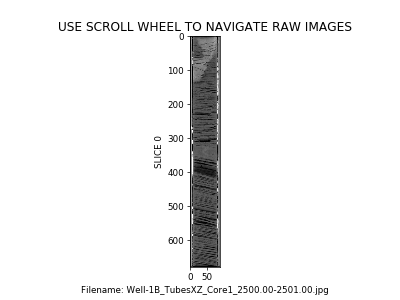

In [63]:
###  IMAGES VIEWER ###

# QC all RAW images
fig, ax = plt.subplots(1, 1)

# dictionary index
X_img = [allimages_dict.iloc[i] for i in allimages_dict.index]

# specify data for tracker
tracker = IndexTracker(ax, (X_img), column='image_mat')

# update tracker with mouse scroller
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

# load viewer
plt.show()

<h2 style="text-align:left;"><font color=blue>Re-check what output file will look like</font></h2>

<IPython.core.display.Javascript object>


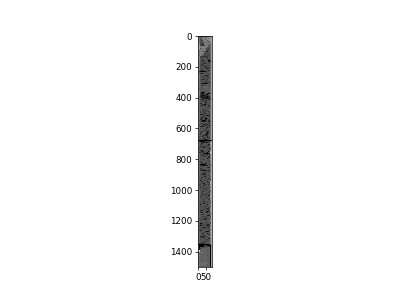

In [67]:
dictionary_with_data_to_analyze = allimages_dict

# stack all raw images 
allimages_comb_raw = combine_images_dict(allimages_dict,column='image_mat')


# show what a bit of what the output will look like
fig, ax = plt.subplots(1, 1)
fig_size=(5, 10)
plt.imshow(allimages_comb_raw[:1500,:],'gray')

<dd><h2 style="text-align:left;"><font color=red>If you are happy with output and want to export as .PNG or .CSV file: </font><br> <br>
    Uncomment the code below and run to save as PNG or CSV</h2>
    
>***NOTE***

>if you are not be able to save the whole file all at once, use the code below to save image in "blocks" instead

>``allimages_comb_raw = save_images_inblocks(output_image)``

In [68]:
### ============================== PNG ==============================

## === ESTABLISH FILENAME ===
# CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# Compose FileName first
idx = 0

export_file_description = 'RawImagesCombined'

export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
                       '_' + 
                        str(export_file_description) + 
                            '_' +
                            str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
                                '-' +
                                str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))

# Check that it follows the convention
print('output\\'+str(export_file_name))

# === OUTPUT IMAGE ===
output_image = allimages_comb_raw[:]

## === EXPORT TO PNG ===
# Save FULL IMAGE as .PNG
# export_file_format = '.png'
# skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format), 
#                   output_image)



# ### ============================== CSV ==============================
# # gET ALL DATA AS DATAFRAME

# output_data = pd.DataFrame({'RawImagesCombined' : [output_image]},
#                            index=output_DataFrame.DepthEquivMetersCombinedImage)
# # print(output_data)

# ## Now Export file
# import pandas as pd

# # ## === EXPORT DEPTHS TO CSV ===
# # export_file_format = '.csv'
# # output_data['RawImagesCombined'].to_csv('output\\'+str(export_file_name)+str(export_file_format),
# #                                        sep=',',
# #                                        index = True)


output\Well-1B_RawImagesCombined_2500.00-2600.00


<a id="tests_3_2A"></a>

<h2 style="text-align:left;"><font color=red> 2A. TRIMMED IMAGES </font></h2>

**[Check PreProcessing Tests on Individual Random Image](#tests_2A)**



**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section3) **
<br><br>
  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_1)</h4>  
  <h4 style="text-align:right;">[Next SubSection](#tests_3_2B)</h4>

<IPython.core.display.Javascript object>


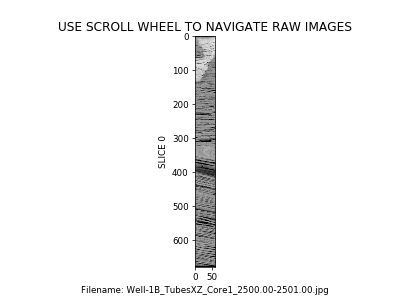

In [85]:
### TRIM EDGES FROM ALL IMAGES ###
# Add a column to dictionary with cropped images 
# Cropped images obtained applying trim_liner_edges function to all raw images
allimages_dict['image_trimmed'] = [trim_liner_edges(allimages_dict.iloc[i].image_mat,
                                                    width=core_width                                                   
                                                   ) for i in allimages_dict.index]

# create an RGB version of the cropped images
allimages_dict['image_trimmed_color'] = [skimage.color.gray2rgb(skimage.util.img_as_float(
                                            (allimages_dict.iloc[i].image_trimmed).copy())) for i in allimages_dict.index]



### CROPPED IMAGES VIEWER ###
# QC all cropped images (grayscale)
fig, ax = plt.subplots(1, 1)
# dictionary index
X_img = [allimages_dict.iloc[i] for i in allimages_dict.index]
# specify data for tracker
tracker = IndexTracker(ax, (X_img), column='image_trimmed')
# update tracker with mouse scroller
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
# load viewer
plt.show()

<h2 style="text-align:left;"><font color=blue>Re-check what output file will look like</font></h2>

(201649, 200)


<IPython.core.display.Javascript object>


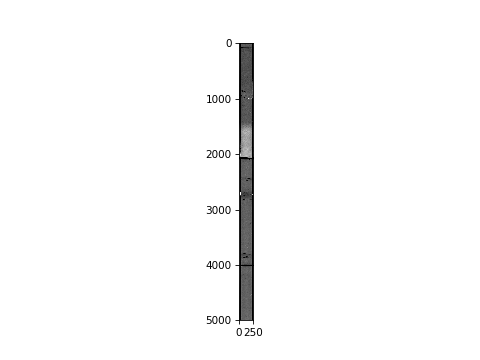

In [32]:
dictionary_with_data_to_analyze = allimages_dict

# stack all raw images 
allimages_comb_trimmed = combine_images_dict(allimages_dict,column='image_trimmed')


# show what a bit of what the output will look like
fig, ax = plt.subplots(1, 1)
fig_size=(5, 10)
plt.imshow(allimages_comb_raw[15000:20000,:],'gray')

<dd><h2 style="text-align:left;"><font color=red>If you are happy with output and want to export as .PNG or .CSV file: </font><br> <br>
    Uncomment the code below and run to save as PNG or CSV</h2>
    
>***NOTE***

>if you are not be able to save the whole file all at once, use the code below to save image in "blocks" instead

>``allimages_comb_raw = save_images_inblocks(output_image)``

In [89]:
### ============================== PNG ==============================

## === ESTABLISH FILENAME ===
# CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# Compose FileName first
idx = 0

export_file_description = 'TrimmedImagesCombined'

export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
                       '_' + 
                        str(export_file_description) + 
                            '_' +
                            str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
                                '-' +
                                str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))

# Check that it follows the convention
print('output\\'+str(export_file_name))

# === OUTPUT IMAGE ===
output_image = allimages_comb_trimmed[:]

## === EXPORT TO PNG ===
# Save FULL IMAGE as .PNG
# export_file_format = '.png'
# skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format), 
#                   output_image)



### ============================== CSV ==============================
# gET ALL DATA AS DATAFRAME

# output_data = pd.DataFrame({'TrimmedImagesCombined' : [output_image]},
#                            index=output_DataFrame.DepthEquivMetersCombinedImage)
# print(output_data)

# ## Now Export file
# import pandas as pd

# ## === EXPORT DEPTHS TO CSV ===
# export_file_format = '.csv'
# output_data['RawImagesCombined'].to_csv('output\\'+str(export_file_name)+str(export_file_format),
#                                        sep=',',
#                                        index = True)


output\Well-1B_TrimmedImagesCombined_2500.00-2600.00


<a id="tests_3_2B"></a>

<h2 style="text-align:left;"><font color=red> 2.B EXTRACT NON-ROCK COMPONENTS FROM IMAGES (MASKS) </font></h2>

<h3> EXECUTING THIS SCRIPT TAKES A BIT OF TIME (timed it as ~ 270 sec for 111 images)</h3>

<h4> NOTE: Ignore warning message 
<br><br>
``UserWarning: Only one label was provided to `remove_small_objects`.``
<br><br>
``Did you mean to use a boolean array? warn ("Only one label was provided to `remove_small_objects`. "``</h4>



**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **
<br><br>
  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_2A)</h4>  
  <h4 style="text-align:right;">[Next SubSection](#tests_3_2C)</h4>

<h3 style="text-align:center;"> DON'T RUN THE CODE IN SECTION 2.B UNLESS YOU WANT TO OUTPUT THOSE IMAGES WITH MASK PAINTED IN A DIFFERENT COLOR BECAUSE IT'S QUITE SLOW TO EXECUTE </h3>

In [ ]:
# ### ===================== LET'S GET ALL THE MASKS FIRST ============

# # START TIMER
# import time
# start = time.time()

# ## EXTRACT BORDER EFFECTS MASK FOR ALL IMAGES ###
# allimages_dict['border_effects_mask'] = [extract_borders(allimages_dict.iloc[i].image_trimmed, 
#                                                   width=core_width
#                                                   t=1,
#                                                   trim_edges=False
#                                                   ) for i in allimages_dict.index]

# # # IF YOU WANT TO CALCULATE UPPER THRESHOLD VALUES FOR ALL CROPPED IMAGES
# # allimages_dict['upper_threshold_values'] = [get_high_threshold(allimages_dict.iloc[i].image_cropped, 
# #                                                                mask = allimages_dict.iloc[i].border_effects_mask, 
# #                                                                high_limit=upper_threshold_limit) 
# #                                                                                     for i in allimages_dict.index]

# # EXTRACT BRIGHT NON-ROCK COMPONENTS MASK FOR ALL CROPPED IMAGES
# allimages_dict['bright_nonrock_mask'] = [extract_bright_components(allimages_dict.iloc[i].image_trimmed, 
#                                                                mask = allimages_dict.iloc[i].border_effects_mask, 
#                                                                high_limit=upper_threshold_limit) 
#                                                                                     for i in allimages_dict.index]

# # COMBINE BORDER EFFECTS AND BRIGHT NON-ROCK COMPONENTS MASK FOR ALL CROPPED IMAGES
# allimages_dict['mask_non_reservoir_rock'] = [(allimages_dict.iloc[i].border_effects_mask.copy() ^ 
#                                                       allimages_dict.iloc[i].bright_nonrock_mask.copy())
#                                                                                     for i in allimages_dict.index]

# # STOP TIMER & SHOW EXECUTION TIME
# end = time.time()
# print("TOTAL TIME: %s seconds" % round((end - start),2))

- <h3><u>Now we convert images from greyscale to RGB to apply colored masks</u> </h3>


In [ ]:
# dictionary_with_data_to_analyze = allimages_dict

# ### 1- stack all BORDER EFFECTS MASK images 
# allimages_comb_border_effects_mask = (combine_images_dict(allimages_dict,column='border_effects_mask'))
# # create RGB compatible array to store the colored mask
# allimages_comb_border_effects_mask_color = np.ones((allimages_comb_border_effects_mask.shape[0],
#                                                   allimages_comb_border_effects_mask.shape[1],
#                                                   3))
# # paint mask values in red
# allimages_comb_border_effects_mask_color[allimages_comb_border_effects_mask==False] = (1, 0.1, 0)



# ### 2- stack all BRIGHT NON-ROCK COMPONENTS MASK images 
# allimages_comb_bright_nonrock_mask = (combine_images_dict(allimages_dict,column='bright_nonrock_mask'))
# # create RGB compatible array to store the colored mask
# allimages_comb_bright_nonrock_mask_color = np.ones((allimages_comb_bright_nonrock_mask.shape[0],
#                                                   allimages_comb_bright_nonrock_mask.shape[1],
#                                                   3))
# allimages_comb_bright_nonrock_mask_color[allimages_comb_bright_nonrock_mask==False] = (1, 0.5, 0.3)





# ### 3- stack all NON-ROCK COMPONENTS MASK (border effects and bright) images 
# allimages_comb_mask_non_reservoir_rock = (combine_images_dict(allimages_dict,column='mask_non_reservoir_rock'))
# # create RGB compatible array to store the colored mask
# allimages_comb_mask_non_reservoir_rock_color = np.ones((allimages_comb_mask_non_reservoir_rock.shape[0],
#                                                   allimages_comb_mask_non_reservoir_rock.shape[1],
#                                                   3))
# allimages_comb_mask_non_reservoir_rock_color[allimages_comb_mask_non_reservoir_rock==False] = (0.9, 0.3, 0.7)




# ### 4- Convert ALL CROPPED images to rgb
# # create RGB array from grayscale images

# allimages_comb_trimmed_color_masked = skimage.color.gray2rgb(skimage.util.img_as_float(allimages_comb_trimmed.copy()))
# # see all the mask values in pink
# allimages_comb_trimmed_color_masked[allimages_comb_mask_non_reservoir_rock==False] = (0.9, 0.3, 0.7)



# ### 5- PLOT
# # show what a bit of what the output will look like
# fig, ax = plt.subplots(1, 1)
# fig_size=(5, 10)
# # plt.imshow((allimages_comb_border_effects_mask_color[15000:18000,:]))
# # plt.imshow((allimages_comb_bright_nonrock_mask_color[15000:18000,:]))
# # plt.imshow((allimages_comb_mask_non_reservoir_rock_color[15000:18000,:]))
# plt.imshow((allimages_comb_trimmed_color_masked[15000:18000,:]))
# # plt.imshow((allimages_comb_trimmed[15000:18000,:]),'gray')

<a id="tests_3_2C"></a>
    
    

<h2 style="text-align:left;"><font color=red> <u> 2C. Let's manipulate images to see color masks in viewer</u> </font></h2>

<br>

**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **


<h4 style="text-align:left;">[Previous SubSection](#tests_3_2B)</h4>  
  <h4 style="text-align:right;">[Next SubSection](#tests_3_3)</h4>

<h3 style="text-align:center;"> DON'T RUN THE CODE IN SUBSECTION 2C BELOW UNLESS YOU WANT TO OUTPUT THOSE IMAGES WITH MASK PAINTED IN A DIFFERENT COLOR BECAUSE IT'S QUITE SLOW TO EXECUTE </h3>

In [ ]:
# ######################################
# ##### WITH COLOR MASK
# # copy all clean images to dictionary
# allimages_dict['image_trimmed_clean_color'] = [skimage.color.gray2rgb(skimage.util.img_as_float(
#             (allimages_dict.iloc[i].image_trimmed.copy()*allimages_dict.iloc[i].mask_non_reservoir_rock.copy()).copy()))
#                                                for i in allimages_dict.index]
# # copy all images to arrays to get results faster (you can rewrite and use from dict later)
# allimages_border_effects_mask = [allimages_dict.iloc[i].border_effects_mask for i in allimages_dict.index]
# allimages_bright_nonrock_mask = [allimages_dict.iloc[i].bright_nonrock_mask for i in allimages_dict.index]
# allimages_trimmed_clean_color = [allimages_dict.iloc[i].image_trimmed_clean_color for i in allimages_dict.index]
# # find mask values and paint a fifferent color
# for i,img in enumerate(allimages_trimmed_clean_color):
#     img[allimages_border_effects_mask[i]==False]=(1, 0, 0)
#     img[allimages_bright_nonrock_mask[i]==False]=(1, 0.5, 0.3)
# # copy images trimmed with color masks back to df
# allimages_dict['image_trimmed_clean_color'] = allimages_trimmed_clean_color[:]


# ######################################
# ##### WITH COLOR MASK ONLY FOR BRIGHT SPOTS (BORDERS WHITE)
# # copy all clean images to dictionary
# allimages_dict['image_trimmed_clean_coloredbright'] = [skimage.color.gray2rgb(skimage.util.img_as_float(
#             (allimages_dict.iloc[i].image_trimmed.copy()*allimages_dict.iloc[i].mask_non_reservoir_rock.copy()).copy()))
#                                                for i in allimages_dict.index]
# # copy all images to arrays to get results faster (you can rewrite and use from dict later)
# allimages_border_effects_mask = [allimages_dict.iloc[i].border_effects_mask for i in allimages_dict.index]
# allimages_bright_nonrock_mask = [allimages_dict.iloc[i].bright_nonrock_mask for i in allimages_dict.index]
# allimages_trimmed_clean_coloredbright = [allimages_dict.iloc[i].image_trimmed_clean_coloredbright 
#                                          for i in allimages_dict.index]
# # find mask values and paint a fifferent color
# for i,img in enumerate(allimages_trimmed_clean_coloredbright):
#     img[allimages_border_effects_mask[i]==False] = (1, 1, 1)
#     img[allimages_bright_nonrock_mask[i]==False] = (0.9, 0.3, 0.7)
# # copy images cropped with color masks back to df
# allimages_dict['image_trimmed_clean_coloredbright'] = allimages_trimmed_clean_coloredbright[:]


# ######################################
# ##### WITH WHITE MASK
# # copy all clean images to dictionary
# allimages_dict['image_trimmed_clean_white'] = [skimage.color.gray2rgb(skimage.util.img_as_float(
#             (allimages_dict.iloc[i].image_trimmed.copy()*allimages_dict.iloc[i].mask_non_reservoir_rock.copy()).copy()))
#                                                for i in allimages_dict.index]
# # copy all images to arrays to get results faster (you can rewrite and use from dict later)
# allimages_border_effects_mask = [allimages_dict.iloc[i].border_effects_mask for i in allimages_dict.index]
# allimages_bright_nonrock_mask = [allimages_dict.iloc[i].bright_nonrock_mask for i in allimages_dict.index]
# allimages_trimmed_clean_white = [allimages_dict.iloc[i].image_trimmed_clean_white for i in allimages_dict.index]
# # find mask values and paint a fifferent color
# for i,img in enumerate(allimages_trimmed_clean_white):
#     img[allimages_border_effects_mask[i]==False]=(1, 1, 1)
#     img[allimages_bright_nonrock_mask[i]==False]=(1, 1, 1)
# # copy images cropped with color masks back to df
# allimages_dict['image_trimmed_clean_white'] = allimages_trimmed_clean_white[:]
# ######################################


# # ### CLEAN-MASKED IMAGES VIEWER ###
# # QC all CROPPED-CLEANED-COLOR MASKED images
# fig, ax = plt.subplots(1, 1)

# X_img = [allimages_dict.iloc[i] for i in allimages_dict.index]

# # specify data for tracker

# tracker = IndexTracker(ax, (X_img), column='image_trimmed_clean_color')

# # update tracker with mouse scroller
# fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

# # load viewer
# plt.show()

<h2 style="text-align:left;"><font color=blue>Re-check what output file will look like</font></h2>

**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **

In [ ]:
# dictionary_with_data_to_analyze = allimages_dict

# # stack all CROPPED-CLEAN-MASKED images 
# allimages_comb_cropped_clean_color = combine_images_dict(allimages_dict,column='image_cropped_clean_color')
# allimages_comb_cropped_clean_white = combine_images_dict(allimages_dict,column='image_cropped_clean_white')
# allimages_comb_cropped_clean_coloredbright = combine_images_dict(allimages_dict,column='image_cropped_clean_coloredbright')


# # show what a bit of what the output will look like
# fig, ax = plt.subplots(1, 1)
# fig_size=(5, 10)
# plt.imshow(allimages_comb_cropped_clean_white[28000:30000,:],'gray')

<dd><h2 style="text-align:left;"><font color=red>If you are happy with output and want to export as .PNG or .CSV file: </font><br> <br>
    Uncomment the code below and run to save as PNG or CSV</h2>
    
>***NOTE***

>if you are not be able to save the whole file all at once, use the code below to save image in "blocks" instead

>``allimages_comb_raw = save_images_inblocks(output_image)``

**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **

In [ ]:
# ### 1 ###
# ## === ESTABLISH FILENAME ===
# # CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# # Compose FileName first
# idx = 0
# export_file_description = 'TrimmedImagesCombinedColorMask'

# export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
#                        '_' + 
#                         str(export_file_description) + 
#                             '_' +
#                             str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
#                                 '-' +
#                                 str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))
# # Check that it follows the convention
# print('output\\'+str(export_file_name))


# # === OUTPUT IMAGE ===
# output_image = allimages_comb_cropped_clean_color

# ## === EXPORT TO PNG ===
# # Save FULL IMAGE as .PNG
# export_file_format = '.png'
# skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format),
#                   output_image)


# # ## Now Export CSV file
# # import pandas as pd

# # ## === EXPORT DEPTHS TO CSV ===
# # output_data = pd.DataFrame({'TrimmedImagesCombinedColorMask' : [output_image]},
# #                            index=output_DataFrame.DepthEquivMetersCombinedImage)
# # export_file_format = '.csv'
# # output_data['TrimmedImagesCombinedColorMask'].to_csv('output\\'+str(export_file_name)+str(export_file_format),
# #                                        sep=',',
# #                                        index = True)


# ### 2 ### 
# ## === ESTABLISH FILENAME ===
# # CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# # Compose FileName first
# idx = 0
# export_file_description = 'TrimmedImagesCombinedWhiteMask'
# export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
#                        '_' + 
#                         str(export_file_description) + 
#                             '_' +
#                             str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
#                                 '-' +
#                                 str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))
# # Check that it follows the convention
# print('output\\'+str(export_file_name))


# # === OUTPUT IMAGE ===
# output_image = allimages_comb_cropped_clean_white

# ## === EXPORT TO PNG ===
# # Save FULL IMAGE as .PNG
# export_file_format = '.png'
# skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format),
#                   output_image)


# # ## Now Export CSV file
# # import pandas as pd
# # ## === EXPORT DEPTHS TO CSV ===
# # output_data = pd.DataFrame({'TrimmedImagesCombinedWhiteMask' : [output_image]},
# #                            index=output_DataFrame.DepthEquivMetersCombinedImage)
# # export_file_format = '.csv'
# # output_data['TrimmedImagesCombinedWhiteMask'].to_csv('output\\'+str(export_file_name)+str(export_file_format),
# #                                        sep=',',
# #                                        index = True)




# ### 3 ###
# ## === ESTABLISH FILENAME ===
# # CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# # Compose FileName first
# idx = 0
# export_file_description = 'TrimmedImagesCombinedColorBrightMask'
# export_file_name = str(str(allimages_dict.iloc[idx].WellName) +
#                        '_' + 
#                         str(export_file_description) + 
#                             '_' +
#                             str("{0:.2f}".format(allimages_dict['TopDepth'][idx])) +
#                                 '-' +
#                                 str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))
# # Check that it follows the convention
# print('output\\'+str(export_file_name))


# # === OUTPUT IMAGE ===
# output_image = allimages_comb_cropped_clean_coloredbright

# ## === EXPORT TO PNG ===
# # Save FULL IMAGE as .PNG
# export_file_format = '.png'
# skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format),
#                   output_image)


# # ## Now Export CSV file
# # import pandas as pd
# # ## === EXPORT DEPTHS TO CSV ===
# # output_data = pd.DataFrame({'TrimmedImagesCombinedColorBrightMask' : [output_image]},
# #                            index=output_DataFrame.DepthEquivMetersCombinedImage)
# # export_file_format = '.csv'
# # output_data['TrimmedImagesCombinedColorBrightMask'].to_csv('output\\'+str(export_file_name)+str(export_file_format),
# #                                        sep=',',
# #                                        index = True)

--------------------------------------------------------------


<a id="tests_3_3"></a>
<h2 style="text-align:center;"><font color=red> 3. COMPLETE WORKFLOW: </font> </h2> 

<h1> <font color=royalblue>ENSURE THAT THE DEFAULT GLOBAL PARAMETERS DEFINED AT THE BEGINNING ARE SUITABLE</font></h1>

<h2> <font color=purple>OTHERWISE MODIFY THEM BELOW BEFORE RUNNING THE SCRIPTS ON ALL FILES</font> </h2>

**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **
<br><br>

  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_2C)</h4>  
  <h4 style="text-align:right;">[Next SubSection: RUN SCRIPT ON ALL FILES IMPORTED](#tests_3_3_0)</h4>

In [ ]:
## =======================================
##               ASSUMPTIONS   
##               ***********
## ************** HARD CODE **************
## =======================================

## ------------------------------------
## ----- MODULE 2A: PREPROCESSING -----

core_width = 200   # int - in pixel units --> modify this value if type of image changes (e.g. 150, 200, 350, ...)
                            # >>> NOTE-1: Remember to check that core_width <= image.shape[0] (image full width in pixels)
                            # >>> NOTE-2: You could create a function to estimate this from -for example- image dimensions

        # YOU DON'T NEED TO SPECIFY THIS ANY MORE
        # CALCULATED WITHIN FUNCTIONS THAT REQUIRE IT AS = round((im.shape[1]-width)/2)
#liner_thickness = 10   # int - in pixel units --> buffer value, can leave this one unchanged
                            # >>> NOTE-1: You could create a function to estimate this from -for example- image dimensions

upper_threshold_limit = 200   # int - arbitrary value for grayscale images --> modify as necessary (e.g. 140, 165, ... )
                            # intensity limit considered as a reasonable threshold value to exclude bright spots/cement/mud
                            # >>> NOTE-1: This value should be checked with petrophysicist/image processing specialist
                            # >>> NOTE-2: upper threshold will be calculated, but if the calculated value is lower than 
                            #           upper_threshold_limit then the value specified here will be used
                            # >>> NOTE-3: Remember to check that upper_threshold_limit is within image limits 
                            #          (upper_threshold_limit<255 for uint8)
        
liner_in_images = True   # bool - liner_in_images : {'True', 'False'} --> select one option
                            # Set as True if liner edges have not been trimmed from images to analyze
                            # >>> NOTE-1: this is used as guide to extract the rock components from images

## ------------------------------------
## ----- MODULE 2B: FILTERS -----
## >>> NOTE ON SECTION 2B: Default recommended is median filter due to its simplicity, but the program also includes two
##                         other suitable filters: smooth_image_tv_filter(...) & smooth_image_bilateral_filter(...)
##                         (more details in section 2B of the code below)

element_median = 'disk'   # str - element_median = {'disk', 'square'} --> select one option 
                          # (default recommended : 'disk')
                            # structuring element (type of window) for median filter  
                            # >>> NOTE-1: You can modify the function to use other types of elements (e.g. 'star', ...)

d_median = 1 # int - window size for median filter --> modify this as necessary (e.g. 1, 2, 3, ...)
                            # >>> NOTE-1: minimum possible value is 1 (connectivity = 1 --> neighbouring pixels)
                            # >>> NOTE-2: higher d_median values result in images with less definition
            
## ------------------------------------
## ----- MODULE 2C: THRESHOLDING -----

method_local_thresholding = 'gauss'   # method_local_thresholding : {'gauss', generic'} --> Select one 
                                      # (default recommended : 'gauss')
                            # >>> NOTE-1: In-built method is 'gauss'
                            # >>> NOTE-2: 'generic' can be used to specify personalized thresholding functions to apply
                            #           in each neighbourhood (more details in section 2C of the code below)

neighbourhood_size = 255   # int, odd number - arbitrary value --> modify this as necessary (e.g. 21, 85, 149, ...)
                            # size of neighbouhood to calculate local threshold values
                            # >>> NOTE-1: You could create a function to estimate this from -for example- image dimensions

## ------------------------------------
## ----- MODULE 2D: SAND/SHALE CALCULATIONS -----

interval_cm_NET_calculation = 2   # int - arbitrary value --> modify this as necessary (e.g. 2, 5, 10, 20, ...)
                            # vertical thickness in cm to calculate sand/shale composition

sand_cutoff = 0.5   # cut-off sand % value to generate a sand flag



## ----------------------------------
## DON'T CHANGE THIS ONE BELOW, IT'S JUST USED TO CALCULATE THE EQUIVALENT INTERVAL SPECIFIED ABOVE
interval_pixels_NET_calculation = 1 # will be calculated later


## =======================================================
## ============== OTHER PROGRAM ASSUMPTIONS ==============
## =======================================================

# Files: 2D grayscale DECT images (dtype = uint8)

# File formats accepted: .jpg / .png / .tif

# Filenames Convention: Well-1_Circumferentials_Core1_2500.00-2501.00

# Actual core is 200 pixels wide in every image for Well

# Dark colour represents sand / light colour represents shale

# The high threshold value separates mud/filled fracs/cement from shale

# The Otsu threshold value separates sand from shale

# The thresholding technique used in current is most useful for binary systems (sand/shale)

# Only components considered: borders effects at the top or bottom; sand; shale;mud or cement

# Borders shade effects and very bright components should be separated via thresholding and masked out
# before commencing the analysis on shale and sand phases

# Code must be modified if other mineralogical components or fluids (e.g oil) are present

## =============================================================================================
## =============================================================================================

<a id="tests_3_3_0"></a>

<h2 style="text-align:left;"><font color=red> 3. COMPLETE WORKFLOW: </font> </h2> 

<h1> <font color=royalblue>RUN ALL METHODS AT ONCE ONCE YOU ARE SURE THAT GLOBAL PARAMETERS ARE CORRECT </font></h1>



**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **
<br><br>
  
  <h4 style="text-align:left;">[Previous SubSection: Redefine Global Parameters](#tests_3_3)</h4>  
  <h4 style="text-align:right;">[Next SubSection: QC Plots](#tests_3_4)</h4>

In [54]:
# START TIMER
import time
start = time.time()


#### ==================== 

# calculate equivalent depths for each pixel and add to dictionary
allimages_dict['DepthEquivMeters'] = [
                                   allimages_dict.iloc[i].BottomDepth + 
                                       (allimages_dict.iloc[i].Thickness/allimages_dict.iloc[i].image_mat.shape[0])*
                                            np.arange(0,allimages_dict.iloc[i].image_mat.shape[0]) 
                                                for i in allimages_dict.index]


#### ==================== 

#### RAW IMAGE IMPORTED

allimages_dict['ImageRaw'] = [allimages_dict.iloc[i].image_mat.copy() for i in allimages_dict.index]


#### ==================== 

#### TRIM EDGES FROM ALL IMAGES 
allimages_dict['ImageTrimmed'] = [trim_liner_edges(allimages_dict.iloc[i].ImageRaw,
                                                    width=core_width)
                                                        for i in allimages_dict.index]

   
allimages_dict['ImageTrimmedRGB'] = [skimage.color.gray2rgb(skimage.util.img_as_float(
                                            (allimages_dict.iloc[i].ImageTrimmed).copy()))
                                                 for i in allimages_dict.index] # (RGB version of the trimmed images)

#### ==================== 

#### NON-ROCK MASKS (WE WANT TO DO CALCULATIONS ON EXTRACTED CORE ONLY)


# EXTRACT BORDER EFFECTS MASK FOR ALL IMAGES ###
allimages_dict['BorderEffectsMask'] = [extract_borders(allimages_dict.iloc[i].ImageTrimmed, 
                                                      width=core_width, 
                                                      t=1, #thickness to look for edges (borders are supposed to be continuous lines)
                                                      trim_edges=False) # because we are using the ImageTrimmed directly
                                                           for i in allimages_dict.index]



allimages_dict['UpperThresholdValues'] = [get_high_threshold(allimages_dict.iloc[i].ImageTrimmed, 
                                                               mask = allimages_dict.iloc[i].BorderEffectsMask, 
                                                               high_limit=upper_threshold_limit) 
                                                                                    for i in allimages_dict.index]


# EXTRACT BRIGHT NON-ROCK COMPONENTS MASK FOR ALL CROPPED IMAGES
allimages_dict['BrightNonRockComponentsMask'] = [extract_bright_components(allimages_dict.iloc[i].ImageTrimmed, 
                                                               mask = allimages_dict.iloc[i].BorderEffectsMask, 
                                                               high_limit=upper_threshold_limit 
                                                            # UpperThresholdValues are implicitly calculated in the code
                                                                                   ) for i in allimages_dict.index]


# COMBINE BORDER EFFECTS AND BRIGHT NON-ROCK COMPONENTS MASK FOR ALL CROPPED IMAGES
allimages_dict['NonReservoirRockFullMask'] = [(allimages_dict.iloc[i].BorderEffectsMask.copy() ^ 
                                                      allimages_dict.iloc[i].BrightNonRockComponentsMask.copy())
                                                                                    for i in allimages_dict.index]


#### ==================== 

#### CLEAN IMAGE (BORDER EFFECTS == FALSE)

allimages_dict['ImageTrimmedCleanBorders'] = [allimages_dict.iloc[i].ImageTrimmed.copy()*
                                          ~allimages_dict.iloc[i].NonReservoirRockFullMask.copy() 
                                          for i in allimages_dict.index]


#### ==================== 

#### SMOOTH IMAGE BY MEDIAN FILTER

allimages_dict['ImageSmoothMedianFilter'] = [smooth_image_median_filter(
                                                allimages_dict.iloc[i].ImageTrimmedCleanBorders.copy())
                                             for i in allimages_dict.index]


#### ==================== 

#### SAND-SHALE THRESHOLDING BY GLOBAL OTSU METHOD

allimages_dict['ThresholdGlobalValue'] = [get_global_otsu_threshold(
                                                allimages_dict.iloc[i].ImageSmoothMedianFilter)
                                                     for i in allimages_dict.index]

allimages_dict['SandGlobal'] = [separate_sand_shale(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]

allimages_dict['ShaleGlobal'] = [separate_sand_shale(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


#### ==================== 

#### SAND-SHALE THRESHOLDING BY LOCAL ADAPTIVE METHOD

allimages_dict['ThresholdLocalValue'] = [get_local_adaptive_threshold(
                                                allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                block_size=neighbourhood_size,
                                                method=method_local_thresholding) 
                                                        for i in allimages_dict.index]

allimages_dict['SandLocal'] = [separate_sand_shale(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]

allimages_dict['ShaleLocal'] = [separate_sand_shale(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


#### ==================== 

#### NET COUNT BY PIXEL


allimages_dict['SandGlobalNETbyPixel'] = [sand_shale_NETcount_pixels(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]


allimages_dict['ShaleGlobalNETbyPixel'] = [sand_shale_NETcount_pixels(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


allimages_dict['SandLocalNETbyPixel'] = [sand_shale_NETcount_pixels(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]


allimages_dict['ShaleLocalNETbyPixel'] = [sand_shale_NETcount_pixels(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


#### ==================== 

#### NET COUNT BY INTERVAL

allimages_dict['SandGlobalNETbyInterval'] = [sand_shale_NETcount_interval(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   interval=interval_pixels_NET_calculation,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]


allimages_dict['ShaleGlobalNETbyInterval'] = [sand_shale_NETcount_interval(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   interval=interval_pixels_NET_calculation,
                                                   threshold=allimages_dict.iloc[i].ThresholdGlobalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


allimages_dict['SandLocalNETbyInterval'] = [sand_shale_NETcount_interval(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   interval=interval_pixels_NET_calculation,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[0]
                                                        for i in allimages_dict.index]


allimages_dict['ShaleLocalNETbyInterval'] = [sand_shale_NETcount_interval(allimages_dict.iloc[i].ImageSmoothMedianFilter,
                                                   interval=interval_pixels_NET_calculation,
                                                   threshold=allimages_dict.iloc[i].ThresholdLocalValue,
                                                   mask=~allimages_dict.iloc[i].NonReservoirRockFullMask)[1]
                                                        for i in allimages_dict.index]


#### ==================== 

### FLAGS BY PIXEL

allimages_dict['SandGlobalNETbyPixelFlag'] = [(allimages_dict.iloc[i].SandGlobalNETbyPixel >= sand_cutoff)                                                   
                                                        for i in allimages_dict.index]

allimages_dict['ShaleGlobalNETbyPixelFlag'] = [(allimages_dict.iloc[i].ShaleGlobalNETbyPixel > (1-sand_cutoff))                                                   
                                                        for i in allimages_dict.index]


allimages_dict['SandLocalNETbyPixelFlag'] = [(allimages_dict.iloc[i].SandLocalNETbyPixel >= sand_cutoff)                                                   
                                                        for i in allimages_dict.index]

allimages_dict['ShaleLocalNETbyPixelFlag'] = [(allimages_dict.iloc[i].ShaleLocalNETbyPixel > (1-sand_cutoff))                                                   
                                                        for i in allimages_dict.index]


#### ==================== 

#### FLAGS BY INTERVAL

allimages_dict['SandGlobalNETbyIntervalFlag'] = [(allimages_dict.iloc[i].SandGlobalNETbyInterval >= sand_cutoff)                                                   
                                                        for i in allimages_dict.index]


allimages_dict['ShaleGlobalNETbyIntervalFlag'] = [(allimages_dict.iloc[i].ShaleGlobalNETbyInterval > (1-sand_cutoff))                                                   
                                                        for i in allimages_dict.index]


allimages_dict['SandLocalNETbyIntervalFlag'] =  [(allimages_dict.iloc[i].SandLocalNETbyInterval >= sand_cutoff)                                                   
                                                        for i in allimages_dict.index]


allimages_dict['ShaleLocalNETbyIntervalFlag'] = [(allimages_dict.iloc[i].ShaleLocalNETbyInterval > (1-sand_cutoff))                                                   
                                                        for i in allimages_dict.index]


#### ==================== 

# STOP TIMER & SHOW EXECUTION TIME
end = time.time()
print("TOTAL TIME: %s seconds" % round((end - start),3))


TOTAL TIME: 436.08 seconds


<a id="tests_3_4"></a>

<h2 style="text-align:left;"><font color=red> 4. QC ALL OUTPUTS BEFORE EXPORTING </font></h2>




**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **
  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_3)</h4>  
  <h4 style="text-align:right;">[Next SubSection: Export to PNG](#tests_3_5)</h4>

In [ ]:
                    # Surely there's a better way to do this than copy-paste ...
# Compile all calculated data / images into a big list of tags

all_tags_combined = [##########################
            # ALL THE BELOW ARE IMAGES UP UNTIL THE HASH LINE
                     'ImageRaw',
                     'ImageTrimmedCleanBorders',
                     'ImageTrimmed',
                     'ImageTrimmedRGB',
                     'BorderEffectsMask',
                     'BrightNonRockComponentsMask',
                     'NonReservoirRockFullMask',
                     'ImageTrimmedCleanBorders',
                     'ImageSmoothMedianFilter',
                     'SandGlobal',
                     'ShaleGlobal',                                  
                     'SandLocal',
                     'ShaleLocal',
                     ##########################
            # CAREFUL: ALL THE BELOW ARE NOT IMAGES !!!
                     'DepthEquivMeters', 
                     'UpperThresholdValues',
                     'ThresholdGlobalValue',
                     'SandGlobalNETbyPixel',
                     'ShaleGlobalNETbyPixel',
                     'ThresholdLocalValue',    
                     'SandLocalNETbyPixel',
                     'ShaleLocalNETbyPixel',
                     'SandGlobalNETbyInterval',
                     'ShaleGlobalNETbyInterval',
                     'ShaleLocalNETbyInterval',                 
                     'SandGlobalNETbyPixelFlag',
                     'ShaleGlobalNETbyPixelFlag',
                     'SandLocalNETbyPixelFlag',
                     'ShaleLocalNETbyPixelFlag',
                     'SandGlobalNETbyIntervalFlag',
                     'ShaleGlobalNETbyIntervalFlag',
                     'SandLocalNETbyIntervalFlag',
                     'ShaleLocalNETbyIntervalFlag'
                      ##########################
                    ]


#### which image number from all_tags_combined full results list do you want to analyze?

  # ENTER EITHER:
    # COLUMN NUMBER (int) E.g. i_cx = 4 (will retrieve 'ImageTrimmed') **NOTE** REMEMBER PYTHON STARTS COUNTING FROM ZER0!
    # COLUMN NAME (str) - E.g. i_cx = 'ImageTrimmed'

i_cx = 'ShaleLocal'            

if str(i_cx).isalpha() is True:
    data_to_QC = str(i_cx)
elif str(i_cx).isnumeric() is True:
    data_to_QC = str(all_tags_combined[i_cx])
else:
    print('wrong format!')    


# ============================
# ### LAUNCH IMAGES VIEWER ###
# QC all selected images

fig, ax = plt.subplots(1, 1)


# specify data for tracker

X_img = [allimages_dict.iloc[i] for i in allimages_dict.index]

tracker = IndexTracker(ax, (X_img), column=data_to_QC)


# update tracker with mouse scroller

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

# load viewer
plt.suptitle('Data Displayed:\n\n%s' % str(data_to_QC),x=0.7,y=0.7)
plt.subplots_adjust(top=0.85,left=-0.2)
plt.show()

<a id="tests_3_5"></a>

<h2 style="text-align:left;"><font color=red> 5. EXPORT ALL  PNG FILES YOU WANT </font></h2>



**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section3) **

  <h4 style="text-align:left;">[Previous SubSection](#tests_3_4)</h4>  
  <h4 style="text-align:right;">[Next SubSection: Export to CSV](#tests_3_6)</h4>

In [128]:
export_file_description_image = [
                     'ImageRaw',
                     'ImageTrimmedCleanBorders',
                     'ImageTrimmed',
                     'ImageTrimmedRGB',
                     'BorderEffectsMask',
                     'BrightNonRockComponentsMask',
                     'NonReservoirRockFullMask',
                     'ImageTrimmedCleanBorders',
                     'ImageSmoothMedianFilter',
                     'SandGlobal',
                     'ShaleGlobal',                                  
                     'SandLocal',
                     'ShaleLocal'
                                  ]

## === PNG ===
# CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth

for n, im_files in enumerate(export_file_description_image):
    
    # Compose FileName first    
    i_rx = 0 # WE'LL TAKE WELLNAME AND TOPDEPTH DATA FROM FIRST ROW
    
    export_file_name = str(str(allimages_dict.iloc[i_rx].WellName) +
                       '_' + 
                        str(im_files) + 
                            '_' +
                            str("{0:.2f}".format(allimages_dict['TopDepth'][i_rx])) +
                                '-' +
                                str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))
    
    
    # === OUTPUT IMAGE ===
    output_image = combine_images_dict(allimages_dict, column=im_files).copy()
    
    
    ## === EXPORT TO PNG ===
    # Save FULL IMAGE as .PNG
    export_file_format_image = '.png'
    
    skimage.io.imsave('output\\'+str(export_file_name)+str(export_file_format_image),
                  output_image)
        
    print('\nExported Image #: %s -> Filename: %s -> Dimensions: %s' %
            (n, str(export_file_name)+str(export_file_format_image), output_image.shape))
    
    


Exported Image #: 0 -> Filename: Well-1_ImageRaw_2500.00-2600.00.png -> Dimensions: (201649, 254)

Exported Image #: 1 -> Filename: Well-1_ImageTrimmedCleanBorders_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 2 -> Filename: Well-1_ImageTrimmed_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 3 -> Filename: Well-1_ImageTrimmedRGB_2500.00-2600.00.png -> Dimensions: (201649, 200, 3)

Exported Image #: 4 -> Filename: Well-1_BorderEffectsMask_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 5 -> Filename: Well-1_BrightNonRockComponentsMask_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 6 -> Filename: Well-1_NonReservoirRockFullMask_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 7 -> Filename: Well-1_ImageTrimmedCleanBorders_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exported Image #: 8 -> Filename: Well-1_ImageSmoothMedianFilter_2500.00-2600.00.png -> Dimensions: (201649, 200)

Exp

<a id="tests_3_6"></a>

<h2 style="text-align:left;"><font color=red> 6. EXPORT ALL  CSV FILES YOU WANT </font></h2>

<h1> <u> TO DO IT, UNCOMMENT THE COMMENTED LINES BELOW</u></h1>
<br><br>

**Go back to [Tests Section 3](#tests_3) or inspect [Module 3 Code](#section_3) **
  
  <h4 style="text-align:left;">[Previous SubSection](#tests_3_5)</h4>  
  
<h4 style="text-align:center;">[Go Back to CONTENTS](#contents_section)</h4>  

In [129]:
#### ==============================
# Compile all calculated data / images into a big list of tags

                    # Surely there's a better way to do this than copy-paste ...
    
export_file_description_csv = [
                               'SandGlobalNETbyPixel',
                               'ShaleGlobalNETbyPixel',
                               'SandLocalNETbyPixel',
                               'ShaleLocalNETbyPixel',
                               'SandGlobalNETbyInterval',
                               'ShaleGlobalNETbyInterval',
                               'ShaleLocalNETbyInterval',                 
                               'SandGlobalNETbyPixelFlag',
                               'ShaleGlobalNETbyPixelFlag',
                               'SandLocalNETbyPixelFlag',
                               'ShaleLocalNETbyPixelFlag',
                               'SandGlobalNETbyIntervalFlag',
                               'ShaleGlobalNETbyIntervalFlag',
                               'SandLocalNETbyIntervalFlag',
                               'ShaleLocalNETbyIntervalFlag'
                                ###############################
        # THESE TWO BELOW THIS LINE ARE QUITE HEAVY FILES SO DON'T EXPORT THEM IF YOU DON'T REALLY HAVE TO
                               #,'ThresholdLocalValue',
                               #'ThresholdGlobalValue'
                                ]
    
    
#### ==============================

## === CSV ===

# CONVENTION FOR FILENAMES:    WellName_ImageDescript_TopDepth-BottomDepth
# Compose FileName first


for n, im_info in enumerate(export_file_description_csv):
    
    i_rx = 0 # WE'LL TAKE WELLNAME AND TOPDEPTH DATA FROM FIRST ROW
    
    export_file_name = str(str(allimages_dict.iloc[i_rx].WellName) +
                       '_' + 
                        str(im_info) + 
                            '_' +
                            str("{0:.2f}".format(allimages_dict['TopDepth'][i_rx])) +
                                '-' +
                                str("{0:.2f}".format(allimages_dict['BottomDepth'][len(allimages_dict)-1])))
    
    # === OUTPUT DATA ARRAY ===
    
    output_info = pd.Series(np.concatenate([allimages_dict.iloc[i][str(im_info)] for i in allimages_dict.index]))
                                           
    
    output_data = pd.DataFrame({str(im_info) : output_info},
                            # check that you want to use calculated depth as index, otherwise comment line below
                           index=output_DataFrame.DepthEquivMetersCombinedImage
                              )
    
    ## === EXPORT TO CSV ===
    # Save FULL IMAGE as .CSV
    export_file_format_data = '.csv'
    
    output_data[str(im_info)].to_csv('output\\'+str(export_file_name)+str(export_file_format_data),
                                                           sep=',', # you can also use '/t' for TAB separator
                                                           index = True # uncomment if you don't want indices in csv file
                                                        ) 

    print('\nExported File #: %s -> Filename: %s -> Array Length: %s' % 
              (n, str(export_file_name)+str(export_file_format_data), len(output_info)))
    



Exported File #: 0 -> Filename: Well-1_SandGlobalNETbyPixel_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 1 -> Filename: Well-1_ShaleGlobalNETbyPixel_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 2 -> Filename: Well-1_SandLocalNETbyPixel_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 3 -> Filename: Well-1_ShaleLocalNETbyPixel_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 4 -> Filename: Well-1_SandGlobalNETbyInterval_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 5 -> Filename: Well-1_ShaleGlobalNETbyInterval_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 6 -> Filename: Well-1_ShaleLocalNETbyInterval_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 7 -> Filename: Well-1_SandGlobalNETbyPixelFlag_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 8 -> Filename: Well-1_ShaleGlobalNETbyPixelFlag_2500.00-2600.00.csv -> Array Length: 201649

Exported File #: 9 -> Filename: Wel

<a id="end_of_program"></a>

<h1 style="text-align:center;"><font color=purple> ===== END ===== </font> </h1>

<h1 style="text-align:center;"> [Go back to the top](#contents_section)

In [ ]:
# ######################### CODE FOR VIEWER #########################

# from __future__ import print_function
# import numpy as np
# import matplotlib.pyplot as plt


# class IndexTracker(object):
#     def __init__(self, ax, X, column, c_map='gray'):
#         # Starting variables
#         self.ax = ax  
#         self.X = X 
#         # check that column name was specified, otherwise use 'image_mat'
#         if column is None:
#             column = 'image_mat'
#         self.tag = str(column)
#         if c_map is None:
#             c_map = 'gray'
#         self.c_map = c_map
#         # get total number of image slices
#         self.slices = len(X)
#         # start by displaying first image
#         self.ind = 0
#         ax.set_title('USE SCROLL WHEEL TO NAVIGATE RAW IMAGES',fontsize=14)
#         # get data from the images being displayed
#         rows, cols = (self.X[self.ind][str(self.tag)]).shape
#         # show image
#         self.im = ax.imshow(self.X[self.ind][str(self.tag)],self.c_map)
#         self.update()

#     def onscroll(self, event):
#         print("%s %s" % (event.button, event.step))
#         if event.button == 'up':
#             # add one to ind to move to next slice
#             self.ind = (self.ind + 1) % self.slices
#         else:
#             # subtract one to ind to move to previous slice
#             self.ind = (self.ind - 1) % self.slices
#         # update procedure
#         self.update()

#     def update(self):
#         # update image selected
#         self.im.set_data(self.X[self.ind][str(self.tag)])
#         # Update image / slice number
#         ax.set_ylabel('SLICE %s' % self.ind)
#         # Update image Filename
#         ax.set_xlabel('Filename: %s' % self.X[self.ind].Filename)
#         # show updated image
#         self.im.axes.figure.canvas.draw()

# ###################################################################

#### Copyright (c) 2018 M. Nadia Testamanti

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.